# Looking at the cell QC metrics, 500 cell library.

# INPUT:

    * superb_count_500_cells1/superb_data.h5ad

# OUTPUT:

    * cell_qc_tables/superb_500cell_v1/*

# Environment Setup

In [184]:
work_dir = './'
import os
os.chdir( work_dir )

import numpy as np
import pandas as pd

import scanpy as sc

import seaborn as sb
import matplotlib.pyplot as plt

data_dir = 'superb_count_500_cells1/'
data_dir2 = 'superb_count_all/combined/'
out_dir = data_dir+'cell_qc_tables/'
out_plots = 'superb_500cell_v1/'

# Loading the data

In [13]:
data = sc.read_h5ad(f'{data_dir}superb_data.h5ad')
data

AnnData object with n_obs × n_vars = 583 × 62754
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'edit_site_info', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'dosages', 'dosages_genes', 't7_all', 't7_no_bc_umis', 't7_umis'
    varm: 'PCs'
    layers: 'gene_counts'
    obsp: 'connectivities', 'distances'

In [601]:
data.shape

(583, 62754)

In [14]:
data.var.keys()

Index(['n_cells_by_counts', 'mean_counts', 'log1p_mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
       'highly_variable', 'means', 'dispersions', 'dispersions_norm'],
      dtype='object')

In [15]:
##### Counting the mitochondrial reads per cell.
mito_genes = [gene for gene in data.var_names if gene.startswith('MT-')]
mito_counts = data[:,mito_genes].layers['gene_counts'].toarray().sum(axis=1)
mito_perc = (mito_counts.astype(float) / data.obs['total_counts'].values)*100

data.obs['mito_perc'] = mito_perc

In [16]:
sum(mito_counts)

1916034.0

***Need to label which are the real edits or not by looking at the t7 barcoded read bam file***

In [282]:
real_edits = ['hg38_12:6602172', 'hg38_14:104729499', 'hg38_17:7890653', 'hg38_4:14359416', 'hg38_19:10984175',
             'hg38_17:47188686', 'hg38_6:1397192', 'hg38_1:224544957', 'hg38_X:41086519', 'hg38_12:110404169',
             'hg38_12:6606341', 'hg38_5:148237295', 'hg38_4:59298822', 'hg38_20:14937204', 'hg38_17:3029640',
             'hg38_1:26696719', 'hg38_13:110873574', 'hg38_14:71885108', 'hg38_12:68620881',
             'hg38_4:88368039', 'hg38_4:79849103', 'hg38_3:194003699', 'hg38_9:37594621', 'hg38_1:26696864',
             'hg38_1:245947392', 'hg38_18:3115881', 'hg38_19:6212712', 'hg38_19:10986490',
             'hg38_13:113608068', 'hg38_16:81393308']

In [283]:
edit_site_info = data.uns['edit_site_info']

edit_site_info['manual_edit_call'] = [edit_site in real_edits for edit_site in edit_site_info['name']]

edit_site_info

name         chr        pos  start_window  end_window   
0          hg38_12:6602172          12    6602172       6602032     6602312  \
1        hg38_14:104729499          14  104729499     104729359   104729639   
2          hg38_17:7890653          17    7890653       7890513     7890793   
3            hg38_MT:14420          MT      14420         14280       14560   
4          hg38_4:14359416           4   14359416      14359276    14359556   
5         hg38_19:10984175          19   10984175      10984035    10984315   
6         hg38_17:47188686          17   47188686      47188546    47188826   
7           hg38_6:1397192           6    1397192       1397052     1397332   
8         hg38_1:224544957           1  224544957     224544817   224545097   
9          hg38_X:41086519           X   41086519      41086379    41086659   
10       hg38_12:110404169          12  110404169     110404029   110404309   
11         hg38_12:6606341          12    6606341       6606201     6606481   
12        hg38_5:148237295           5  148237295     148237155   148237435   
13         hg38_4:59298822           4   59298822      59298682    59298962   
14        hg38_20:14937204          20   14937204      14937064    14937344   
15         hg38_17:3029640          17    3029640       3029500     3029780   
16         hg38_1:26696719           1   26696719      26696579    26696859   
17       hg38_13:110873574          13  110873574     110873434   110873714   
18        hg38_14:71885108          14   71885108      71884968    71885248   
19        hg38_12:68620881          12   68620881      68620741    68621021   
20         hg38_4:88368039           4   88368039      88367899    88368179   
21         hg38_4:79849103           4   79849103      79848963    79849243   
22        hg38_3:194003699           3  194003699     194003559   194003839   
23         hg38_9:37594621           9   37594621      37594481    37594761   
24  hg38_KI270744.1:108938  KI270744.1     108938        108798      109078   
25           hg38_MT:12003          MT      12003         11863       12143   
26           hg38_MT:13902          MT      13902         13762       14042   
27           hg38_MT:13597          MT      13597         13457       13737   
28           hg38_MT:15253          MT      15253         15113       15393   
29            hg38_MT:5111          MT       5111          4971        5251   
30            hg38_MT:8573          MT       8573          8433        8713   
31         hg38_6:20907346           6   20907346      20907206    20907486   
32         hg38_1:26696864           1   26696864      26696724    26697004   
33        hg38_1:245947392           1  245947392     245947252   245947532   
34         hg38_18:3115881          18    3115881       3115741     3116021   
35         hg38_19:6212712          19    6212712       6212572     6212852   
36        hg38_19:17936412          19   17936412      17936272    17936552   
37        hg38_19:10986490          19   10986490      10986350    10986630   
38       hg38_13:113608068          13  113608068     113607928   113608208   
39        hg38_16:81393308          16   81393308      81393168    81393448   

           intersecting_genes  copy-number  n_cells_edited   
0        ENSG00000285238,CHD4            2             232  \
1                       ADSS1            2             105   
2                        CHD3            2             144   
3                      MT-ND6            2              69   
4             ENSG00000287360            3              52   
5                     SMARCA4            3              76   
6                       CDC27            3              32   
7                         nan            4              22   
8                       CNIH3            4              14   
9                       USP9X            2              15   
10            ENSG00000258210            3              10   
11       ENSG00000285238,CHD4         

***Think in the blacklist regions, should basically call all of the MT as blacklisted, since has a high number of FP calls.***

In [284]:
##### Making a manual edit call version!
data.obsm.keys()

KeysView(AxisArrays with keys: X_pca, X_umap, dosages, dosages_genes, t7_all, t7_no_bc_umis, t7_umis, t7_all__manual-edits-only, t7_no_bc_umis__manual-edits-only, t7_umis__manual-edits-only, dosages__manual-edits-only, dosages_genes_manual-edits-only, dosages_manual-edits-only, t7_all_manual-edits-only, t7_no_bc_umis_manual-edits-only, t7_umis_manual-edits-only, leiden_enrich_scores, leiden_merged_enrich_scores)

In [285]:
t7_keys = ['dosages', 't7_all', 't7_no_bc_umis', 't7_umis']
for key in t7_keys:

    data.obsm[f"{key}_manual-edits-only"] = data.obsm[key].loc[:,real_edits]

In [286]:
data.obsm[f"{key}__manual-edits-only"]

hg38_12:6602172  hg38_14:104729499  hg38_17:7890653   
01_06_11                0                  0                0  \
01_15_18                0                  0                0   
01_23_85                0                  0                0   
01_26_14                0                  0                0   
01_27_36                0                  0                0   
...                   ...                ...              ...   
12_89_59                2                  0                8   
12_89_70               27                  0                1   
12_93_71                1                  0                2   
12_94_22                7                  0                2   
12_94_41                2                  0                0   

          hg38_4:14359416  hg38_19:10984175  hg38_17:47188686  hg38_6:1397192   
01_06_11                0                 0                 0               0  \
01_15_18                0                 0                 0               0   
01_23_85                0                 0                 0               0   
01_26_14                0                 0                 0               0   
01_27_36                0                 0                 0               0   
...                   ...               ...               ...             ...   
12_89_59                0                 0                 0               0   
12_89_70                0                 0                 0               0   
12_93_71                0                 0                 0               0   
12_94_22                0                 0                 0               0   
12_94_41                0                 0                 0               0   

          hg38_1:224544957  hg38_X:41086519  hg38_12:110404169  ...   
01_06_11                 0                0                  0  ...  \
01_15_18                 0                0                  0  ...   
01_23_85                 0                0                  0  ...   
01_26_14                 0                0                  0  ...   
01_27_36                 0                0                  0  ...   
...                    ...              ...                ...  ...   
12_89_59                 0                0                  0  ...   
12_89_70                 0                0                  0  ...   
12_93_71                 0                0                  0  ...   
12_94_22                 0                0                  0  ...   
12_94_41                 0                0                  0  ...   

          hg38_3:194003699  hg38_9:37594621  hg38_1:26696864   
01_06_11                 0                0                0  \
01_15_18                 0                0                0   
01_23_85                 0                0                0   
01_26_14                 0                0                0   
01_27_36                 0                0                0   
...                    ...              ...              ...   
12_89_59                 0                0                0   
12_89_70                 0                0                0   
12_93_71                 0                0                0   
12_94_22                 0                0                0   
12_94_41                 0                0                0   

          hg38_1:245947392  hg38_18:3115881  hg38_19:6212712   
01_06_11                 0                0                0  \
01_15_18                 0                0                0   
01_23_85                 0                0                0   
01_26_14                 0                0                0   
01_27_36                 0                0                0   
...                    ...              ...              ...   
12_89_59                 0                0                0   
12_89_70                 0                0                0   
12_93_71                 0                0               

In [287]:
manual_gene_edits_ = edit_site_info['intersecting_genes'].loc[edit_site_info['manual_edit_call']]
manual_edit_names = edit_site_info['name'].loc[edit_site_info['manual_edit_call']]

manual_gene_edits = []
for entry_name, entry in zip(manual_edit_names, manual_gene_edits_):
    if entry!='nan':
        manual_gene_edits.extend( entry.split(',') )
    else:
        manual_gene_edits.append( entry_name )

manual_gene_edits = np.unique( manual_gene_edits )
len(manual_gene_edits), manual_gene_edits[0:3]

(30, array(['ADSS1', 'ARID1A', 'CDC27'], dtype='<U17'))

In [288]:
data.obsm['dosages_genes_manual-edits-only'] = data.obsm['dosages_genes'].loc[:,manual_gene_edits]
data.obsm['dosages_genes_manual-edits-only']

ADSS1  ARID1A  CDC27  CHD3  CHD4  CNIH3  ENSG00000238043   
01_06_11      0       0      0     0     0      0                0  \
01_15_18      0       0      0     0     0      0                0   
01_23_85      0       0      0     0     0      0                0   
01_26_14      0       0      0     0     0      0                0   
01_27_36      0       0      0     0     0      0                0   
...         ...     ...    ...   ...   ...    ...              ...   
12_89_59      0       0      0     1     1      0                0   
12_89_70      0       0      0     1     3      0                0   
12_93_71      0       0      0     1     2      0                0   
12_94_22      0       0      0     2     3      0                0   
12_94_41      0       0      0     0     1      0                0   

          ENSG00000255872  ENSG00000258210  ENSG00000266869  ...  RAP1GAP2   
01_06_11                0                0                0  ...         0  \
01_15_18                0                0                0  ...         0   
01_23_85                0                0                0  ...         0   
01_26_14                0                0                0  ...         0   
01_27_36                0                0                0  ...         0   
...                   ...              ...              ...  ...       ...   
12_89_59                0                0                0  ...         0   
12_89_70                0                0                0  ...         0   
12_93_71                0                0                0  ...         0   
12_94_22                0                0                0  ...         0   
12_94_41                0                0                0  ...         0   

          SMARCA4  SMYD3  TFDP1  USP9X  hg38_13:110873574  hg38_16:81393308   
01_06_11        0      0      0      0                  0                 0  \
01_15_18        0      0      0      0                  0                 0   
01_23_85        0      0      0      0                  0                 0   
01_26_14        0      0      0      0                  0                 0   
01_27_36        0      0      0      0                  0                 0   
...           ...    ...    ...    ...                ...               ...   
12_89_59        0      0      0      0                  0                 0   
12_89_70        0      0      0      0                  0                 0   
12_93_71        0      0      0      0                  0                 0   
12_94_22        0      0      0      0                  0                 0   
12_94_41        0      0      0      0                  0                 0   

          hg38_4:59298822  hg38_4:88368039  hg38_6:1397192  
01_06_11                0                0               0  
01_15_18                0                0               0  
01_23_85                0                0               0  
01_26_14                0                0               0  
01_27_36                0                0               0  
...                   ...              ...             ...  
12_89_59                0                0               0  
12_89_70                0                0               0  
12_93_71                0                0               0  
12_94_22                0                0               0  
12_94_41                0                0               0  

[583 rows x 30 columns]

***Let's count the t7 barcoded reads!***

In [289]:
data.obsm.keys()

KeysView(AxisArrays with keys: X_pca, X_umap, dosages, dosages_genes, t7_all, t7_no_bc_umis, t7_umis, t7_all__manual-edits-only, t7_no_bc_umis__manual-edits-only, t7_umis__manual-edits-only, dosages__manual-edits-only, dosages_genes_manual-edits-only, dosages_manual-edits-only, t7_all_manual-edits-only, t7_no_bc_umis_manual-edits-only, t7_umis_manual-edits-only, leiden_enrich_scores, leiden_merged_enrich_scores)

In [290]:
t7_umis = data.obsm['t7_umis_manual-edits-only'].sum(axis=1).values

In [291]:
t7_umis

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  10,   7,  54,   5,   8,   4,   4,  24,  11,   0,   3,
        16,   7,  12,   2,   0,   7,   5,  16,   8,  13,   5,   0,   1,
         4,  58,   2,   8,  13,   5,  10,   0,   2,   2,  23,   8,  61,
         3,   8,   9,   8,  27,   8,   7,   0,   0,   2,   1,   2,   4,
         5,  10,   5,   1,   8,   0,   1,   1,   1,   3,   5,   3,   2,
         3,   0,   3,  10,   0,   3,   4,   1,   0,   2,   4,   1,   1,
         2,   0,  10,   1,   4,   3,   5,   0,   1,   1,   4,   1,   2,
         0,   0,   0,   1,   0,   2,   1,   0,   2,   5,   0,   0,   3,
         2,   1,   1,   1,   0,   0,   2,   0,   0,   1,   1,   4,   0,
         1,   1,   1,   1,   1,   0,   2,   2,   0,   0,   3,   0,   0,
         3,   1,   0,   0,   4,   2,   0,   0,   5,   0,   3,   

In [292]:
data.obs['t7_umis'] = t7_umis

In [293]:
data.obs['t7_all'] = data.obsm['t7_all_manual-edits-only'].sum(axis=1).values

In [294]:
data.obs['t7_no_bc_umis'] = data.obsm['t7_no_bc_umis_manual-edits-only'].sum(axis=1).values

# Per cell metrics

In [295]:
out_plots

'/iblm/netapp/data4/bbalderson/edit_capture/plots/cell_qc/superb_500cell_v1/'

In [296]:
data.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
01_06_11               8682                 9.069122         54521  \
01_15_18               7740                 8.954286         39629   
01_23_85               7744                 8.954803         43844   
01_26_14               7005                 8.854522         31902   
01_27_36               7434                 8.913954         36780   
...                     ...                      ...           ...   
12_89_59               8663                 9.066932         56921   
12_89_70               9525                 9.161780         57340   
12_93_71               6579                 8.791790         26510   
12_94_22               8760                 9.078065         50660   
12_94_41               8010                 8.988571         44954   

          log1p_total_counts  pct_counts_in_top_50_genes   
01_06_11           10.906360                   19.172429  \
01_15_18           10.587342                   15.117717   
01_23_85           10.688416                   14.567558   
01_26_14           10.370455                   16.080497   
01_27_36           10.512737                   14.646547   
...                      ...                         ...   
12_89_59           10.949437                   20.721702   
12_89_70           10.956771                   19.016393   
12_93_71           10.185315                   17.665032   
12_94_22           10.832912                   17.745756   
12_94_41           10.713417                   21.464163   

          pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
01_06_11                    23.902716                    30.311256  \
01_15_18                    20.434530                    27.656514   
01_23_85                    19.377794                    26.227078   
01_26_14                    20.719704                    27.321171   
01_27_36                    19.268624                    25.774878   
...                               ...                          ...   
12_89_59                    25.076861                    31.341684   
12_89_70                    22.940356                    28.651901   
12_93_71                    22.116183                    28.604300   
12_94_22                    22.039084                    27.982629   
12_94_41                    25.690706                    31.643458   

          pct_counts_in_top_500_genes  mito_perc  t7_umis  ...   
01_06_11                    42.359825   5.581336        0  ...  \
01_15_18                    40.954856   2.763128        0  ...   
01_23_85                    39.864063   1.300064        0  ...   
01_26_14                    40.458278   3.250580        0  ...   
01_27_36                    38.719413   3.646003        0  ...   
...                               ...        ...      ...  ...   
12_89_59                    43.145763   9.030059       10  ...   
12_89_70                    39.931985   7.678758       28  ...   
12_93_71                    41.663523   6.589966        4  ...   
12_94_22                    39.692065   7.524674        9  ...   
12_94_41                    43.408818  11.458380        2  ...   

          CHD3_edit_dosages  CHD4_edit_dosages ARID1A_edit_dosages   
01_06_11                  0                  0                   0  \
01_15_18                  0                  0                   0   
01_23_85                  0                  0                   0   
01_26_14                  0                  0                   0   
01_27_36                  0                  0                   0   
...                     ...                ...                 ...   
12_89_59                  1                  1                   0   
12_89_70                  1                  3                   0   
12_93_71                  1                  2                   0   
12_94_22                  2                  3                   0   
12_94_41                  0                 

In [297]:
#### Need to label by sample first:
data_dir_orig = 'DGE_filtered/'
cell_meta = pd.read_csv(f"{data_dir_orig}cell_metadata.csv")
cell_meta.index = cell_meta['bc_wells'].values
cell_meta = cell_meta.loc[data.obs_names.values, :]

cell_meta.shape, cell_meta.head(3)

((583, 12),
           bc_wells sample species  gene_count  tscp_count  mread_count   
 01_06_11  01_06_11  no_ki    hg38        8690       55969        98066  \
 01_15_18  01_15_18  no_ki    hg38        7748       40299        70645   
 01_23_85  01_23_85  no_ki    hg38        7750       44641        78794   
 
          bc1_well bc2_well bc3_well  bc1_wind  bc2_wind  bc3_wind  
 01_06_11       A1       A6      A11         1         6        11  
 01_15_18       A1       B3       B6         1        15        18  
 01_23_85       A1      B11       H1         1        23        85  )

In [298]:
data.obs['sample'] = cell_meta['sample'].values
data.obs['sample'] = data.obs['sample'].astype('category')

In [ ]:
def pie(labels: np.array, label_set: np.array=None,
        colors: dict=None, min_perc: float=3, autopct: str='',
        labeldistance=1.05, explode_f=0.8,
        filter_perc=0, show_perc=False, show_size=False, print_filt=False, figsize=(5,5),
        show=True):
    """Piechart, but formatted nicely, e.g. will order pies & explode out
        low frequency labels.

    Args:

        min_perc (float): Percentage below which labels will 'explode'.
        filter_perc (float): Percentage below which labels will not be shown.

    """
    if type(label_set)==type(None):
        label_set = np.unique(labels)

    sizes = np.array([len(np.where(labels == dataset)[0])
                      for dataset in label_set])
    percs = np.array([(size / sum(sizes)) * 100 for size in sizes])

    if filter_perc > 0:
        perc_filt = percs > filter_perc
        if print_filt:
            print( label_set[perc_filt==False] )

        remain_size = sum(sizes[perc_filt == False])
        sizes = np.array(list(sizes[perc_filt]) + [remain_size])
        remain_perc = sum(percs[perc_filt == False])
        percs = np.array(list(percs[perc_filt]) + [remain_perc])

        label_set = np.array(list(label_set[perc_filt]) + [f'other'])

    if show_perc:
        label_set = np.array([f'{label} ({round(perc, 2)}%)'
                              for label, perc in zip(label_set, percs)])
    elif show_size:
        label_set = np.array([f'{label} (n={round(size_, 2)})'
                              for label, size_ in zip(label_set, sizes)])

    order = np.argsort(-sizes)
    sizes = sizes[order]
    label_set = label_set[order]
    percs = percs[order]

    ### Getting the colors, will add this to scripts.helpers so consistent ###
    if type(colors)==type(None):
        colors = vhs.getColors(label_set)

    colors_ = [colors[dataset] for dataset in label_set]
    end = sum(percs<min_perc)
    explode = [0] * (len(label_set) - end) + [explode_f * (i + 1) for i in list(
        range(end))]  # Expand out less numerous data...

    fig1, ax1 = plt.subplots(figsize=figsize)
    ax1.pie(sizes, labels=label_set, autopct=autopct,  # '%0.1f%%',
            shadow=False, startangle=90, colors=colors_, explode=explode,
            labeldistance=labeldistance)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    if show:
        plt.show()
    else:
        return fig1, ax1


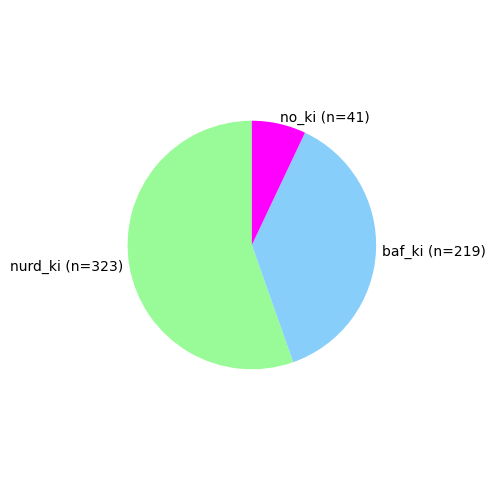

In [299]:
#### Pie chart of the cells captured in the different samples
sample_colors = {'nurd_ki': 'palegreen', 'baf_ki': 'lightskyblue', 'no_ki': 'magenta'}
sample_colors_wSizes = {'nurd_ki (n=323)': sample_colors['nurd_ki'], 
                        'baf_ki (n=219)': sample_colors['baf_ki'], 
                        'no_ki (n=41)': sample_colors['no_ki']}

pie(data.obs['sample'].values, colors=sample_colors_wSizes, 
        show_size=True, show=False)
plt.show()

# Let's also get the proportion of these that have the on-target edit in each cell, and evidence of off-target in different combinations..

In [300]:
sample_labels = data.obs['sample'].values

dosages_genes = data.obsm['dosages_genes_manual-edits-only']
arid1a_edited = dosages_genes['ARID1A'].values > 0
smarca4_edited = dosages_genes['SMARCA4'].values > 0
chd3_edited = dosages_genes['CHD3'].values > 0
chd4_edited = dosages_genes['CHD4'].values > 0

any_edited = dosages_genes.sum(axis=1) > 0

In [301]:
np.unique( sample_labels )

array(['baf_ki', 'no_ki', 'nurd_ki'], dtype=object)

In [302]:
len(any_edited)

583

In [303]:
def double_label(edit_bool_1, edit_bool_2, gene_1, gene_2, any_edited_bool):
    
    cell_label = 'no-edit'
    if edit_bool_1 and not edit_bool_2:
        cell_label = f'{gene_1}-edit'
    elif not edit_bool_1 and edit_bool_2:
        cell_label = f'{gene_2}-edit'
    elif edit_bool_1 and edit_bool_2:
        cell_label = f'double-edit'

    if any_edited_bool and cell_label!='no-edit':
        cell_label = cell_label + ', off-target/s'
    elif any_edited_bool:
        cell_label = 'off-target/s'
        
    return cell_label

In [305]:
cell_labels = []
for i in range(len(sample_labels)):

    if sample_labels[i] == 'no_ki' and any_edited[i]:
        cell_labels.append( 'false-edit-call' )

    elif sample_labels[i] == 'no_ki':
        cell_labels.append( 'no-edit' )

    elif sample_labels[i] == 'baf_ki':
        cell_labels.append( double_label(arid1a_edited[i], smarca4_edited[i], 'ARID1A', 'SMARCA4', any_edited[i]) )

    elif sample_labels[i] == 'nurd_ki':
        cell_labels.append( double_label(chd3_edited[i], chd4_edited[i], 'CHD3', 'CHD4', any_edited[i]) )

In [306]:
np.unique(cell_labels)

array(['ARID1A-edit, off-target/s', 'CHD3-edit, off-target/s',
       'CHD4-edit, off-target/s', 'SMARCA4-edit, off-target/s',
       'double-edit, off-target/s', 'no-edit', 'off-target/s'],
      dtype='<U26')

In [307]:
data.obs['edit_cell_labels'] = cell_labels
data.obs['edit_cell_labels'] = data.obs['edit_cell_labels'].astype('category')

In [ ]:
def get_overlap_counts(data, groupby1: str, groupby2: str,
                       uns_key: str = 'annot_overlaps',
                       verbose: bool = True):
    """ Calculates no. of cells belonging to the different categories of groupby1 and groupby2.
    """

    labels = data.obs[groupby1].values.astype(str)
    label_set = np.array(list(data.obs[groupby1].cat.categories))

    labels2 = data.obs[groupby2].values.astype(str)
    label_set2 = np.array(list(data.obs[groupby2].cat.categories))

    overlap_counts = np.zeros((len(label_set), len(label_set2)))
    for i, label in enumerate(label_set):
        label_bool = labels == label
        for j, label2 in enumerate(label_set2):
            label_bool2 = labels2 == label2

            overlap_counts[i, j] = len(
                np.where(np.logical_and(label_bool, label_bool2))[0])

    overlap_counts_df = pd.DataFrame(overlap_counts, index=label_set,
                                     columns=label_set2)
    data.uns[uns_key] = overlap_counts_df
    if verbose:
        print(f"Added data.uns['{uns_key}']")

In [529]:
get_overlap_counts(data, 'sample', 'edit_cell_labels')

Added data.uns['annot_overlaps']


In [530]:
data.uns['annot_overlaps']

ARID1A-edit, off-target/s  CHD3-edit, off-target/s   
baf_ki                         8.0                      0.0  \
no_ki                          0.0                      0.0   
nurd_ki                        0.0                     32.0   

         CHD4-edit, off-target/s  SMARCA4-edit, off-target/s   
baf_ki                       0.0                        72.0  \
no_ki                        0.0                         0.0   
nurd_ki                    121.0                         0.0   

         double-edit, off-target/s  no-edit  off-target/s  
baf_ki                         5.0     61.0          73.0  
no_ki                          0.0     41.0           0.0  
nurd_ki                      110.0     51.0           9.0

In [531]:
#### Want to see the actual proportions:
totals = data.uns['annot_overlaps'].values.sum(axis=1)
proportions = np.apply_along_axis(np.divide, 0, data.uns['annot_overlaps'].values, totals)

pd.DataFrame(proportions, index=data.uns['annot_overlaps'].index, columns=data.uns['annot_overlaps'].columns)

ARID1A-edit, off-target/s  CHD3-edit, off-target/s   
baf_ki                     0.03653                 0.000000  \
no_ki                      0.00000                 0.000000   
nurd_ki                    0.00000                 0.099071   

         CHD4-edit, off-target/s  SMARCA4-edit, off-target/s   
baf_ki                  0.000000                    0.328767  \
no_ki                   0.000000                    0.000000   
nurd_ki                 0.374613                    0.000000   

         double-edit, off-target/s   no-edit  off-target/s  
baf_ki                    0.022831  0.278539      0.333333  
no_ki                     0.000000  1.000000      0.000000  
nurd_ki                   0.340557  0.157895      0.027864

In [311]:
proportions.sum(axis=1)

array([1., 1., 1.])

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


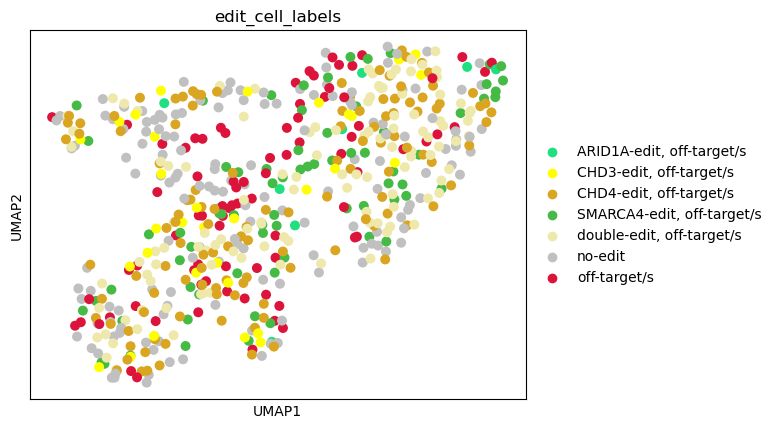

In [312]:
sc.pl.umap(data, color='edit_cell_labels')

In [313]:
data.obs['edit_cell_labels'].cat.categories

Index(['ARID1A-edit, off-target/s', 'CHD3-edit, off-target/s',
       'CHD4-edit, off-target/s', 'SMARCA4-edit, off-target/s',
       'double-edit, off-target/s', 'no-edit', 'off-target/s'],
      dtype='object')

In [ ]:
def getColors(labels, labelSet=None, colorMap='tab20', rgb=False):
	""" Gets an OrderedDict of colors; the order indicates the frequency of \
	labels from largest to smallest.

	Args:
		labels (numpy.array<str>): Indicates a set of labels for observations.

		labelSet (list-like<str>): Indicates the set of labels in labels. \
									If None, calculated based on labels.

		colorMap (str): A matplotlib colormap.

		rgb (bool): If True, colors indicated by rgb value, if false hexcode.

	Returns:
		dict<str, tuple or str>: An ordered dict indicating the labels which \
					occur most to least frequently and the associated colors.
	"""
	# Determining the set of labels #
	labelSet = input.returnDefaultIfNone(labelSet,
										 calcs.getOrderedLabelSet(labels))

	# Initialising the ordered dict #
	cellTypeColors = {}

	# Ordering the cells according to their frequency and obtaining colors #
	nLabels = len(labelSet)
	cmap = plt.cm.get_cmap(colorMap, nLabels)
	rgbs = [cmap(i)[:3] for i in range(nLabels)]
	#rgbs = list(numpy.array(rgbs)[order]) # Make sure color order is the same.

	# Populating the color dictionary with rgb values or hexcodes #
	for i in range(len(labelSet)):
		cellType = labelSet[i]
		rgbi = rgbs[i]
		if not rgb:
			cellTypeColors[cellType] = matplotlib.colors.rgb2hex(rgbi)
		else:
			cellTypeColors[cellType] = rgbi

	return cellTypeColors

In [579]:
color_dict = getColors(cell_labels)

color_dict['no-edit'] = 'silver'
color_dict['false-edit-call'] = 'dimgrey'
color_dict['off-target/s'] = 'sienna'#'crimson'
color_dict['CHD3-edit, off-target/s'] = 'yellow'
color_dict['CHD4-edit, off-target/s'] = 'goldenrod'
color_dict['ARID1A-edit, off-target/s'] = 'lime' #'#20DF7F'
color_dict['SMARCA4-edit, off-target/s'] = 'green' #'#45BA45'
color_dict['double-edit, off-target/s'] = 'palegoldenrod'
data.uns['edit_cell_labels_colors'] = [color_dict[label_] for label_ in data.obs['edit_cell_labels'].cat.categories]

In [580]:
color_dict

{'no-edit': 'silver',
 'off-target/s': 'sienna',
 'double-edit, off-target/s': 'palegoldenrod',
 'ARID1A-edit, off-target/s': 'lime',
 'CHD4-edit, off-target/s': 'goldenrod',
 'CHD3-edit, off-target/s': 'yellow',
 'SMARCA4-edit, off-target/s': 'green',
 'false-edit-call': 'dimgrey'}

In [581]:
len(color_dict)

8

In [583]:
data.uns['annot_overlaps']

ARID1A-edit, off-target/s  CHD3-edit, off-target/s   
baf_ki                         8.0                      0.0  \
no_ki                          0.0                      0.0   
nurd_ki                        0.0                     32.0   

         CHD4-edit, off-target/s  SMARCA4-edit, off-target/s   
baf_ki                       0.0                        72.0  \
no_ki                        0.0                         0.0   
nurd_ki                    121.0                         0.0   

         double-edit, off-target/s  no-edit  off-target/s  
baf_ki                         5.0     61.0          73.0  
no_ki                          0.0     41.0           0.0  
nurd_ki                      110.0     51.0           9.0

In [ ]:
def dataframe_annot_overlap_barplot(overlap_counts_df, groupby1, groupby2, colors=None,
                          bar_width: float = .85,
                          labelset1 = None, labelset2 = None,
                          figsize=(10, 5), scale: bool = True,
                          transpose: bool = False, edge_color=None,
                          remove_labelling: bool = False):
    """Plots relationship between annotations by showing proportions of each type found within
        each of the other categories.
    """
    if transpose:  ##### Looking at relationship in opposite direction.
        overlap_counts_df = overlap_counts_df.transpose()
        tmp = groupby1
        groupby1 = groupby2
        groupby2 = tmp

    if type(labelset1)==type(None):
        labelset1 = overlap_counts_df.index.values
    else:
        overlap_counts_df = overlap_counts_df.loc[labelset1, :]

    if type(labelset2) == type(None):
        labelset2 = overlap_counts_df.columns.values
    else:
        overlap_counts_df = overlap_counts_df.loc[:, labelset2]

    ##### Getting colors
    if type(colors)==type(None):
        colors = {val: 'grey' for i, val in enumerate(labelset2)}

    ##### Scaling the data to proportions.
    if scale:
        total_counts = overlap_counts_df.sum(axis=1)
        overlap_counts = np.apply_along_axis(np.divide, 0,
                                             overlap_counts_df.values,
                                             total_counts)
    else:
        overlap_counts = overlap_counts_df.values

    ##### Creating the barplots...
    fig, axs = plt.subplots(figsize=figsize)
    col_locs = list(range(len(labelset1)))
    for labeli, label in enumerate(labelset2):
        props = overlap_counts[:, labeli]

        if labeli == 0:
            bottom = [0] * len(props)

        axs.bar(col_locs, props, bottom=bottom,
                color=colors[label], edgecolor=edge_color,
                width=bar_width, )
        bottom = list(np.array(bottom) + props)

        # Custom x axis
        axs.set_xticks(list(range(len(labelset1))), list(labelset1),
                       rotation=90)
        axs.spines['right'].set_visible(False)
        axs.spines['top'].set_visible(False)
        if remove_labelling:
            axs.set_xticks([])
            axs.set_yticks([])
            axs.spines['left'].set_visible(False)
            axs.spines['bottom'].set_visible(False)
        else:
            axs.set_xlabel(f"{groupby1} Clusters")

def annot_overlap_barplot(data, groupby1: str, groupby2: str,
                          uns_key: str = 'annot_overlaps',
                          labelset1 = None, labelset2 = None,
                          bar_width: float = .85,
                          figsize=(10, 5), scale: bool = True,
                          transpose: bool = False, edge_color=None,
                          remove_labelling: bool = False):
    """Plots relationship between annotations by showing proportions of each type found within
        each of the other categories. Written to work with AnnData input.
    """
    if uns_key not in data.uns:
        print("Need to run get_overlap_counts() first.")

    overlap_counts_df = data.uns[uns_key].copy()

    # ##### Getting colors
    if f'{groupby2}_colors' in data.uns:
        colors = {val: data.uns[f'{groupby2}_colors'][i]
                  for i, val in enumerate(data.obs[groupby2].cat.categories)}
    else:
        colors = {val: 'grey' for
                  i, val in enumerate(data.obs[groupby2].cat.categories)}


    dataframe_annot_overlap_barplot(overlap_counts_df, groupby1, groupby2, colors=colors,
                          bar_width = bar_width,
                          labelset1 = labelset1, labelset2 = labelset2,
                          figsize=figsize, scale=scale,
                          transpose=transpose, edge_color=edge_color,
                          remove_labelling=remove_labelling)


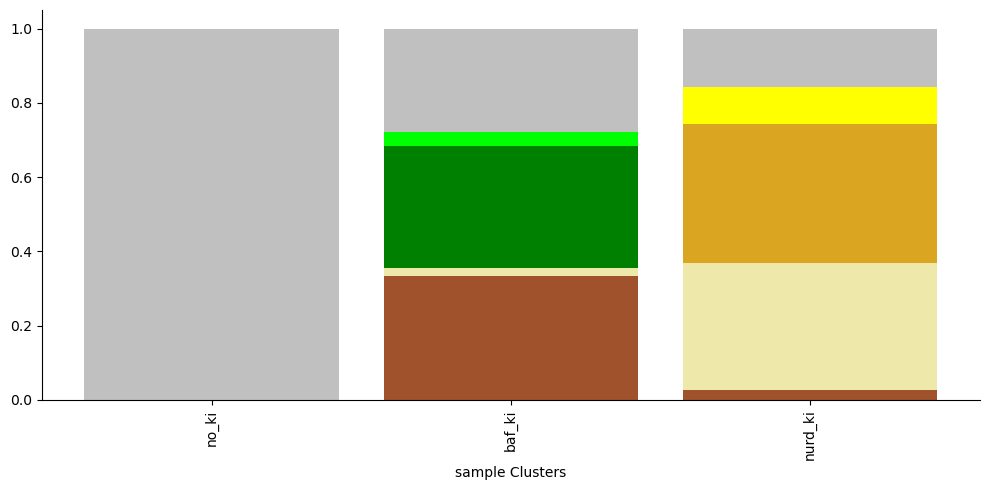

In [584]:
annot_overlap_barplot(data, 'sample', 'edit_cell_labels',
                         labelset1=np.array(['no_ki', 'baf_ki', 'nurd_ki']),
                         labelset2=np.array(['no-edit', #'false-edit-call',
                                            'ARID1A-edit, off-target/s', 'SMARCA4-edit, off-target/s',
                                            'CHD3-edit, off-target/s', 'CHD4-edit, off-target/s',
                                             'double-edit, off-target/s',
                                             'off-target/s'
                                            ][::-1])
                         )
plt.show()

# Looking at dosages of allele calls

Added data.uns['annot_overlaps']


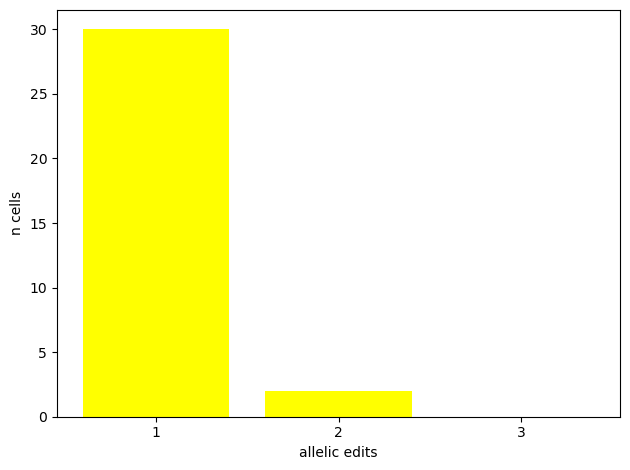

Added data.uns['annot_overlaps']


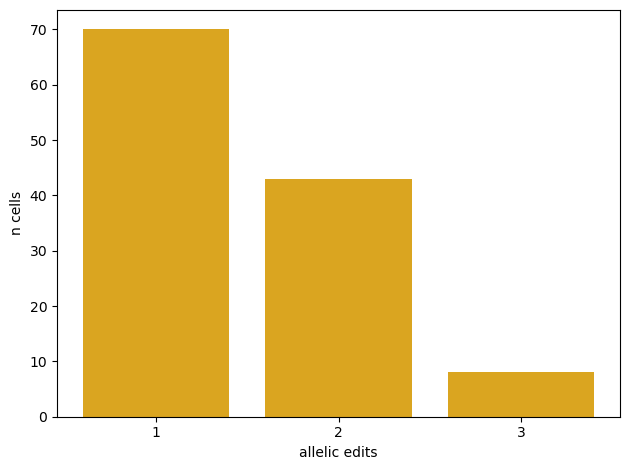

Added data.uns['annot_overlaps']


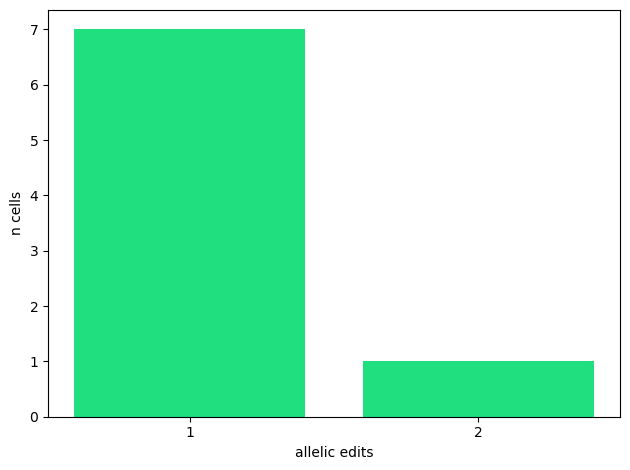

Added data.uns['annot_overlaps']


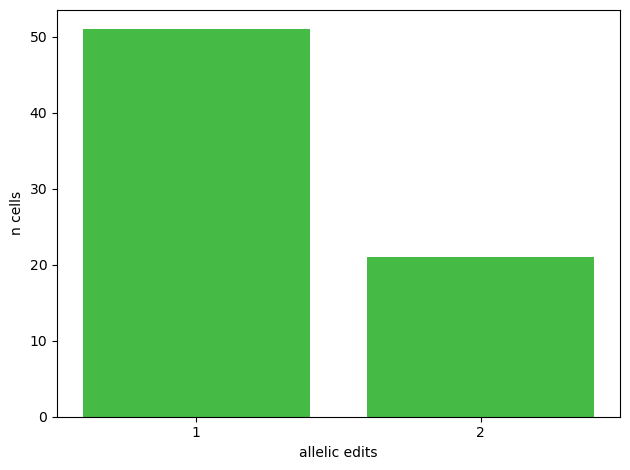

In [317]:
on_targets = ['CHD3', 'CHD4', 'ARID1A', 'SMARCA4']
samples_ = ['nurd_ki', 'nurd_ki', 'baf_ki', 'baf_ki']
colors_  = ['yellow', 'goldenrod', '#20DF7F', '#45BA45']

# Constructing own overlaps...
allelic_counts = np.zeros((len(on_targets), 3))

for i, (sample_, gene_) in enumerate( zip(samples_, on_targets) ):

    color_ = colors_[i]
    data.obs[f"{gene_}_edit_dosages"] = dosages_genes[gene_].values.astype(str)
    data.obs[f"{gene_}_edit_dosages"] = data.obs[f"{gene_}_edit_dosages"].astype('category')

    get_overlap_counts(data, 'edit_cell_labels', f"{gene_}_edit_dosages")

    # This part only works cause no-cases where have a pure edit with no-off-targets detected.
    allele_counts = data.uns['annot_overlaps'].loc[f'{gene_}-edit, off-target/s'].values[1:]
    alleles = data.uns['annot_overlaps'].columns.values[1:]

    allelic_counts[i,0:len(alleles)] = allele_counts
    
    plt.bar(alleles, allele_counts,
       color=color_)
    plt.xlabel('allelic edits')
    plt.ylabel('n cells')

    plt.show()

In [318]:
allelic_counts = pd.DataFrame(allelic_counts, index=on_targets, columns=list(range(1,allelic_counts.shape[1]+1)))
allelic_counts

1     2    3
CHD3     30.0   2.0  0.0
CHD4     70.0  43.0  8.0
ARID1A    7.0   1.0  0.0
SMARCA4  51.0  21.0  0.0

In [319]:
data.uns['annot_overlaps'] = allelic_counts

In [320]:
totals = data.uns['annot_overlaps'].values.sum(axis=1)
proportions = np.apply_along_axis(np.divide, 0, data.uns['annot_overlaps'].values, totals)

pd.DataFrame(proportions, index=data.uns['annot_overlaps'].index, columns=data.uns['annot_overlaps'].columns)

1         2         3
CHD3     0.937500  0.062500  0.000000
CHD4     0.578512  0.355372  0.066116
ARID1A   0.875000  0.125000  0.000000
SMARCA4  0.708333  0.291667  0.000000

In [321]:
data.uns.keys()

dict_keys(['edit_site_info', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'annot_overlaps', 'edit_cell_labels_colors', 'sample_colors', 'phase_colors', 'leiden', 'leiden_colors', 'rank_genes_groups', 'leiden_markers', 'leiden_neighbours', 'leiden_neighdists', 'leiden_ps', 'leiden_padjs', 'leiden_mutualpairs', 'leiden_merged_markers', 'leiden_merged_colors', 'dendrogram_leiden_merged'])

In [323]:
np.unique([-1]+list(allelic_counts.columns.values.astype(int)))

array([-1,  1,  2,  3])

In [324]:
allele_colors = getColors(np.unique([0]+list(allelic_counts.columns.values.astype(int))), colorMap='Blues')
allele_colors

{0: '#f7fbff', 1: '#abd0e6', 2: '#3787c0', 3: '#08306b'}

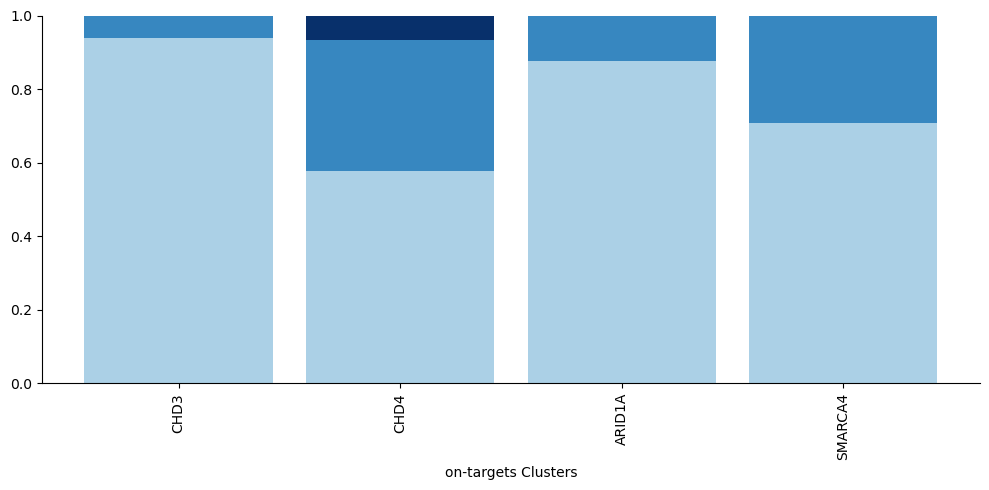

In [325]:
dataframe_annot_overlap_barplot(allelic_counts, 'on-targets', 'alleles-edited', colors=allele_colors)
plt.show()

In [326]:
#### Some stats on the total counts per cell!
total_counts = data.obs['total_counts'].values

min_, median, max_ = np.quantile(total_counts, [0, 0.5, 1])

print("Min, median, max:", min_, median, max_)

Min, median, max: 6906.0 41607.0 241211.0


In [327]:
sample_labels = data.obs['sample'].values
sample_set = np.unique(sample_labels)

In [ ]:
def distrib(x, bins=100, x_label='', fig_title='', log=False, density=False,
            figsize=(6.4,4.8), file_name=None, add_mean=False, logbase=np.e,
            color='blue', alpha=1, ax=None, fig=None, show=True, cutoff=None,
            cutoff_color='r',
            label='', total=None, return_total=False, ylims=None, xlims=None,
            mean_fontsize='small', mean_fontweight='bold'):
    """Plots a histogram of values."""
    if type(ax)==type(None) or type(fig)==type(None):
        fig, ax = plt.subplots(figsize=figsize)

    # Getting the counts in desired format #
    counts, bins = np.histogram(x, bins=bins)
    logcounts = np.log(counts+1)/np.log(logbase) if log else counts
    if density and type(total)==type(None):
        total = sum(logcounts)
        logcounts = logcounts/total
    elif density:
        logcounts = logcounts/total

    ax.hist(bins[:-1], bins, weights=logcounts, color=color, alpha=alpha,
            label=label)
    ax.set_xlabel(x_label, fp)
    if not density:
        ax.set_ylabel(f'log{round(logbase, 2)}-counts' if log else 'counts', fp)
    else:
        ax.set_ylabel('density-'+f'log{round(logbase, 2)}-counts'
                                                      if log else 'density', fp)
    fig.suptitle(fig_title)

    if add_mean:
        mean = np.mean(x)
        y = ax.get_ylim()[1]*.5
        ax.vlines(mean, 0, y, colors=cutoff_color)
        ax.text(mean, y, f'mean:{round(mean, 4)}', c=cutoff_color,
                fontsize=mean_fontsize, fontweight=mean_fontweight)
    if cutoff:
        y = ax.get_ylim()[1] * .5
        ax.vlines(cutoff, 0, y, colors=cutoff_color)
        ax.text(cutoff, y, f'cutoff: {round(cutoff, 4)}', c=cutoff_color,
                fontsize=mean_fontsize, fontweight=mean_fontweight)

    # Add axes these limits #
    if type(xlims)!=type(None):
        ax.set_xlim(*xlims)
    if type(ylims)!=type(None):
        ax.set_ylim(*ylims)

    # Removing boxes outside #
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if show:
        #vhs.dealWithPlot(type(file_name)!=type(None), True, True, '',
        #                                                        file_name, 300)
        plt.show()
    elif not return_total:
        return fig, ax
    else:
        return fig, ax, total

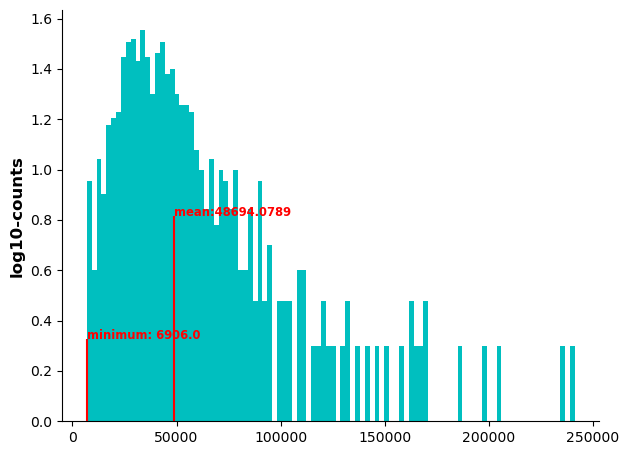

In [328]:
fig, ax = distrib(total_counts, color='c', log=True, logbase=10, add_mean=True, show=False)

cutoff = min_
cutoff_color = 'red'
y = ax.get_ylim()[1] * .2
mean_fontsize='small'
mean_fontweight='bold'
ax.vlines(cutoff, 0, y, colors=cutoff_color)
ax.text(cutoff, y, f'minimum: {round(cutoff, 4)}', c=cutoff_color,
        fontsize=mean_fontsize, fontweight=mean_fontweight)

plt.show()

In [596]:
tenk_ranges = {'t7_umis': [0, 160],
 't7_no_bc_umis': [0, 477],
 't7_all': [0, 494],
 'total_counts': [1137.0, 409262.0],
 'pct_counts_in_top_100_genes': [8.095781071835804, 33.15808340303501],
 'n_genes_by_counts': [890, 15605]}

fiveh_ranges = {'t7_umis': [0, 107],
 't7_no_bc_umis': [0, 157],
 't7_all': [0, 215],
 'total_counts': [6906.0, 241211.0],
 'pct_counts_in_top_100_genes': [11.711418938132185, 45.63162184189079],
 'n_genes_by_counts': [3151, 13221]}

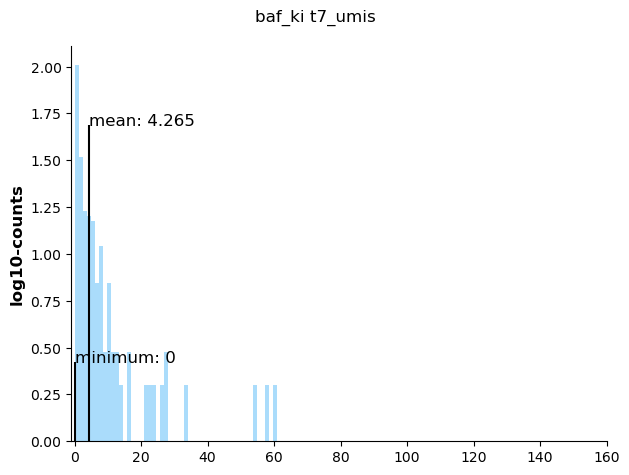

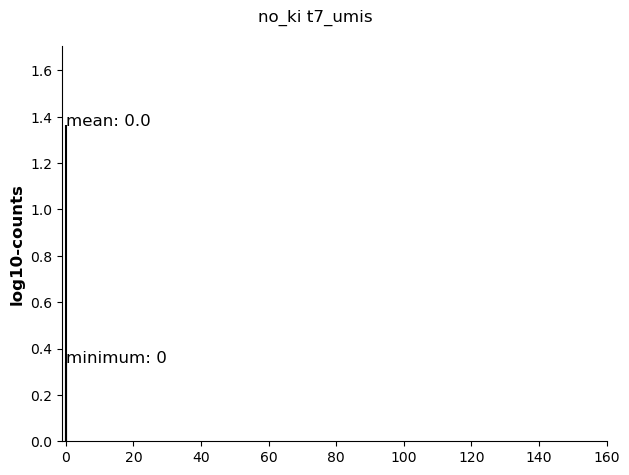

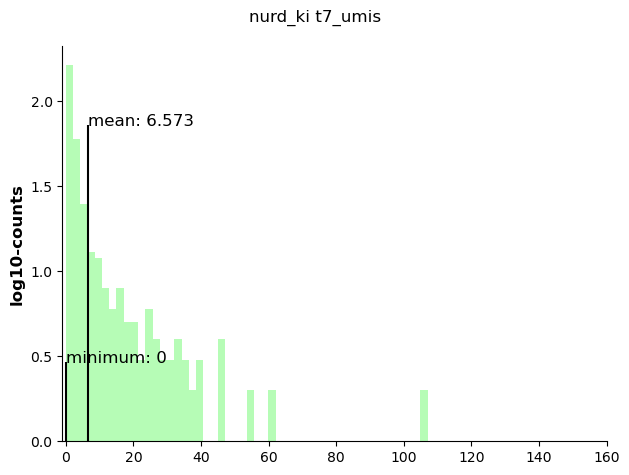

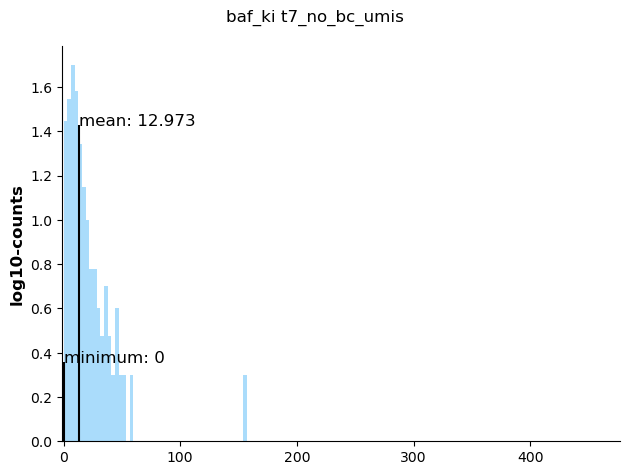

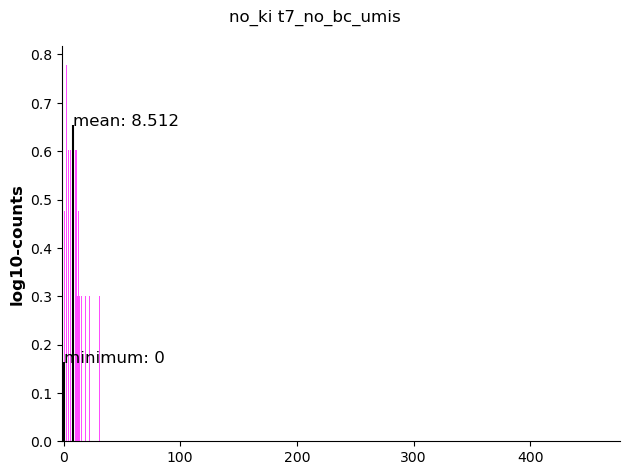

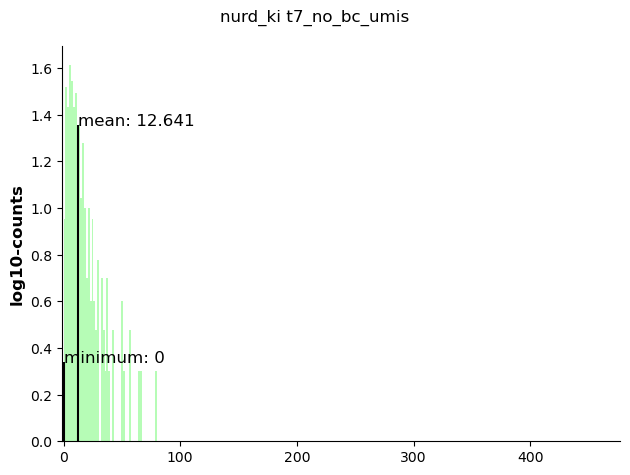

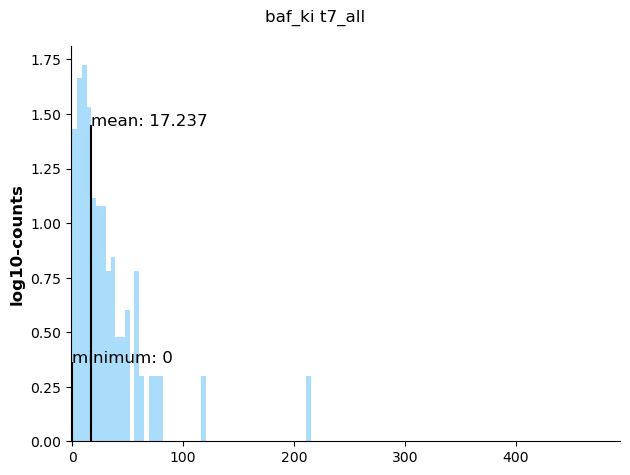

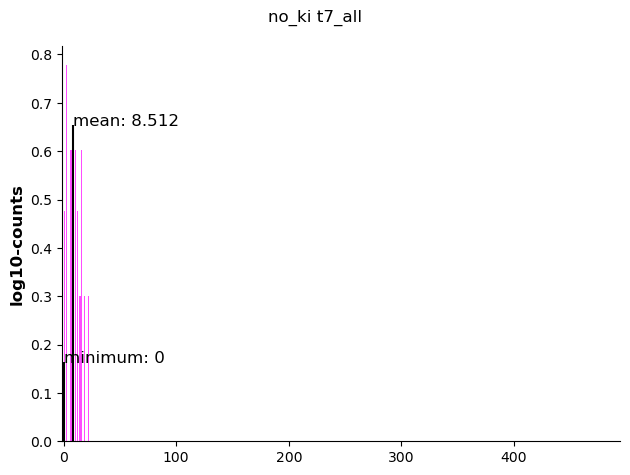

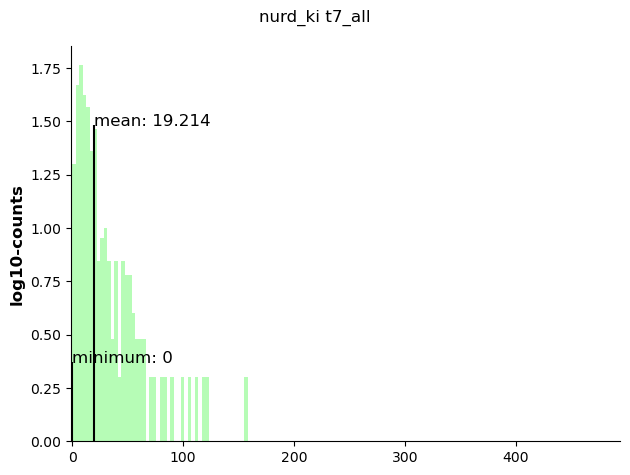

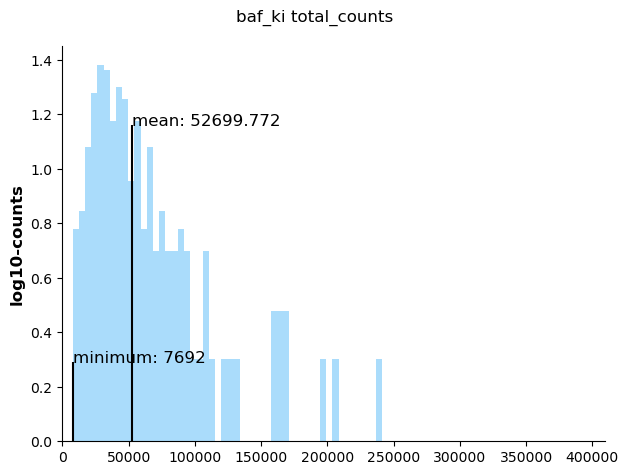

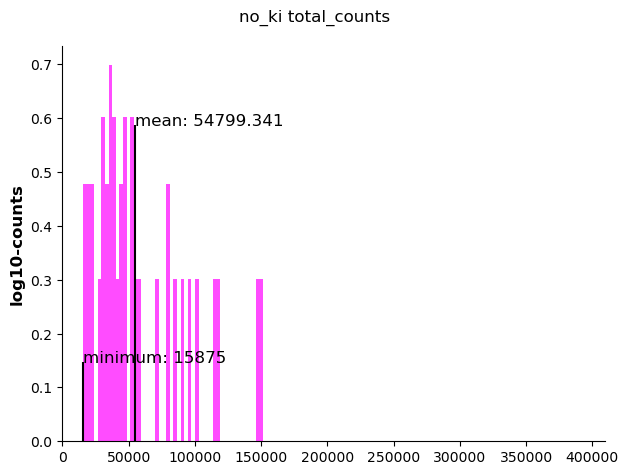

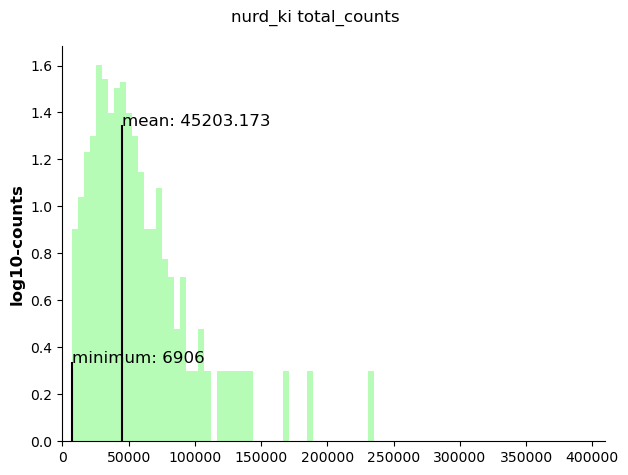

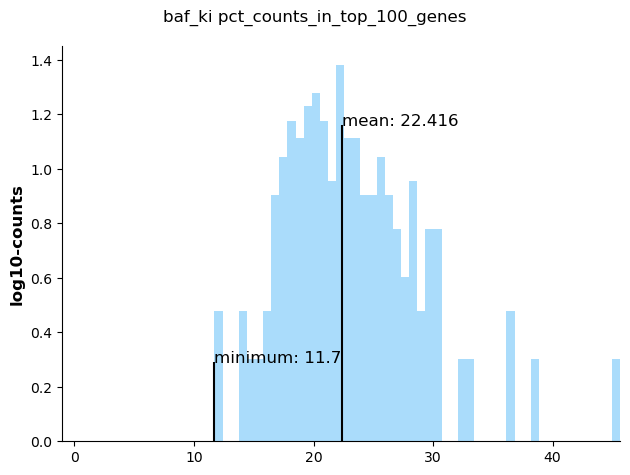

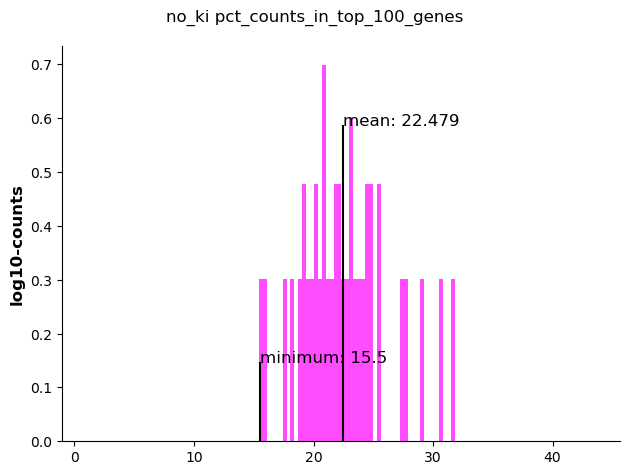

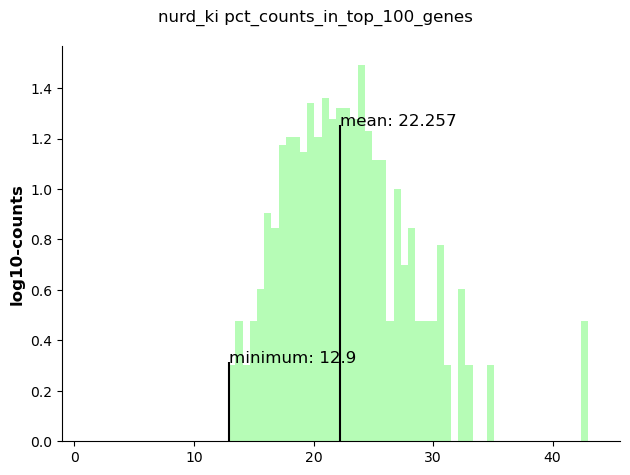

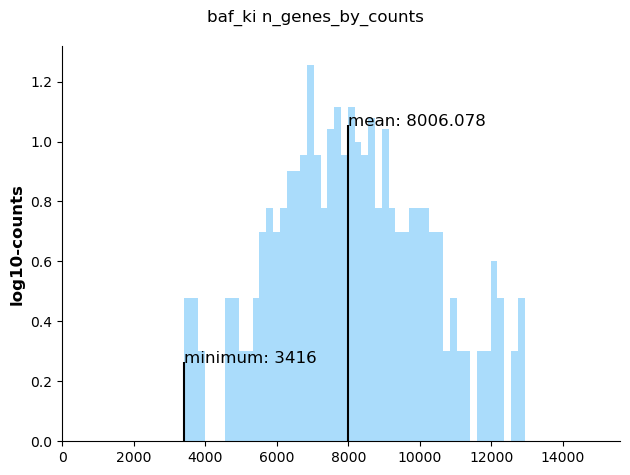

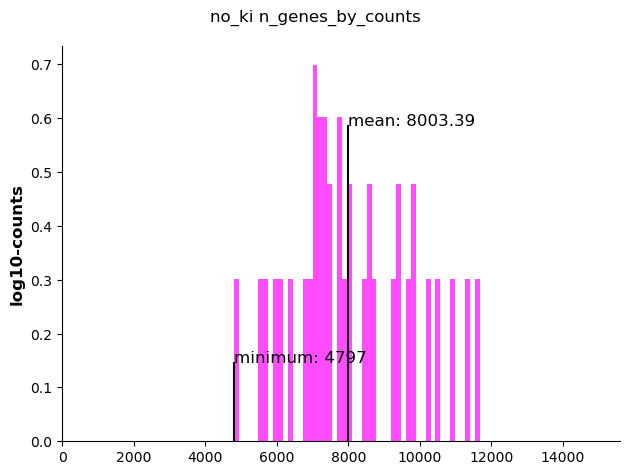

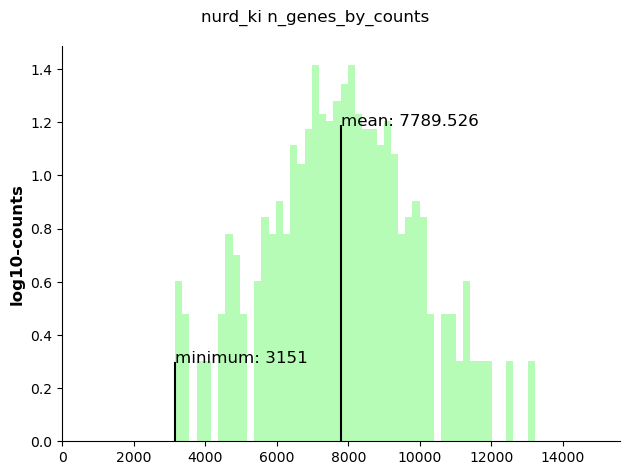

In [598]:
### Collecting the min and maxes so can set the ranges.
stratified_ranges = {}

for metric in ['t7_umis', 't7_no_bc_umis', 't7_all', 'total_counts', 'pct_counts_in_top_100_genes', 'n_genes_by_counts']:

    measures = data.obs[metric].values

    stratified_ranges[metric] = [999999999, 0]

    tenk_xlims = tenk_ranges[metric]
    fiveh_xlims = fiveh_ranges[metric]
    xlims = (np.min([tenk_xlims[0], fiveh_xlims[0], -1]),
             np.max([tenk_xlims[1], fiveh_xlims[1]]))
    
    for sample in sample_set:
        sample_meaures = measures[sample_labels==sample]

        stratified_ranges[metric] = [np.min([np.min(sample_meaures), stratified_ranges[metric][0]]), 
                                     np.max([np.max(sample_meaures), stratified_ranges[metric][1]])]
        
        fig, ax = distrib(sample_meaures, color=sample_colors[sample], log=True, logbase=10, add_mean=False, 
                              cutoff_color='k', alpha=0.7, show=False, bins=50, xlims=xlims)
        fig.suptitle(f"{sample} {metric}")
        
        cutoff = np.round(min( sample_meaures ), 1)
        cutoff_color = 'black'
        y = ax.get_ylim()[1] * .2
        mean_fontsize='large'
        mean_fontweight='normal'
        ax.vlines(cutoff, 0, y, colors=cutoff_color)
        ax.text(cutoff, y, f'minimum: {round(cutoff, 4)}', c=cutoff_color,
                fontsize=mean_fontsize, fontweight=mean_fontweight)

        cutoff = np.round(np.mean( sample_meaures ), 3)
        y = ax.get_ylim()[1] * .8
        ax.vlines(cutoff, 0, y, colors=cutoff_color)
        ax.text(cutoff, y, f'mean: {round(cutoff, 4)}', c=cutoff_color,
                fontsize=mean_fontsize, fontweight=mean_fontweight)
        
        plt.show()

In [599]:
stratified_ranges

{'t7_umis': [0, 107],
 't7_no_bc_umis': [0, 157],
 't7_all': [0, 215],
 'total_counts': [6906.0, 241211.0],
 'pct_counts_in_top_100_genes': [11.711418938132185, 45.63162184189079],
 'n_genes_by_counts': [3151, 13221]}

In [600]:
out_plots

'/iblm/netapp/data4/bbalderson/edit_capture/plots/cell_qc/superb_500cell_v1/'

# Some UMAPs of this stuff

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


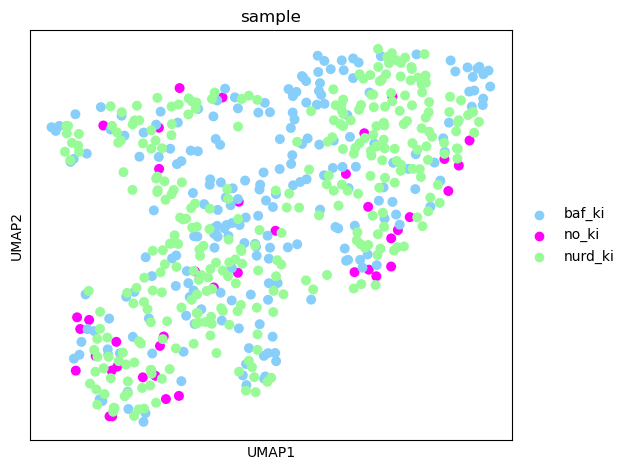

In [330]:
sc.pl.umap(data, color='sample', show=False)
plt.show()

In [133]:
!wget https://raw.githubusercontent.com/scverse/scanpy_usage/refs/heads/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt -O {data_dir}regev_lab_cell_cycle_genes.txt

--2024-11-06 14:56:40--  https://raw.githubusercontent.com/scverse/scanpy_usage/refs/heads/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 556 [text/plain]
Saving to: ‘/iblm/netapp/data4/bbalderson/edit_capture/data/t7_allelic_calling/superb_count_500_cells1/regev_lab_cell_cycle_genes.txt’

100%[======================================>] 556         --.-K/s   in 0s      

2024-11-06 14:56:40 (29.2 MB/s) - ‘/iblm/netapp/data4/bbalderson/edit_capture/data/t7_allelic_calling/superb_count_500_cells1/regev_lab_cell_cycle_genes.txt’ saved [556/556]


In [134]:
cycle_genes = [line.strip('\n') for line in open(f"{data_dir}regev_lab_cell_cycle_genes.txt", "r")]
s_genes = cycle_genes[:43]
g2m_genes = cycle_genes[43:]
s_genes, g2m_genes

(['MCM5',
  'PCNA',
  'TYMS',
  'FEN1',
  'MCM2',
  'MCM4',
  'RRM1',
  'UNG',
  'GINS2',
  'MCM6',
  'CDCA7',
  'DTL',
  'PRIM1',
  'UHRF1',
  'MLF1IP',
  'HELLS',
  'RFC2',
  'RPA2',
  'NASP',
  'RAD51AP1',
  'GMNN',
  'WDR76',
  'SLBP',
  'CCNE2',
  'UBR7',
  'POLD3',
  'MSH2',
  'ATAD2',
  'RAD51',
  'RRM2',
  'CDC45',
  'CDC6',
  'EXO1',
  'TIPIN',
  'DSCC1',
  'BLM',
  'CASP8AP2',
  'USP1',
  'CLSPN',
  'POLA1',
  'CHAF1B',
  'BRIP1',
  'E2F8'],
 ['HMGB2',
  'CDK1',
  'NUSAP1',
  'UBE2C',
  'BIRC5',
  'TPX2',
  'TOP2A',
  'NDC80',
  'CKS2',
  'NUF2',
  'CKS1B',
  'MKI67',
  'TMPO',
  'CENPF',
  'TACC3',
  'FAM64A',
  'SMC4',
  'CCNB2',
  'CKAP2L',
  'CKAP2',
  'AURKB',
  'BUB1',
  'KIF11',
  'ANP32E',
  'TUBB4B',
  'GTSE1',
  'KIF20B',
  'HJURP',
  'CDCA3',
  'HN1',
  'CDC20',
  'TTK',
  'CDC25C',
  'KIF2C',
  'RANGAP1',
  'NCAPD2',
  'DLGAP5',
  'CDCA2',
  'CDCA8',
  'ECT2',
  'KIF23',
  'HMMR',
  'AURKA',
  'PSRC1',
  'ANLN',
  'LBR',
  'CKAP5',
  'CENPE',
  'CTCF',
  'NEK2',
 

In [135]:
sc.tl.score_genes_cell_cycle(data, s_genes, g2m_genes)

In [136]:
data.obs.keys()

Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'mito_perc', 't7_umis', 't7_all',
       't7_no_bc_umis', 'sample', 'edit_cell_labels', 'CHD3_edit_dosages',
       'CHD4_edit_dosages', 'ARID1A_edit_dosages', 'SMARCA4_edit_dosages',
       'S_score', 'G2M_score', 'phase'],
      dtype='object')

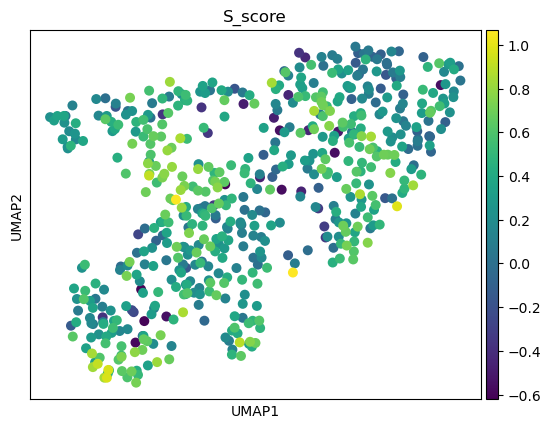

In [137]:
sc.pl.umap(data, color='S_score')

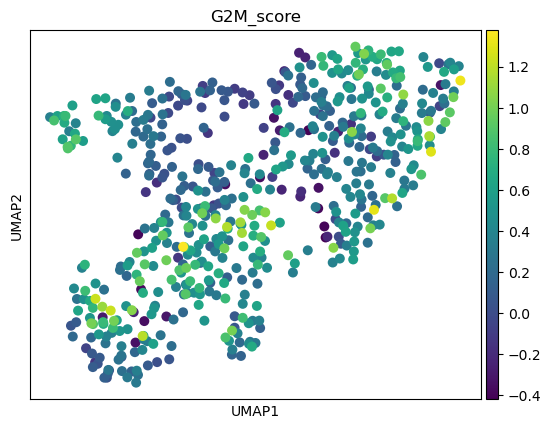

In [138]:
sc.pl.umap(data, color='G2M_score')

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


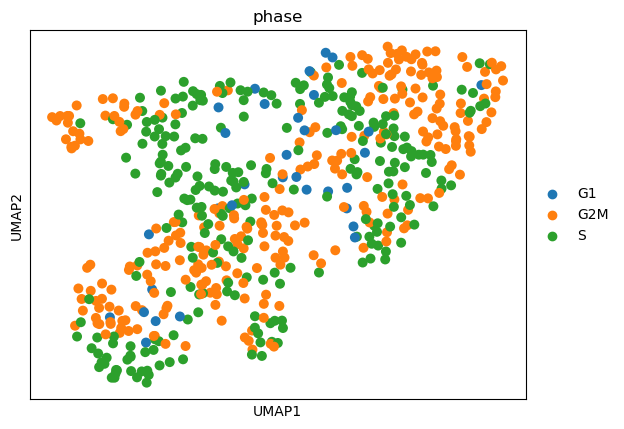

In [331]:
sc.pl.umap(data, color='phase')

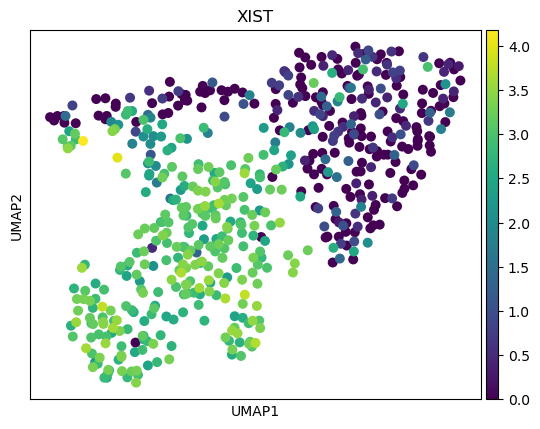

In [332]:
sc.pl.umap(data, color='XIST')

In [143]:
sc.tl.leiden(data, resolution=1.5)

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


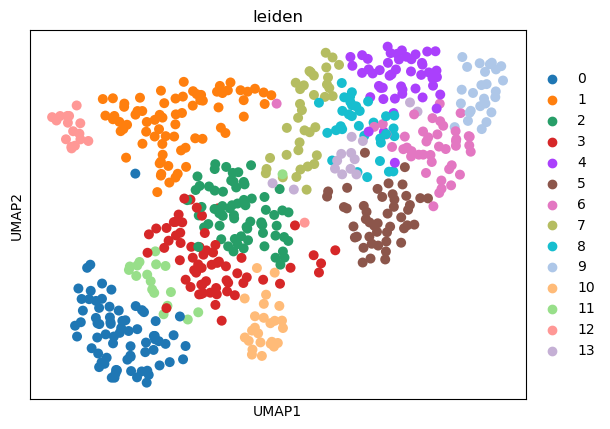

In [144]:
sc.pl.umap(data, color='leiden')

In [145]:
import cytocipher as cc

In [146]:
cc.tl.get_markers(data, 'leiden', var_groups='highly_variable')

Added data.uns['leiden_markers']


In [147]:
cc.tl.code_enrich(data, 'leiden', n_cpus=10)

Added data.obsm['leiden_enrich_scores']


/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/cytocipher/plotting/cluster_diagnostics.py:111: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  score_data = sc.AnnData(cell_scores_df, obs=data.obs)


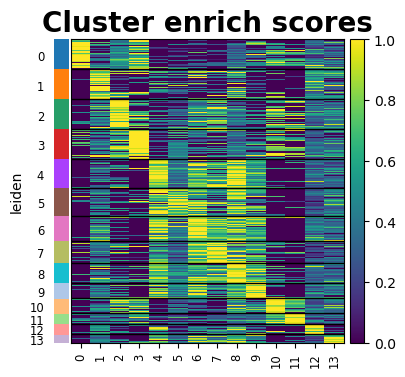

In [148]:
cc.pl.enrich_heatmap(data, 'leiden', figsize=(4,4))

In [157]:
cc.tl.merge_clusters(data, 'leiden', n_cpus=10, p_cut=.005)

Initial merge.
Added data.obs[f'leiden_merged']
Exiting due to reaching max_iter 0


/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/cytocipher/plotting/cluster_diagnostics.py:111: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  score_data = sc.AnnData(cell_scores_df, obs=data.obs)
/iblm/netapp/home/bbalderson/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


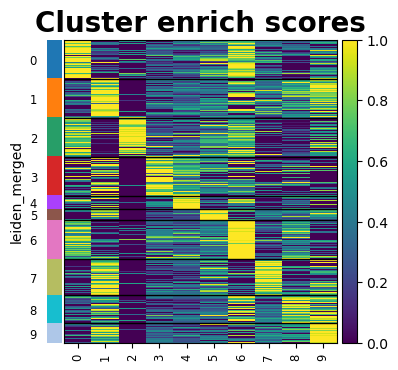

In [158]:
cc.pl.enrich_heatmap(data, 'leiden_merged', figsize=(4,4), scale_cols=True, show=False)
vhs.dealWithPlot(True, True, True, out_plots, f"leiden-merged_scores_heatmap.png", 300)

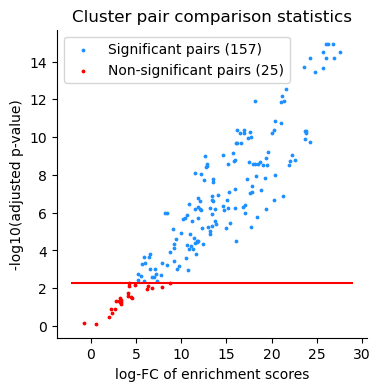

In [160]:
cc.pl.volcano(data, 'leiden', p_cut=.005, p_adjust=True, figsize=(4,4))

In [161]:
#cc.tl.merge(data, 'leiden', 0.01)

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


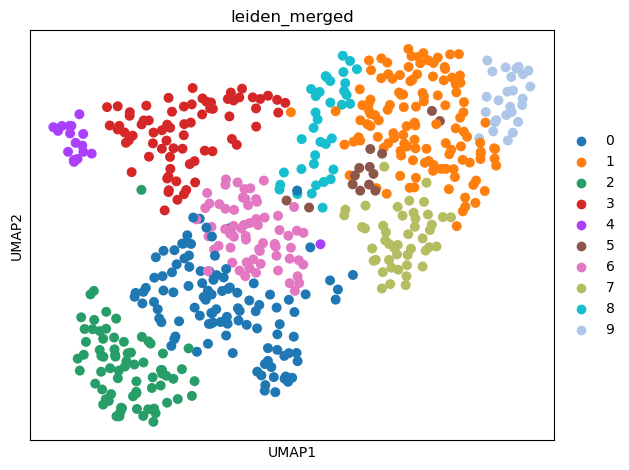

In [162]:
sc.pl.umap(data, color='leiden_merged', show=False)
vhs.dealWithPlot(True, True, True, out_plots, f"leiden-merged_umap.png", 300)

Printing top and bottom most significant/non-significant clusters.

Top significant
p=1.0581611224693664e-17 (12 cells; 12 scores) vs (10 cells; 12 scores)
p=0.0009086430012669062 (12 cells; 10 scores) vs (10 cells; 10 scores)


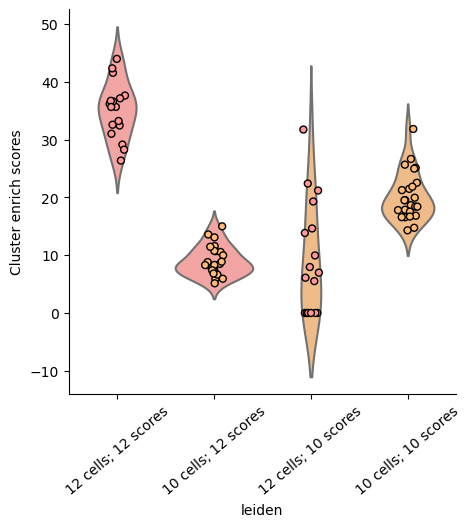

Bottom significant
p=0.7180131927702478 (2 cells; 2 scores) vs (10 cells; 2 scores)
p=0.0018400613883191373 (2 cells; 10 scores) vs (10 cells; 10 scores)


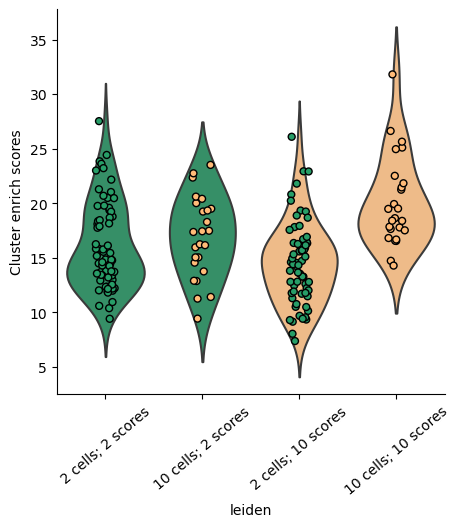

Top non-significant
p=0.7520202208515191 (8 cells; 8 scores) vs (4 cells; 8 scores)
p=0.007049363914194301 (8 cells; 4 scores) vs (4 cells; 4 scores)


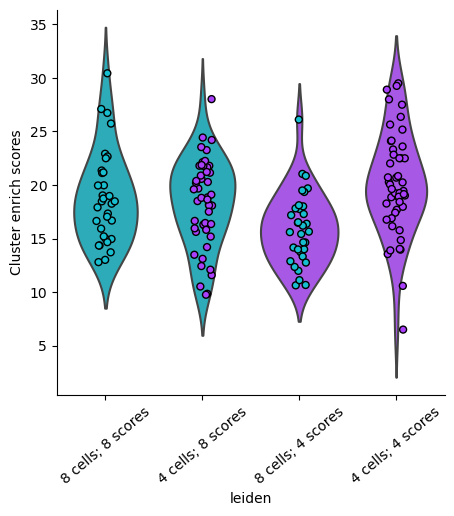

Bottom non-significnat
p=0.0057632387034368925 (8 cells; 8 scores) vs (6 cells; 8 scores)
p=0.04849968348740026 (8 cells; 6 scores) vs (6 cells; 6 scores)


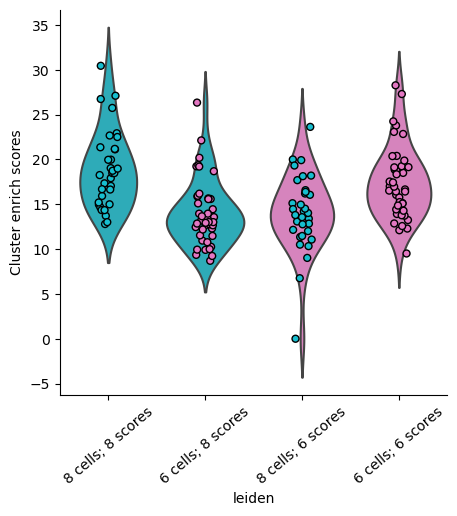

In [163]:
cc.pl.sig_cluster_diagnostics(data, 'leiden')

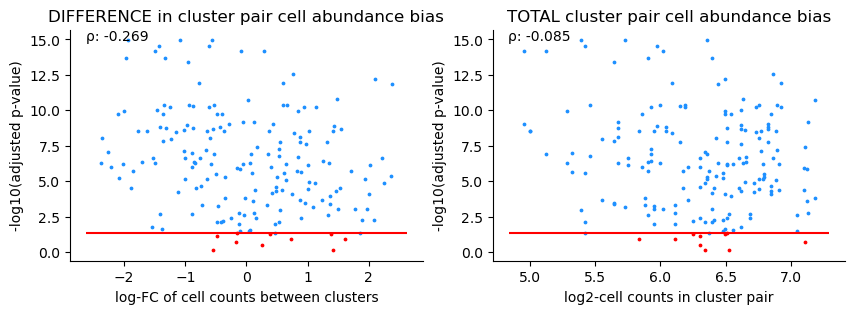

In [164]:
fig, ax = plt.subplots(ncols=2, figsize=(10,3))
cc.pl.check_abundance_bias(data, 'leiden', p_cut=.045, p_adjust=True, show_legend=False, ax=ax[0], show=False)
cc.pl.check_total_abundance_bias(data, 'leiden', p_cut=.045, p_adjust=True, show_legend=False, ax=ax[1], show=False)
plt.show()

In [165]:
markers = data.uns['leiden_merged_markers']
markers

{'0': array(['XIST', 'ENSG00000287474', 'ENSG00000286163', 'CCDC26', 'OGT',
        'ENSG00000259929'], dtype=object),
 '1': array(['BLTP2', 'KIF1A', 'FAM222B', 'SUPT6H', 'SLC35F3', 'SPAG5'],
       dtype=object),
 '2': array(['DSCAM', 'ENSG00000259560', 'XIST', 'LINC02770', 'LINC01811',
        'GLIS3'], dtype=object),
 '3': array(['P4HB', 'PCF11', 'EIF5B', 'IFRD1', 'EFCAB14', 'TMF1'], dtype=object),
 '4': array(['HSP90AA1', 'KTN1', 'NCL', 'DDX21', 'PRPF40A', 'PTMA'],
       dtype=object),
 '5': array(['MBNL2', 'DIAPH3', 'AAK1', 'SLC38A2', 'RAB27A', 'YARS1'],
       dtype=object),
 '6': array(['XIST', 'ENSG00000286163', 'ENSG00000227706', 'STXBP5', 'STEAP1B',
        'ADGRV1'], dtype=object),
 '7': array(['MIR2052HG', 'SLC35F3', 'ERMAP', 'SLC25A37', 'KEL', 'LINC01376'],
       dtype=object),
 '8': array(['RNF130', 'SCN9A', 'MYO16', 'STXBP5', 'LINC02882', 'CFH'],
       dtype=object),
 '9': array(['MIR3681HG', 'COL21A1', 'UBASH3A', 'ENSG00000266450', 'CEP128',
        'RNF130'], dtype=

In [166]:
marker_genes = {key: values[0:2] for key, values in markers.items()}

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


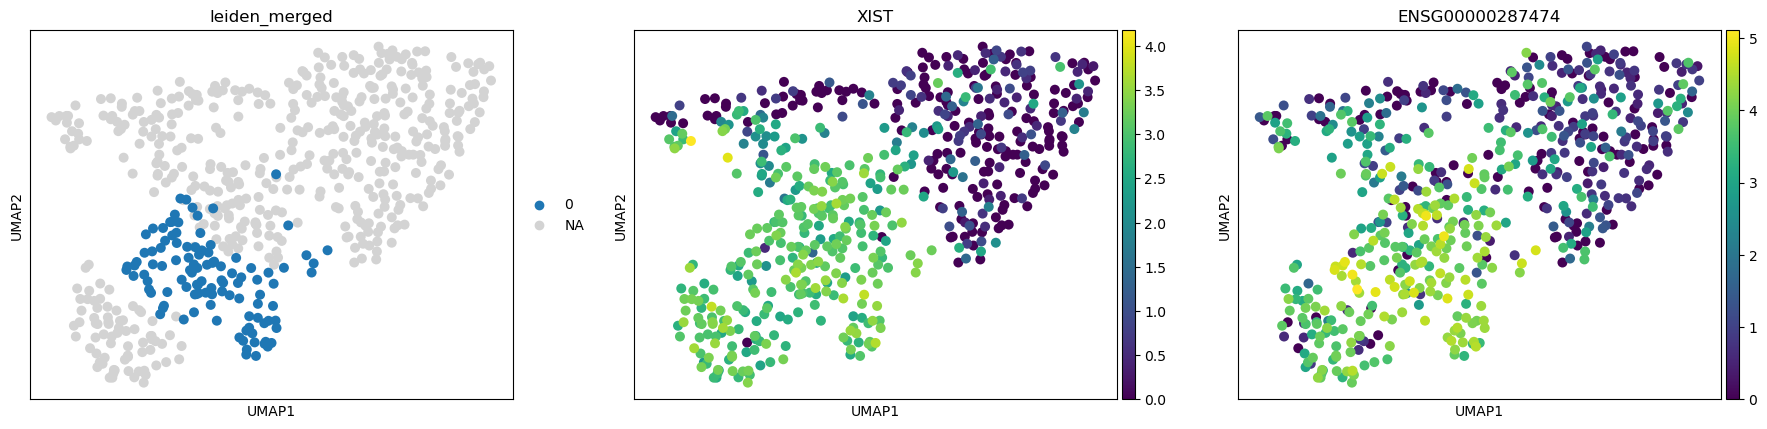

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


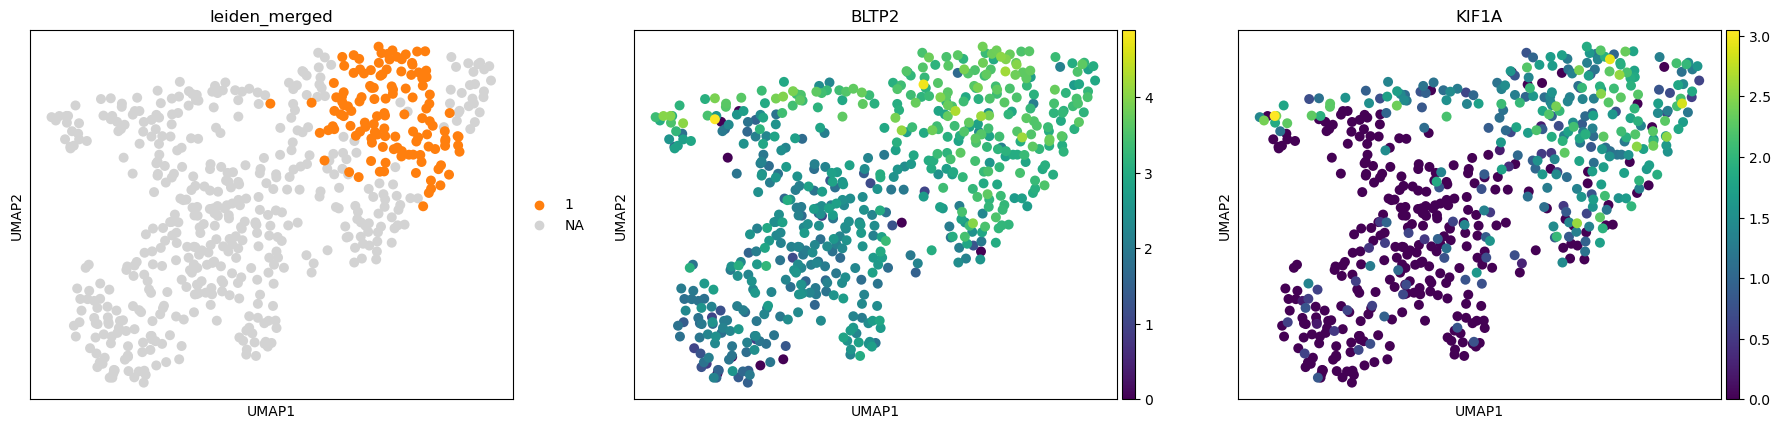

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


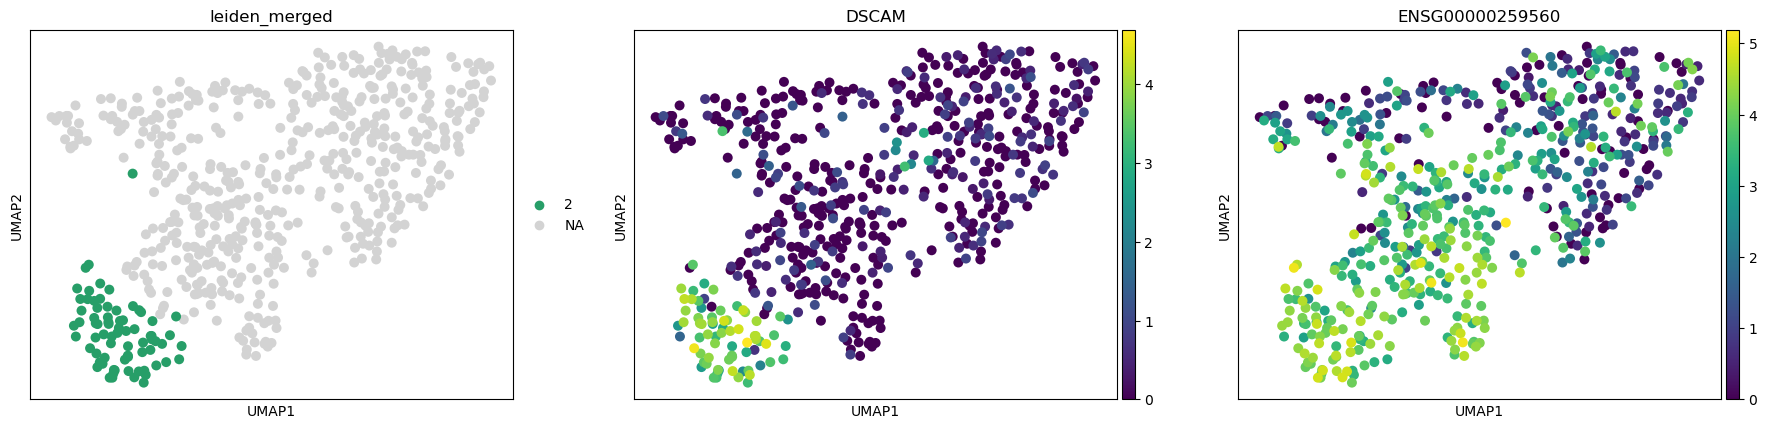

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


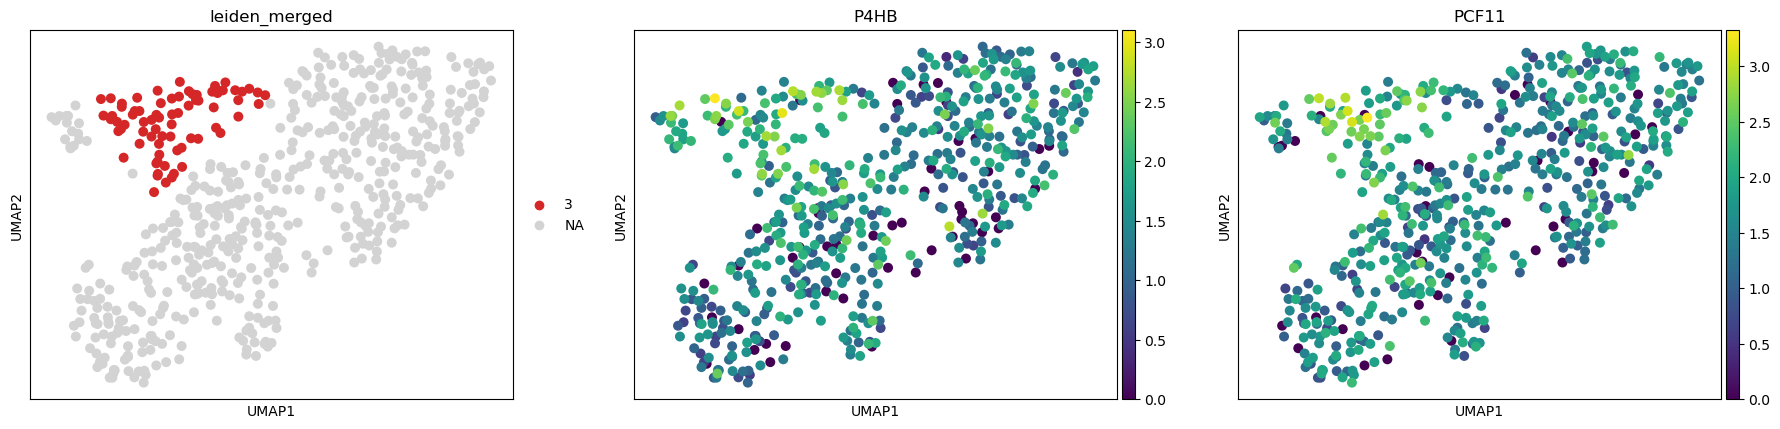

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


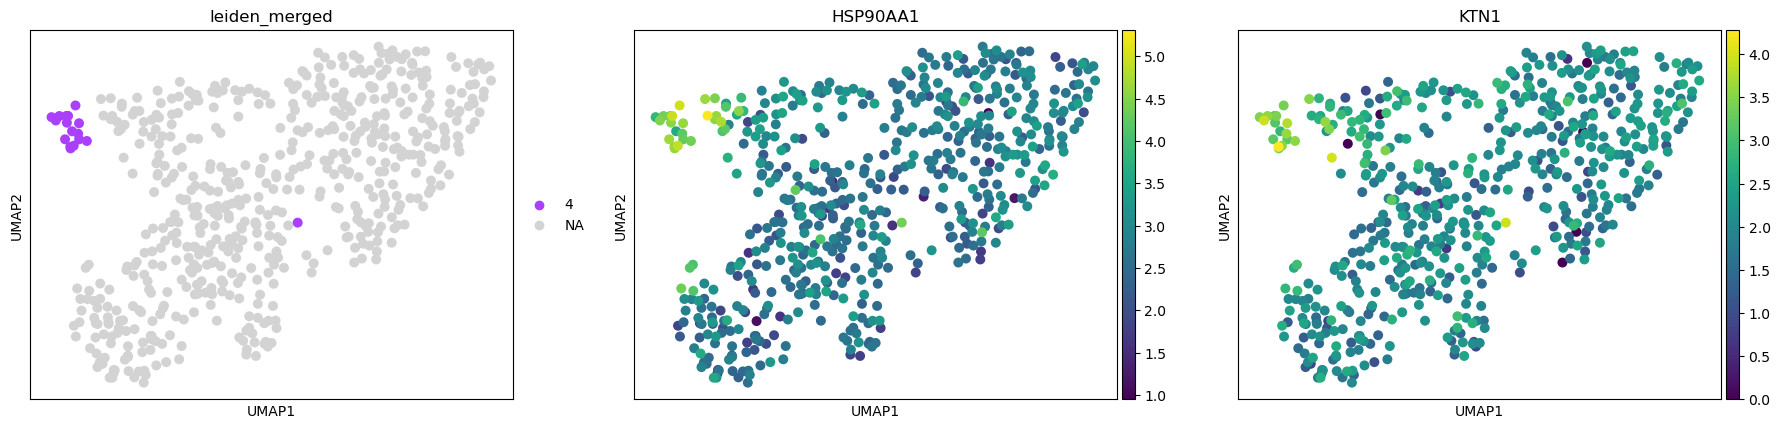

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


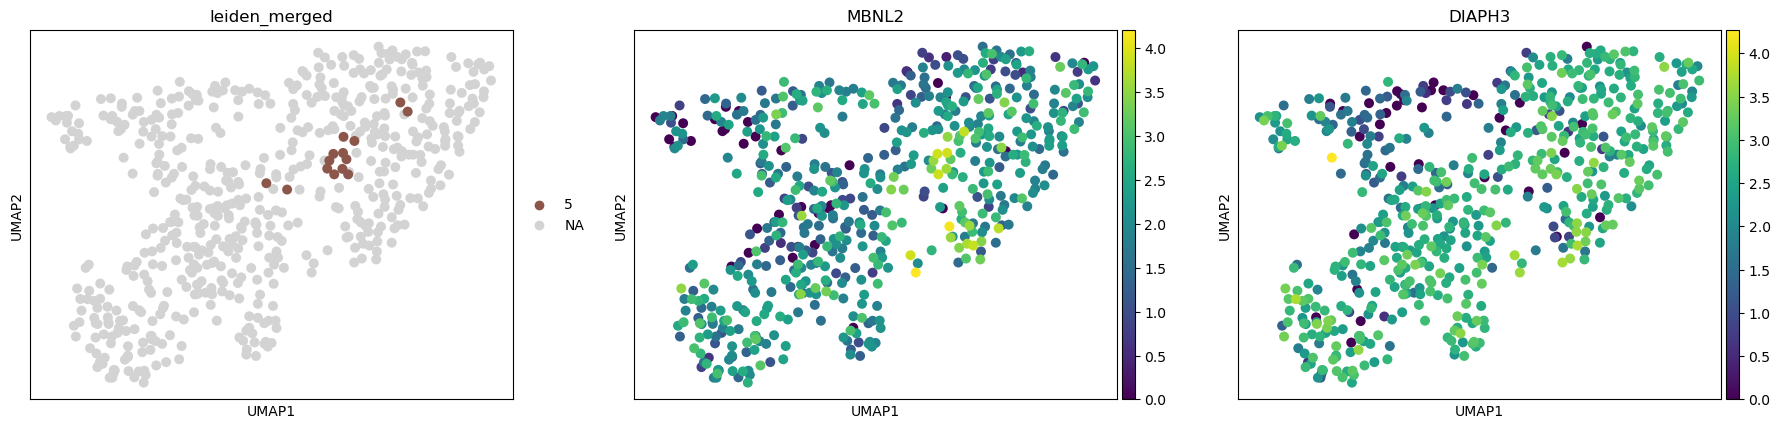

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


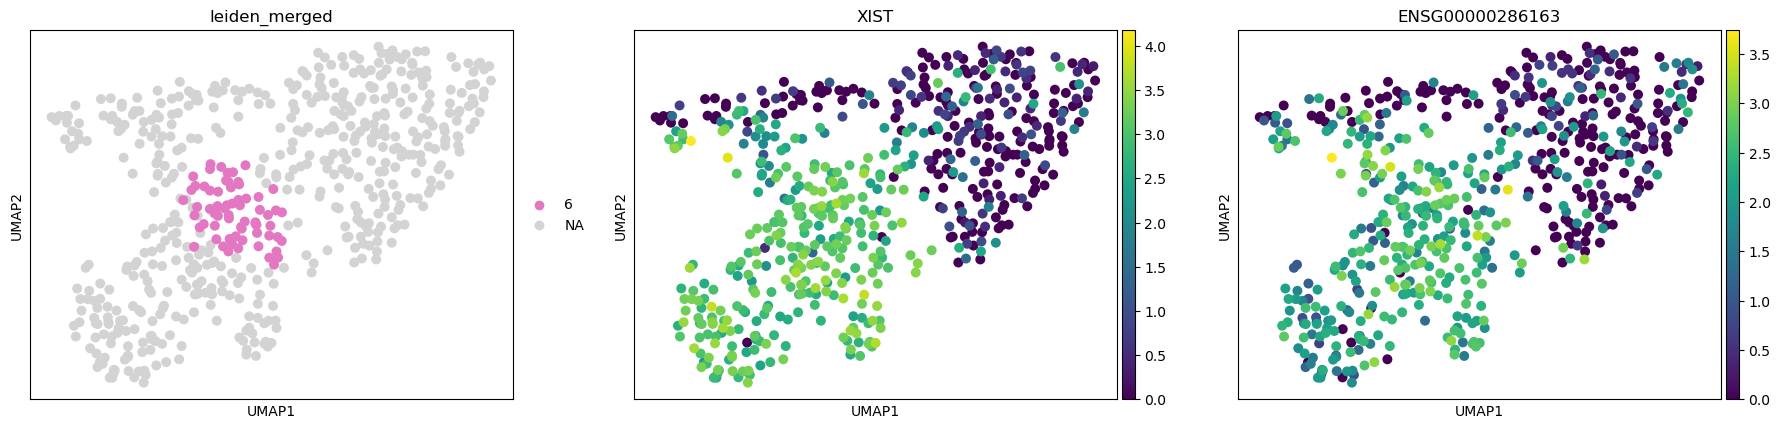

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


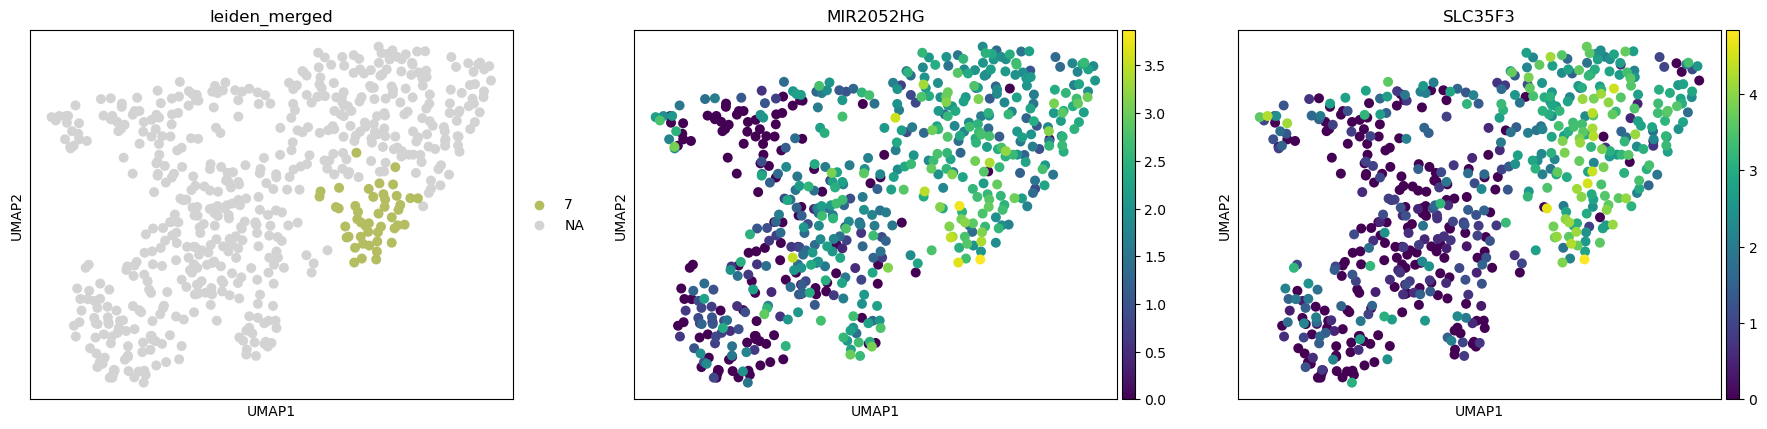

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


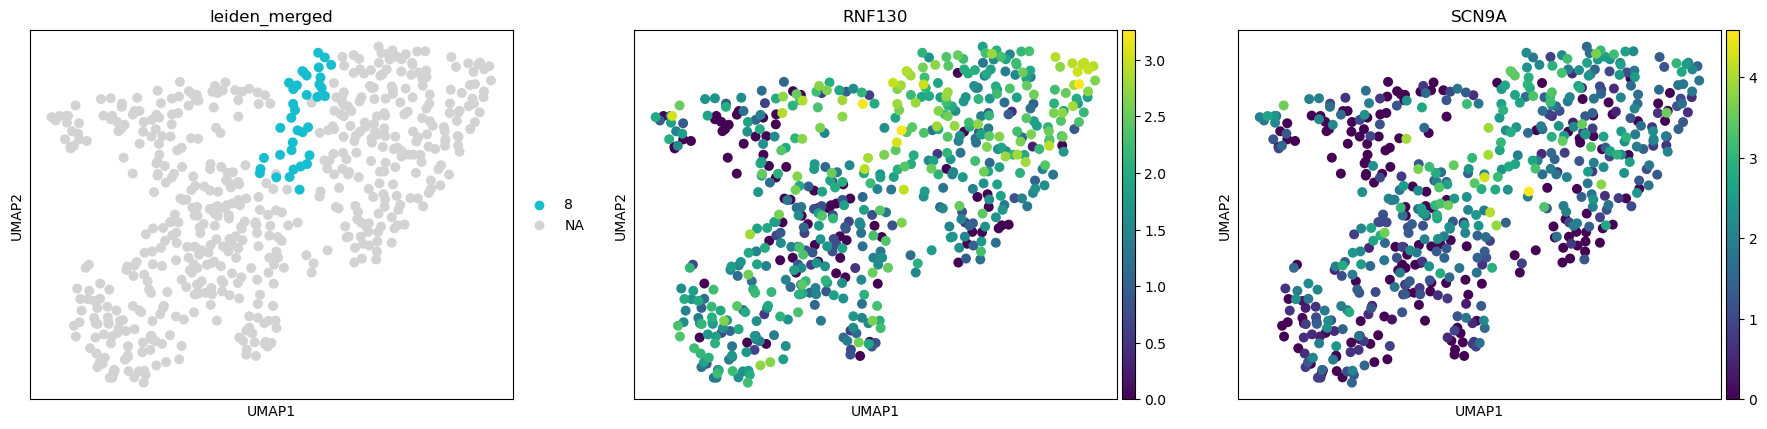

/iblm/netapp/home/bbalderson/miniforge3/envs/rat_multiomics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


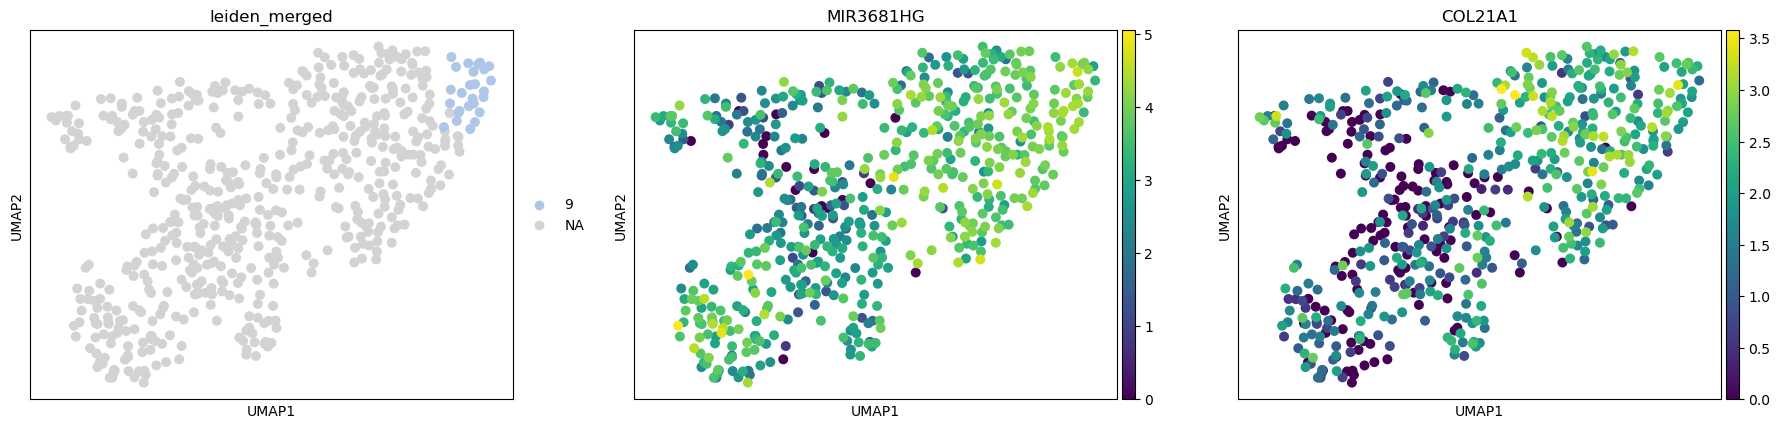

In [167]:
for clust, genes in marker_genes.items():

    sc.pl.umap(data, color=['leiden_merged']+list(genes), groups=[clust])

In [168]:
data.layers["scaled"] = sc.pp.scale(data, copy=True).X

# Some UMAPs of this stuff

In [170]:
data.obsm.keys()

KeysView(AxisArrays with keys: X_pca, X_umap, dosages, dosages_genes, t7_all, t7_no_bc_umis, t7_umis, t7_all__manual-edits-only, t7_no_bc_umis__manual-edits-only, t7_umis__manual-edits-only, dosages__manual-edits-only, dosages_genes_manual-edits-only, dosages_manual-edits-only, t7_all_manual-edits-only, t7_no_bc_umis_manual-edits-only, t7_umis_manual-edits-only, leiden_enrich_scores, leiden_merged_enrich_scores)

In [171]:
data.obs['sample'].cat.categories

Index(['baf_ki', 'no_ki', 'nurd_ki'], dtype='object')

In [172]:
data.uns['sample_colors']

['#1f77b4', '#ff7f0e', '#2ca02c']

In [173]:
data.uns['sample_colors'] = [sample_colors[sample_] for sample_ in data.obs['sample'].cat.categories]

In [178]:
data.obs['log10_total_counts'] = np.log10(data.obs['total_counts'].values)

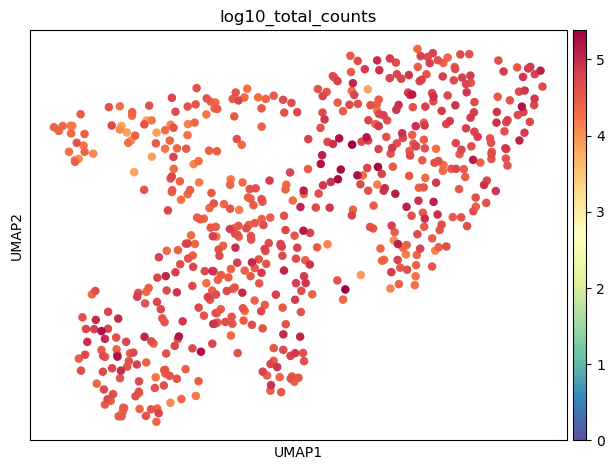

In [180]:
sc.pl.umap(data, color='log10_total_counts', show=False, size=150, cmap='Spectral_r', vmin=0)
plt.show()

In [ ]:
sc.pl.umap(data, color='phase', show=False)
plt.show()

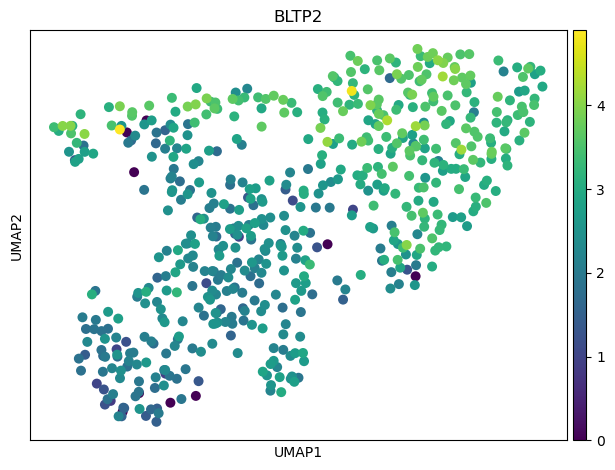

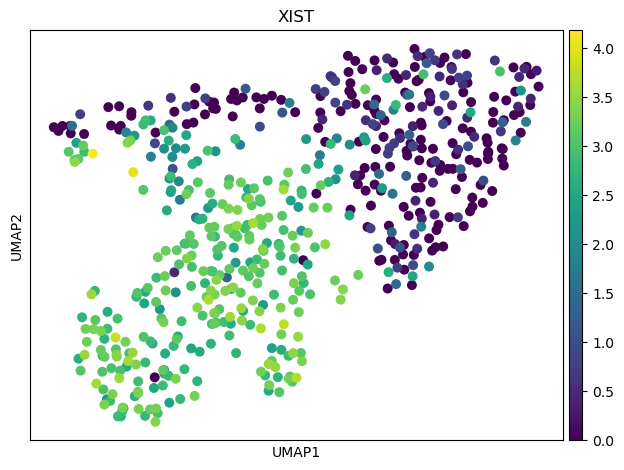

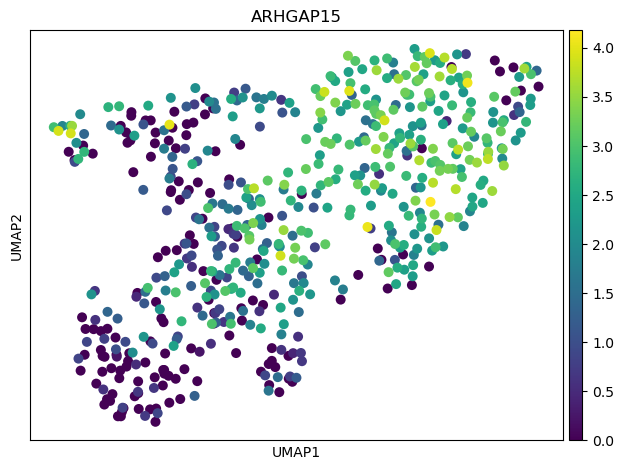

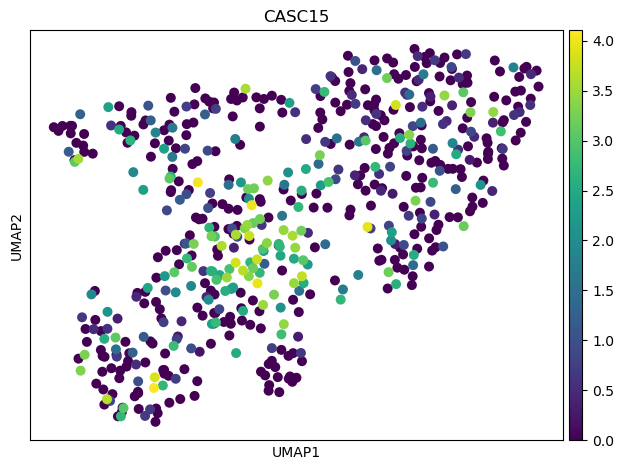

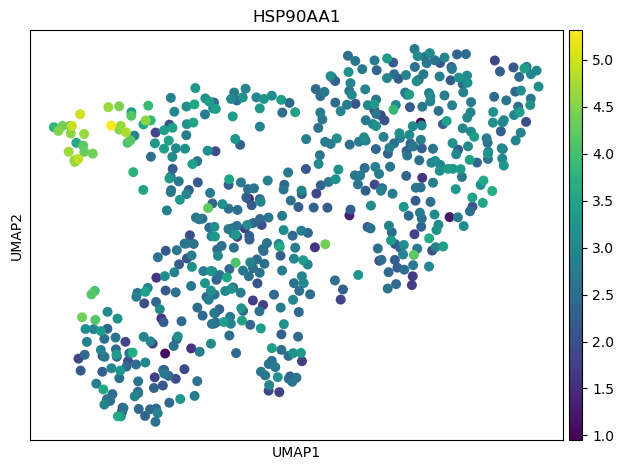

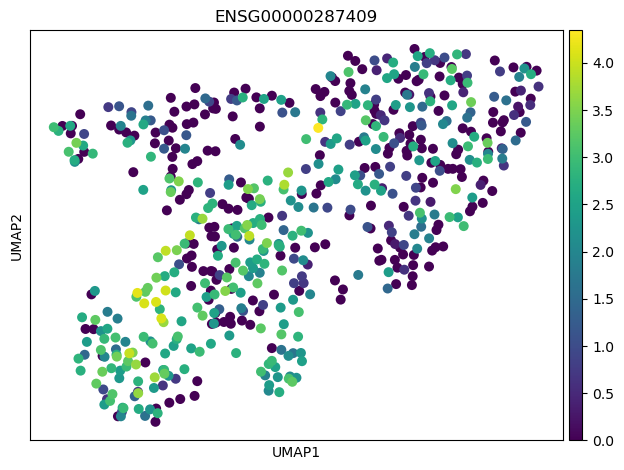

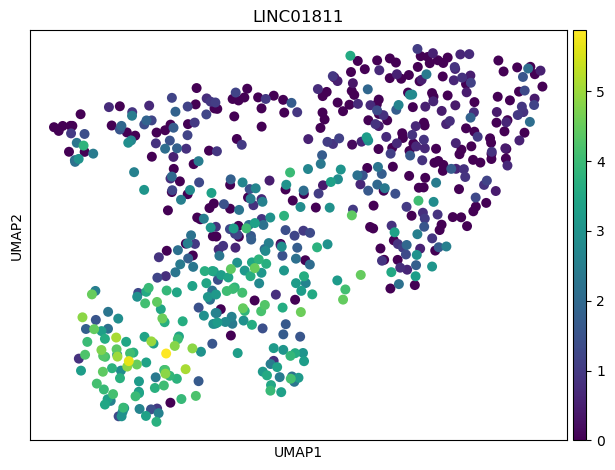

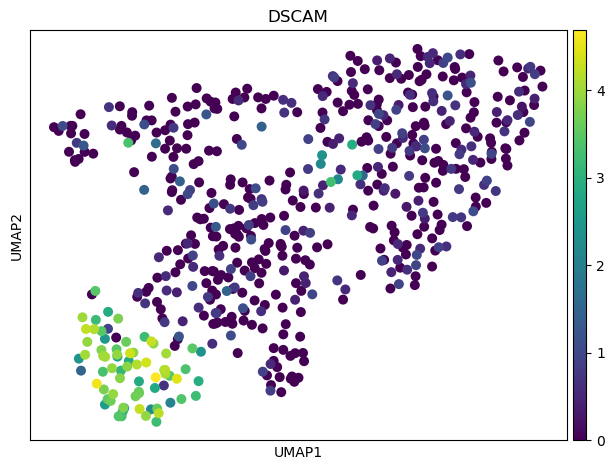

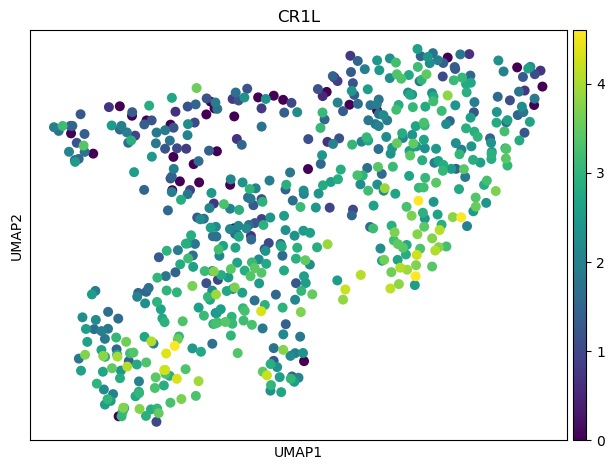

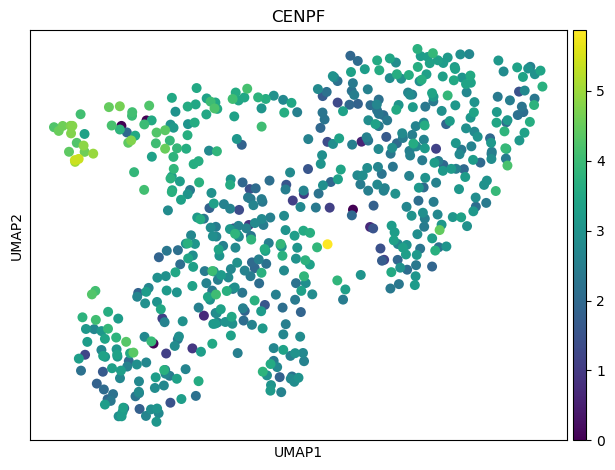

In [182]:
#### Selecting some example genes to save and show in the plot...
select_genes = ['BLTP2', 'XIST', 'ARHGAP15', 'CASC15', 'HSP90AA1', 'ENSG00000287409', 'LINC01811', 'DSCAM',
               'CR1L', 'CENPF']
for gene in select_genes:
    sc.pl.umap(data, color=gene, show=False)
    plt.show()

# Now need to compare against the 10k lib, particularly in terms of the off-target edits detected.

In [185]:
tenk_data = sc.read_h5ad(f'{data_dir2}superb_data.with-guide-imputation.h5ad')
tenk_data

AnnData object with n_obs × n_vars = 9500 × 62754
    obs: 'bc_wells', 'sample', 'species', 'gene_count', 'tscp_count', 'mread_count', 'bc1_well', 'bc2_well', 'bc3_well', 'bc1_wind', 'bc2_wind', 'bc3_wind', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'guide_set', 'guide_set_all', 't7_umis_removed_counts', 'dosages_removed_counts', 't7_all_removed_counts', 't7_no_bc_umis_removed_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'edit_site_info', 'edit_site_info_all_guide_homology', 'edit_site_info_guide_homology', 'edit_site_info_guide_homology_and_coinc', 'edit_site_info_guide_homology_and_coinc_final', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_u

In [334]:
tenk_edit_info = tenk_data.uns['edit_site_info_guide_homology_and_coinc_final']
tenk_edit_info.head(2)

name chr       pos  start_window  end_window   
hg38_1:26696719  hg38_1:26696719   1  26696719      26696579    26696859  \
hg38_1:26696862  hg38_1:26696862   1  26696862      26696722    26697002   

                intersecting_genes  copy-number  n_cells_edited   
hg38_1:26696719             ARID1A            4             359  \
hg38_1:26696862             ARID1A            4             102   

                 stranded_edit_dist        target_name  ...   
hg38_1:26696719                   0  hg38_1:26696719_2  ...  \
hg38_1:26696862                   2  hg38_1:26696862_3  ...   

                         coinc_guide_seq  coinc_count coinc_fraction   
hg38_1:26696719  AAGAACTCGAACGGGAACGCGGG          1.0       0.754789  \
hg38_1:26696862  GCTTCGGGCAACCCTACGGCCGG          1.0       0.900261   

                guide_score confident_guide_call  manual_edit_call   
hg38_1:26696719   17.835997                 True              True  \
hg38_1:26696862   18.043814                 True              True   

                 t7_umis_removed_counts dosages_removed_counts   
hg38_1:26696719                      89                     80  \
hg38_1:26696862                      23                     22   

                t7_all_removed_counts t7_no_bc_umis_removed_counts  
hg38_1:26696719                  8462                         8373  
hg38_1:26696862                  8605                         8582  

[2 rows x 36 columns]

In [335]:
tenk_edit_info = tenk_edit_info.loc[tenk_edit_info['manual_edit_call'].values,:]

In [336]:
fiveh_edit_info = edit_site_info.loc[edit_site_info['manual_edit_call'].values,:]
fiveh_edit_info

name chr        pos  start_window  end_window   
0     hg38_12:6602172  12    6602172       6602032     6602312  \
1   hg38_14:104729499  14  104729499     104729359   104729639   
2     hg38_17:7890653  17    7890653       7890513     7890793   
4     hg38_4:14359416   4   14359416      14359276    14359556   
5    hg38_19:10984175  19   10984175      10984035    10984315   
6    hg38_17:47188686  17   47188686      47188546    47188826   
7      hg38_6:1397192   6    1397192       1397052     1397332   
8    hg38_1:224544957   1  224544957     224544817   224545097   
9     hg38_X:41086519   X   41086519      41086379    41086659   
10  hg38_12:110404169  12  110404169     110404029   110404309   
11    hg38_12:6606341  12    6606341       6606201     6606481   
12   hg38_5:148237295   5  148237295     148237155   148237435   
13    hg38_4:59298822   4   59298822      59298682    59298962   
14   hg38_20:14937204  20   14937204      14937064    14937344   
15    hg38_17:3029640  17    3029640       3029500     3029780   
16    hg38_1:26696719   1   26696719      26696579    26696859   
17  hg38_13:110873574  13  110873574     110873434   110873714   
18   hg38_14:71885108  14   71885108      71884968    71885248   
19   hg38_12:68620881  12   68620881      68620741    68621021   
20    hg38_4:88368039   4   88368039      88367899    88368179   
21    hg38_4:79849103   4   79849103      79848963    79849243   
22   hg38_3:194003699   3  194003699     194003559   194003839   
23    hg38_9:37594621   9   37594621      37594481    37594761   
32    hg38_1:26696864   1   26696864      26696724    26697004   
33   hg38_1:245947392   1  245947392     245947252   245947532   
34    hg38_18:3115881  18    3115881       3115741     3116021   
35    hg38_19:6212712  19    6212712       6212572     6212852   
37   hg38_19:10986490  19   10986490      10986350    10986630   
38  hg38_13:113608068  13  113608068     113607928   113608208   
39   hg38_16:81393308  16   81393308      81393168    81393448   

           intersecting_genes  copy-number  n_cells_edited   
0        ENSG00000285238,CHD4            2             232  \
1                       ADSS1            2             105   
2                        CHD3            2             144   
4             ENSG00000287360            3              52   
5                     SMARCA4            3              76   
6                       CDC27            3              32   
7                         nan            4              22   
8                       CNIH3            4              14   
9                       USP9X            2              15   
10            ENSG00000258210            3              10   
11       ENSG00000285238,CHD4            2              17   
12           FBXO38-DT,MARCOL            3               4   
13                        nan            3               7   
14                    MACROD2            2               6   
15                   RAP1GAP2            2               7   
16                     ARID1A            4              10   
17                        nan            2               4   
18            ENSG00000266869            2               4   
19                      RAP1B            3               7   
20                        nan            3               7   
21                      PCAT4            3               3   
22  LINC02026,ENSG00000238043            3               1   
23            ENSG00000255872            4               1   
32                     ARID1A            4               6   
33                      SMYD3            4               1   
34                      MYOM1            4               1   
35                      MLLT1            3               1   
37                    SMARCA4            3               2   
38                      TFDP1            2               1   
39                        nan            4               1   

    stranded_edit_dist  manual_edit_call  
0   

In [337]:
#### Determining the edits that are in-common between the 500 cell lib and the 10k lib.
chrs_ = np.unique( list(tenk_edit_info['chr'].values)+list(fiveh_edit_info['chr']) )
chrs_

array(['1', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20',
       '21', '3', '4', '5', '6', '9', 'X'], dtype='<U2')

In [338]:
fiveh_edits_paired = [] # fiveh edits that were paired to a 10k
tenk_edits_paired = [] # tenk edit that were paired to a 5h cell
paired_edit_dists = []

dist = 20
for chr_ in chrs_:

    tenk_chr_edits = tenk_edit_info.loc[tenk_edit_info['chr'].values==chr_,:]
    fiveh_chr_edits = fiveh_edit_info.loc[fiveh_edit_info['chr'].values==chr_,:]

    for _, tenk_edit in tenk_chr_edits.iterrows():
        for _, fiveh_edit in fiveh_chr_edits.iterrows():

            dist_ = abs( tenk_edit['pos'] - fiveh_edit['pos'] )

            if dist_ < dist:
                fiveh_edits_paired.append( fiveh_edit['name'] )
                tenk_edits_paired.append( tenk_edit['name'] )
                paired_edit_dists.append( dist_ )

In [339]:
fiveh_edit_info.shape

(30, 10)

In [340]:
len(fiveh_edits_paired), len(np.unique(fiveh_edits_paired))

(30, 30)

In [341]:
len(tenk_edits_paired), len(np.unique(tenk_edits_paired))

(30, 30)

In [342]:
for i in range(len(fiveh_edits_paired)):
    print(fiveh_edits_paired[i], tenk_edits_paired[i])

hg38_1:26696719 hg38_1:26696719
hg38_1:26696864 hg38_1:26696862
hg38_1:245947392 hg38_1:245947392
hg38_1:224544957 hg38_1:224544957
hg38_12:6602172 hg38_12:6602172
hg38_12:6606341 hg38_12:6606340
hg38_12:68620881 hg38_12:68620881
hg38_12:110404169 hg38_12:110404170
hg38_13:110873574 hg38_13:110873574
hg38_13:113608068 hg38_13:113608067
hg38_14:104729499 hg38_14:104729499
hg38_14:71885108 hg38_14:71885108
hg38_16:81393308 hg38_16:81393308
hg38_17:7890653 hg38_17:7890653
hg38_17:47188686 hg38_17:47188686
hg38_17:3029640 hg38_17:3029640
hg38_18:3115881 hg38_18:3115881
hg38_19:10986490 hg38_19:10986490
hg38_19:10984175 hg38_19:10984175
hg38_19:6212712 hg38_19:6212712
hg38_20:14937204 hg38_20:14937204
hg38_3:194003699 hg38_3:194003698
hg38_4:14359416 hg38_4:14359416
hg38_4:79849103 hg38_4:79849103
hg38_4:88368039 hg38_4:88368039
hg38_4:59298822 hg38_4:59298822
hg38_5:148237295 hg38_5:148237295
hg38_6:1397192 hg38_6:1397192
hg38_9:37594621 hg38_9:37594631
hg38_X:41086519 hg38_X:41086519


***Wow they are essentially at the same position!***

In [343]:
dist_set = np.unique(paired_edit_dists)
dist_counts = [paired_edit_dists.count(dist_) for dist_ in dist_set]

In [344]:
dist_counts

[24, 4, 1, 1]

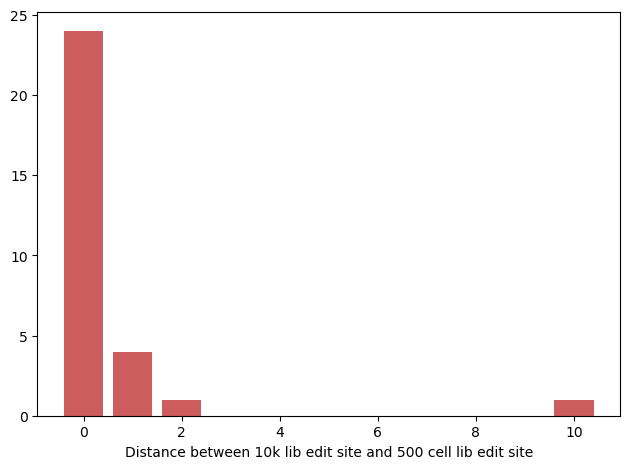

In [345]:
plt.bar(dist_set, dist_counts, color='indianred')
plt.xlabel('Distance between 10k lib edit site and 500 cell lib edit site')
plt.show()

***Looking at the unique edits called***

In [346]:
fiveh_edits_unique = set(list(fiveh_edit_info['name'].values)).difference( set(fiveh_edits_paired) )
tenk_edits_unique = set(list(tenk_edit_info['name'].values)).difference( set(tenk_edits_paired) )

fiveh_edits_unique, tenk_edits_unique

(set(),
 {'hg38_10:93632366',
  'hg38_11:68841673',
  'hg38_11:70522075',
  'hg38_13:34520796',
  'hg38_19:10293417',
  'hg38_1:108747053',
  'hg38_1:11841677',
  'hg38_21:37649273',
  'hg38_3:25497711',
  'hg38_3:31532824',
  'hg38_4:7542884',
  'hg38_6:57807628',
  'hg38_9:113111494'})

In [426]:
from matplotlib_venn import venn2, venn3
?venn2

Signature:
venn2(
    subsets,
    set_labels=('A', 'B'),
    set_colors=('r', 'g'),
    alpha=0.4,
    normalize_to=1.0,
    ax=None,
    subset_label_formatter=None,
)
Docstring:
Plots a 2-set area-weighted Venn diagram.
The subsets parameter can be one of the following:
 - A list (or a tuple) containing two set objects.
 - A dict, providing sizes of three diagram regions.
   The regions are identified via two-letter binary codes ('10', '01', and '11'), hence a valid set could look like:
   {'10': 10, '01': 20, '11': 40}. Unmentioned codes are considered to map to 0.
 - A list (or a tuple) with three numbers, denoting the sizes of the regions in the following order:
   (10, 01, 11)

``set_labels`` parameter is a list of two strings - set labels. Set it to None to disable set labels.
The ``set_colors`` parameter should be a list of two elements, specifying the "base colors" of the two circles.
The color of circle intersection will be computed based on those.

The ``normalize_to`` para

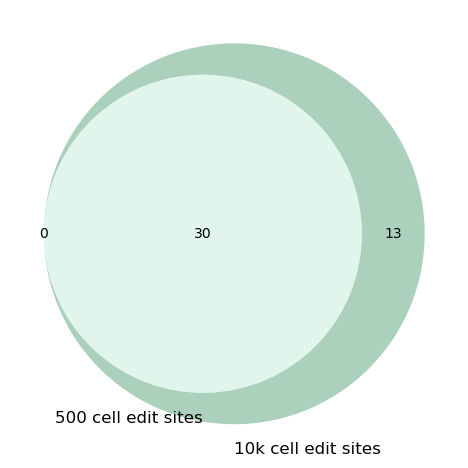

In [353]:
venn2(subsets = {'10': len(fiveh_edits_unique), '01': len(tenk_edits_unique), 
                 '11': len(fiveh_edits_paired)}, set_labels = ('500 cell edit sites', '10k cell edit sites'),
     set_colors=['thistle', 'seagreen'])
plt.show()

***Can also break down which of the edit sites were due to the white listing***

In [429]:
no_reverse_read_edits = fiveh_edit_info['name'].values[ fiveh_edit_info['stranded_edit_dist'].values.astype(str)=='nan' ]
len(no_reverse_read_edits), no_reverse_read_edits

(18,
 array(['hg38_14:104729499', 'hg38_1:224544957', 'hg38_X:41086519',
        'hg38_4:59298822', 'hg38_20:14937204', 'hg38_13:110873574',
        'hg38_14:71885108', 'hg38_12:68620881', 'hg38_4:88368039',
        'hg38_4:79849103', 'hg38_3:194003699', 'hg38_9:37594621',
        'hg38_1:245947392', 'hg38_18:3115881', 'hg38_19:6212712',
        'hg38_19:10986490', 'hg38_13:113608068', 'hg38_16:81393308'],
       dtype=object))

In [430]:
?venn3

Signature:
venn3(
    subsets,
    set_labels=('A', 'B', 'C'),
    set_colors=('r', 'g', 'b'),
    alpha=0.4,
    normalize_to=1.0,
    ax=None,
    subset_label_formatter=None,
)
Docstring:
Plots a 3-set area-weighted Venn diagram.
The subsets parameter can be one of the following:
 - A list (or a tuple), containing three set objects.
 - A dict, providing sizes of seven diagram regions.
   The regions are identified via three-letter binary codes ('100', '010', etc), hence a valid set could look like:
   {'001': 10, '010': 20, '110':30, ...}. Unmentioned codes are considered to map to 0.
 - A list (or a tuple) with 7 numbers, denoting the sizes of the regions in the following order:
   (100, 010, 110, 001, 101, 011, 111).

``set_labels`` parameter is a list of three strings - set labels. Set it to None to disable set labels.
The ``set_colors`` parameter should be a list of three elements, specifying the "base colors" of the three circles.
The colors of circle intersections will be comp

In [632]:
len(fiveh_edits_paired)-len(no_reverse_read_edits)

12

In [634]:
out_plots

'/iblm/netapp/data4/bbalderson/edit_capture/plots/cell_qc/superb_500cell_v1/'

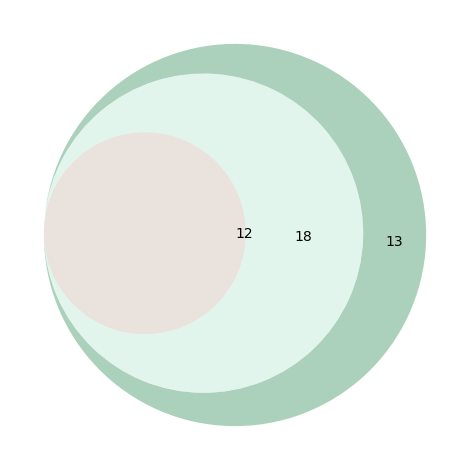

In [635]:
#100, 010, 110, 001, 101, 011, 111
venn3(subsets = {'010': len(fiveh_edits_unique), '001': len(tenk_edits_unique), 
                 '011': len(no_reverse_read_edits),
                '111': len(fiveh_edits_paired)-len(no_reverse_read_edits)}, 
      #set_labels = ('500 cell edit sites - no reverse reads', '500 cell edit sites', '10k cell edit sites'),
      set_labels=('', '', ''), # Will relabel in figure
     set_colors=['lightcoral', 'thistle', 'seagreen'])
plt.show()

***Now seeing what the number of edited cells is like between the two libraries!***

In [355]:
fiveh_edit_info.index = fiveh_edit_info['name']

In [358]:
tenk_edits_unique_list = list(tenk_edits_unique)

In [365]:
(np.array(tenk_edited_cells)/tenk_data.shape[0])*data.shape[0]

array([ 22.03126316,   6.25957895,   0.42957895,   8.40747368,
       167.22894737,  10.98494737,   1.47284211,   7.67105263,
         1.10463158,   0.67505263, 108.49936842,   2.14789474,
         0.55231579, 111.99736842,  23.81094737,   4.41852632,
         0.79778947,   3.19115789,  53.82010526,   0.73642105,
         8.53021053,   0.79778947,  25.03831579,   1.41147368,
         3.98894737,   5.89136842,   2.27063158,  14.85115789,
         0.30684211,  19.08557895,   0.85915789,   0.30684211,
         0.24547368,   0.18410526,   0.30684211,   0.18410526,
         1.65694737,   0.24547368,   0.85915789,   0.30684211,
         0.49094737,   0.49094737,   0.85915789])

In [451]:
fiveh_edit_info.loc[fiveh_edits_paired,:]

name chr        pos  start_window  end_window   
name                                                                            
hg38_1:26696719      hg38_1:26696719   1   26696719      26696579    26696859  \
hg38_1:26696864      hg38_1:26696864   1   26696864      26696724    26697004   
hg38_1:245947392    hg38_1:245947392   1  245947392     245947252   245947532   
hg38_1:224544957    hg38_1:224544957   1  224544957     224544817   224545097   
hg38_12:6602172      hg38_12:6602172  12    6602172       6602032     6602312   
hg38_12:6606341      hg38_12:6606341  12    6606341       6606201     6606481   
hg38_12:68620881    hg38_12:68620881  12   68620881      68620741    68621021   
hg38_12:110404169  hg38_12:110404169  12  110404169     110404029   110404309   
hg38_13:110873574  hg38_13:110873574  13  110873574     110873434   110873714   
hg38_13:113608068  hg38_13:113608068  13  113608068     113607928   113608208   
hg38_14:104729499  hg38_14:104729499  14  104729499     104729359   104729639   
hg38_14:71885108    hg38_14:71885108  14   71885108      71884968    71885248   
hg38_16:81393308    hg38_16:81393308  16   81393308      81393168    81393448   
hg38_17:7890653      hg38_17:7890653  17    7890653       7890513     7890793   
hg38_17:47188686    hg38_17:47188686  17   47188686      47188546    47188826   
hg38_17:3029640      hg38_17:3029640  17    3029640       3029500     3029780   
hg38_18:3115881      hg38_18:3115881  18    3115881       3115741     3116021   
hg38_19:10986490    hg38_19:10986490  19   10986490      10986350    10986630   
hg38_19:10984175    hg38_19:10984175  19   10984175      10984035    10984315   
hg38_19:6212712      hg38_19:6212712  19    6212712       6212572     6212852   
hg38_20:14937204    hg38_20:14937204  20   14937204      14937064    14937344   
hg38_3:194003699    hg38_3:194003699   3  194003699     194003559   194003839   
hg38_4:14359416      hg38_4:14359416   4   14359416      14359276    14359556   
hg38_4:79849103      hg38_4:79849103   4   79849103      79848963    79849243   
hg38_4:88368039      hg38_4:88368039   4   88368039      88367899    88368179   
hg38_4:59298822      hg38_4:59298822   4   59298822      59298682    59298962   
hg38_5:148237295    hg38_5:148237295   5  148237295     148237155   148237435   
hg38_6:1397192        hg38_6:1397192   6    1397192       1397052     1397332   
hg38_9:37594621      hg38_9:37594621   9   37594621      37594481    37594761   
hg38_X:41086519      hg38_X:41086519   X   41086519      41086379    41086659   

                          intersecting_genes  copy-number  n_cells_edited   
name                                                                        
hg38_1:26696719                       ARID1A            4              10  \
hg38_1:26696864                       ARID1A            4               6   
hg38_1:245947392                       SMYD3            4               1   
hg38_1:224544957                       CNIH3            4              14   
hg38_12:6602172         ENSG00000285238,CHD4            2             232   
hg38_12:6606341         ENSG00000285238,CHD4            2              17   
hg38_12:68620881                       RAP1B            3               7   
hg38_12:110404169            ENSG00000258210            3              10   
hg38_13:110873574                        nan            2               4   
hg38_13:113608068                      TFDP1            2               1   
hg38_14:104729499                      ADSS1            2             105   
hg38_14:71885108             ENSG00000266869            2               4   
hg38_16:81393308                         nan            4               1   
hg38_17:7890653                         CHD3            2             144   
hg38_17:47188686                       CDC27            3              32   
hg38_17:3029640                     RAP1GAP2            2               7   
hg38_18:3115881                        MYOM1         

In [456]:
import scipy.stats

PearsonRResult(statistic=0.984960929101931, pvalue=6.856727269984345e-33)


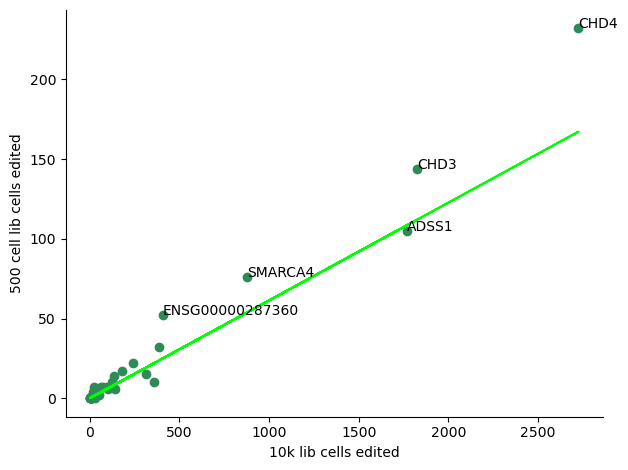

In [457]:
fiveh_edited_cells = list(fiveh_edit_info.loc[fiveh_edits_paired, 'n_cells_edited'])+[0]*len(tenk_edits_unique)
tenk_edited_cells = list(tenk_edit_info.loc[tenk_edits_paired, 'n_cells_edited'])+\
                    list(tenk_edit_info.loc[tenk_edits_unique_list, 'n_cells_edited'])

print(scipy.stats.pearsonr(fiveh_edited_cells, tenk_edited_cells))

fig, ax = plt.subplots()
ax.scatter(tenk_edited_cells, fiveh_edited_cells, color='seagreen')
plt.plot(tenk_edited_cells, (np.array(tenk_edited_cells)/tenk_data.shape[0])*data.shape[0],
        color='lime')

order = np.argsort(-np.array(fiveh_edited_cells[0:len(fiveh_edits_paired)]))
top_genes = fiveh_edit_info.loc[fiveh_edits_paired, 'intersecting_genes'].values

for i in order[0:5]:
    plt.text(tenk_edited_cells[i], fiveh_edited_cells[i], top_genes[i].split(',')[-1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('10k lib cells edited')
plt.ylabel('500 cell lib cells edited')
vhs.dealWithPlot(True, True, True, out_plots, f"lib_edit-site_edited-cells_scatter.png", 300)

In [371]:
tenk_edit_info.loc[tenk_edits_unique_list,:]

name chr        pos  start_window  end_window   
hg38_9:113111494  hg38_9:113111494   9  113111494     113111354   113111634  \
hg38_1:108747053  hg38_1:108747053   1  108747053     108746913   108747193   
hg38_4:7542884      hg38_4:7542884   4    7542884       7542744     7543024   
hg38_13:34520796  hg38_13:34520796  13   34520796      34520656    34520936   
hg38_11:70522075  hg38_11:70522075  11   70522075      70521935    70522215   
hg38_10:93632366  hg38_10:93632366  10   93632366      93632226    93632506   
hg38_11:68841673  hg38_11:68841673  11   68841673      68841533    68841813   
hg38_1:11841677    hg38_1:11841677   1   11841677      11841537    11841817   
hg38_3:31532824    hg38_3:31532824   3   31532824      31532684    31532964   
hg38_21:37649273  hg38_21:37649273  21   37649273      37649133    37649413   
hg38_6:57807628    hg38_6:57807628   6   57807628      57807488    57807768   
hg38_19:10293417  hg38_19:10293417  19   10293417      10293277    10293557   
hg38_3:25497711    hg38_3:25497711   3   25497711      25497571    25497851   

                     intersecting_genes  copy-number  n_cells_edited   
hg38_9:113111494                FAM225B            3              14  \
hg38_1:108747053                 STXBP3            4               5   
hg38_4:7542884                   SORCS2            3               4   
hg38_13:34520796    LINC02343,LINC00457            2               3   
hg38_11:70522075                 SHANK2            3               5   
hg38_10:93632366                  PDE6C            2               3   
hg38_11:68841673                  CPT1A            3              27   
hg38_1:11841677                   CLCN6            4               4   
hg38_3:31532824                   STT3B            4              14   
hg38_21:37649273  ENSG00000286717,KCNJ6            4               5   
hg38_6:57807628                     nan            3               8   
hg38_19:10293417                  ICAM5            3               8   
hg38_3:25497711                    RARB            4              14   

                  stranded_edit_dist         target_name  ...   
hg38_9:113111494                   1  hg38_9:113111494_2  ...  \
hg38_1:108747053                   1  hg38_1:108747053_1  ...   
hg38_4:7542884                     1    hg38_4:7542884_1  ...   
hg38_13:34520796                   3  hg38_13:34520796_2  ...   
hg38_11:70522075                   3  hg38_11:70522075_2  ...   
hg38_10:93632366                   2  hg38_10:93632366_3  ...   
hg38_11:68841673                   1  hg38_11:68841673_1  ...   
hg38_1:11841677                    0   hg38_1:11841677_2  ...   
hg38_3:31532824                    5   hg38_3:31532824_1  ...   
hg38_21:37649273                   1  hg38_21:37649273_1  ...   
hg38_6:57807628                    1   hg38_6:57807628_1  ...   
hg38_19:10293417                   1  hg38_19:10293417_2  ...   
hg38_3:25497711                    3   hg38_3:25497711_2  ...   

                          coinc_guide_seq  coinc_count coinc_fraction   
hg38_9:113111494  GCCGGCATAAGAGCATACGCTGG     0.037127       0.400920  \
hg38_1:108747053  GCTTCGGGCAACCCTACGGCCGG     0.018136       0.255171   
hg38_4:7542884    TGGCCGAGGAGTTCCGCCCAGGG     0.030964       0.385154   
hg38_13:34520796     ACCGAGGGTGGAGGTAGCGT     0.000000       0.000000   
hg38_11:70522075     ACCGAGGGTGGAGGTAGCGT     0.000000       0.000000   
hg38_10:93632366     GCTTCGGGCAACCCTACGGC     0.000000       0.000000   
hg38_11:68841673  GCCGGCATAAGAGCATACGCTGG     0.009724       0.132758   
hg38_1:11841677   TGGCCGAGGAGTTCCGCCCAGGG     0.024521       1.000000   
hg38_3:31532824      ACCGAGGGTGGAGGTAGCGT     0.000000       0.000000   
hg38_21:37649273  TGGCCGAGGAGTTCCGCCCAGGG     0.007311       1.000000   
hg38_6:57807628   AATATGGAACCGGACCGGGTCGG     0.032848       0.649789   
hg38_19:10293417  GCCGGCATAAGAGCATACGCTGG     0.000416       0.017032   
hg38_3:25497711      ACCGAGGGTGGAGGTAGCGT     0.000000

In [377]:
##### Every site we DON'T detect is actually at a frequency we DON'T expect to detect, given the total number of cells sequenced.
nondetected_edit_expected_counts = (tenk_edit_info.loc[tenk_edits_unique_list,'n_cells_edited'] / tenk_data.shape[0])*500
nondetected_edit_expected_counts

hg38_9:113111494    0.736842
hg38_1:108747053    0.263158
hg38_4:7542884      0.210526
hg38_13:34520796    0.157895
hg38_11:70522075    0.263158
hg38_10:93632366    0.157895
hg38_11:68841673    1.421053
hg38_1:11841677     0.210526
hg38_3:31532824     0.736842
hg38_21:37649273    0.263158
hg38_6:57807628     0.421053
hg38_19:10293417    0.421053
hg38_3:25497711     0.736842
Name: n_cells_edited, dtype: float64

In [378]:
detected_edit_expected_counts = (tenk_edit_info.loc[tenk_edits_paired,'n_cells_edited'] / tenk_data.shape[0])*500
detected_edit_expected_counts

hg38_1:26696719       18.894737
hg38_1:26696862        5.368421
hg38_1:245947392       0.368421
hg38_1:224544957       7.210526
hg38_12:6602172      143.421053
hg38_12:6606340        9.421053
hg38_12:68620881       1.263158
hg38_12:110404170      6.578947
hg38_13:110873574      0.947368
hg38_13:113608067      0.578947
hg38_14:104729499     93.052632
hg38_14:71885108       1.842105
hg38_16:81393308       0.473684
hg38_17:7890653       96.052632
hg38_17:47188686      20.421053
hg38_17:3029640        3.789474
hg38_18:3115881        0.684211
hg38_19:10986490       2.736842
hg38_19:10984175      46.157895
hg38_19:6212712        0.631579
hg38_20:14937204       7.315789
hg38_3:194003698       0.684211
hg38_4:14359416       21.473684
hg38_4:79849103        1.210526
hg38_4:88368039        3.421053
hg38_4:59298822        5.052632
hg38_5:148237295       1.947368
hg38_6:1397192        12.736842
hg38_9:37594631        0.263158
hg38_X:41086519       16.368421
Name: n_cells_edited, dtype: float64

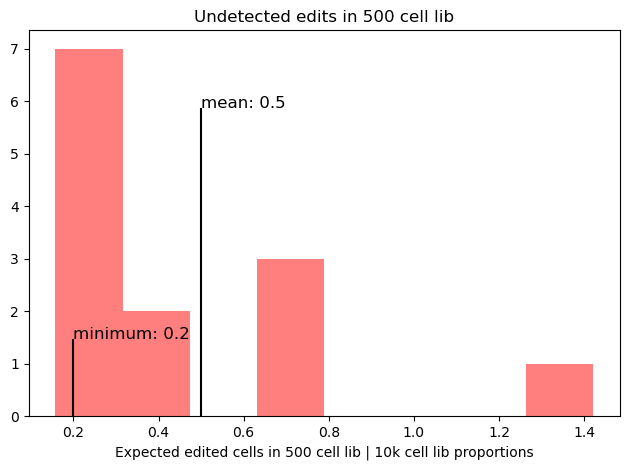

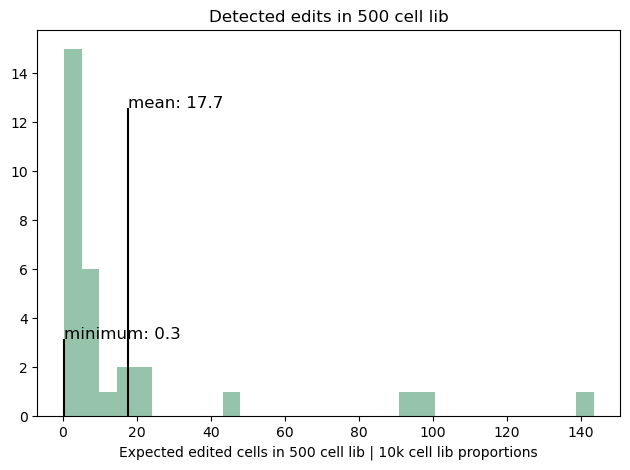

In [404]:
### Could also plot this distribution

#### Non-detected edits
fig, ax = plt.subplots()
ax.hist(nondetected_edit_expected_counts.values, color='red', alpha=0.5, bins=8)
plt.title("Undetected edits in 500 cell lib")
plt.xlabel("Expected edited cells in 500 cell lib | 10k cell lib proportions")

cutoff = np.round(min( nondetected_edit_expected_counts.values ), 1)
cutoff_color = 'black'
y = ax.get_ylim()[1] * .2
mean_fontsize='large'
mean_fontweight='normal'
ax.vlines(cutoff, 0, y, colors=cutoff_color)
ax.text(cutoff, y, f'minimum: {round(cutoff, 4)}', c=cutoff_color,
        fontsize=mean_fontsize, fontweight=mean_fontweight)

cutoff = np.round(np.mean( nondetected_edit_expected_counts.values ), 1)
y = ax.get_ylim()[1] * .8
ax.vlines(cutoff, 0, y, colors=cutoff_color)
ax.text(cutoff, y, f'mean: {round(cutoff, 4)}', c=cutoff_color,
        fontsize=mean_fontsize, fontweight=mean_fontweight)
plt.show()

#### Detected edits
fig, ax = plt.subplots()
ax.hist(detected_edit_expected_counts.values, color='seagreen', alpha=0.5, bins=30)
plt.title("Detected edits in 500 cell lib")
plt.xlabel("Expected edited cells in 500 cell lib | 10k cell lib proportions")

cutoff = np.round(min( detected_edit_expected_counts.values ), 1)
cutoff_color = 'black'
y = ax.get_ylim()[1] * .2
mean_fontsize='large'
mean_fontweight='normal'
ax.vlines(cutoff, 0, y, colors=cutoff_color)
ax.text(cutoff, y, f'minimum: {round(cutoff, 4)}', c=cutoff_color,
        fontsize=mean_fontsize, fontweight=mean_fontweight)

cutoff = np.round(np.mean( detected_edit_expected_counts.values ), 1)
y = ax.get_ylim()[1] * .8
ax.vlines(cutoff, 0, y, colors=cutoff_color)
ax.text(cutoff, y, f'mean: {round(cutoff, 4)}', c=cutoff_color,
        fontsize=mean_fontsize, fontweight=mean_fontweight)
plt.show()

***Now seeing the relationship between the number of edited alleles across cells between the two libraries***

In [407]:
fiveh_edit_info

name chr        pos  start_window  end_window   
name                                                                            
hg38_12:6602172      hg38_12:6602172  12    6602172       6602032     6602312  \
hg38_14:104729499  hg38_14:104729499  14  104729499     104729359   104729639   
hg38_17:7890653      hg38_17:7890653  17    7890653       7890513     7890793   
hg38_4:14359416      hg38_4:14359416   4   14359416      14359276    14359556   
hg38_19:10984175    hg38_19:10984175  19   10984175      10984035    10984315   
hg38_17:47188686    hg38_17:47188686  17   47188686      47188546    47188826   
hg38_6:1397192        hg38_6:1397192   6    1397192       1397052     1397332   
hg38_1:224544957    hg38_1:224544957   1  224544957     224544817   224545097   
hg38_X:41086519      hg38_X:41086519   X   41086519      41086379    41086659   
hg38_12:110404169  hg38_12:110404169  12  110404169     110404029   110404309   
hg38_12:6606341      hg38_12:6606341  12    6606341       6606201     6606481   
hg38_5:148237295    hg38_5:148237295   5  148237295     148237155   148237435   
hg38_4:59298822      hg38_4:59298822   4   59298822      59298682    59298962   
hg38_20:14937204    hg38_20:14937204  20   14937204      14937064    14937344   
hg38_17:3029640      hg38_17:3029640  17    3029640       3029500     3029780   
hg38_1:26696719      hg38_1:26696719   1   26696719      26696579    26696859   
hg38_13:110873574  hg38_13:110873574  13  110873574     110873434   110873714   
hg38_14:71885108    hg38_14:71885108  14   71885108      71884968    71885248   
hg38_12:68620881    hg38_12:68620881  12   68620881      68620741    68621021   
hg38_4:88368039      hg38_4:88368039   4   88368039      88367899    88368179   
hg38_4:79849103      hg38_4:79849103   4   79849103      79848963    79849243   
hg38_3:194003699    hg38_3:194003699   3  194003699     194003559   194003839   
hg38_9:37594621      hg38_9:37594621   9   37594621      37594481    37594761   
hg38_1:26696864      hg38_1:26696864   1   26696864      26696724    26697004   
hg38_1:245947392    hg38_1:245947392   1  245947392     245947252   245947532   
hg38_18:3115881      hg38_18:3115881  18    3115881       3115741     3116021   
hg38_19:6212712      hg38_19:6212712  19    6212712       6212572     6212852   
hg38_19:10986490    hg38_19:10986490  19   10986490      10986350    10986630   
hg38_13:113608068  hg38_13:113608068  13  113608068     113607928   113608208   
hg38_16:81393308    hg38_16:81393308  16   81393308      81393168    81393448   

                          intersecting_genes  copy-number  n_cells_edited   
name                                                                        
hg38_12:6602172         ENSG00000285238,CHD4            2             232  \
hg38_14:104729499                      ADSS1            2             105   
hg38_17:7890653                         CHD3            2             144   
hg38_4:14359416              ENSG00000287360            3              52   
hg38_19:10984175                     SMARCA4            3              76   
hg38_17:47188686                       CDC27            3              32   
hg38_6:1397192                           nan            4              22   
hg38_1:224544957                       CNIH3            4              14   
hg38_X:41086519                        USP9X            2              15   
hg38_12:110404169            ENSG00000258210            3              10   
hg38_12:6606341         ENSG00000285238,CHD4            2              17   
hg38_5:148237295            FBXO38-DT,MARCOL            3               4   
hg38_4:59298822                          nan            3               7   
hg38_20:14937204                     MACROD2            2               6   
hg38_17:3029640                     RAP1GAP2            2               7   
hg38_1:26696719                       ARID1A            4              10   
hg38_13:110873574                        nan         

In [408]:
fiveh_edit_info['total_alleles'] = fiveh_edit_info['copy-number'].values * data.shape[0]
fiveh_edit_info

/tmp/ipykernel_16551/2963166075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiveh_edit_info['total_alleles'] = fiveh_edit_info['copy-number'].values * data.shape[0]


name chr        pos  start_window  end_window   
name                                                                            
hg38_12:6602172      hg38_12:6602172  12    6602172       6602032     6602312  \
hg38_14:104729499  hg38_14:104729499  14  104729499     104729359   104729639   
hg38_17:7890653      hg38_17:7890653  17    7890653       7890513     7890793   
hg38_4:14359416      hg38_4:14359416   4   14359416      14359276    14359556   
hg38_19:10984175    hg38_19:10984175  19   10984175      10984035    10984315   
hg38_17:47188686    hg38_17:47188686  17   47188686      47188546    47188826   
hg38_6:1397192        hg38_6:1397192   6    1397192       1397052     1397332   
hg38_1:224544957    hg38_1:224544957   1  224544957     224544817   224545097   
hg38_X:41086519      hg38_X:41086519   X   41086519      41086379    41086659   
hg38_12:110404169  hg38_12:110404169  12  110404169     110404029   110404309   
hg38_12:6606341      hg38_12:6606341  12    6606341       6606201     6606481   
hg38_5:148237295    hg38_5:148237295   5  148237295     148237155   148237435   
hg38_4:59298822      hg38_4:59298822   4   59298822      59298682    59298962   
hg38_20:14937204    hg38_20:14937204  20   14937204      14937064    14937344   
hg38_17:3029640      hg38_17:3029640  17    3029640       3029500     3029780   
hg38_1:26696719      hg38_1:26696719   1   26696719      26696579    26696859   
hg38_13:110873574  hg38_13:110873574  13  110873574     110873434   110873714   
hg38_14:71885108    hg38_14:71885108  14   71885108      71884968    71885248   
hg38_12:68620881    hg38_12:68620881  12   68620881      68620741    68621021   
hg38_4:88368039      hg38_4:88368039   4   88368039      88367899    88368179   
hg38_4:79849103      hg38_4:79849103   4   79849103      79848963    79849243   
hg38_3:194003699    hg38_3:194003699   3  194003699     194003559   194003839   
hg38_9:37594621      hg38_9:37594621   9   37594621      37594481    37594761   
hg38_1:26696864      hg38_1:26696864   1   26696864      26696724    26697004   
hg38_1:245947392    hg38_1:245947392   1  245947392     245947252   245947532   
hg38_18:3115881      hg38_18:3115881  18    3115881       3115741     3116021   
hg38_19:6212712      hg38_19:6212712  19    6212712       6212572     6212852   
hg38_19:10986490    hg38_19:10986490  19   10986490      10986350    10986630   
hg38_13:113608068  hg38_13:113608068  13  113608068     113607928   113608208   
hg38_16:81393308    hg38_16:81393308  16   81393308      81393168    81393448   

                          intersecting_genes  copy-number  n_cells_edited   
name                                                                        
hg38_12:6602172         ENSG00000285238,CHD4            2             232  \
hg38_14:104729499                      ADSS1            2             105   
hg38_17:7890653                         CHD3            2             144   
hg38_4:14359416              ENSG00000287360            3              52   
hg38_19:10984175                     SMARCA4            3              76   
hg38_17:47188686                       CDC27            3              32   
hg38_6:1397192                           nan            4              22   
hg38_1:224544957                       CNIH3            4              14   
hg38_X:41086519                        USP9X            2              15   
hg38_12:110404169            ENSG00000258210            3              10   
hg38_12:6606341         ENSG00000285238,CHD4            2              17   
hg38_5:148237295            FBXO38-DT,MARCOL            3               4   
hg38_4:59298822                          nan            3               7   
hg38_20:14937204                     MACROD2            2               6   
hg38_17:3029640                     RAP1GAP2            2               7   
hg38_1:26696719                       ARID1A            4              10   
hg38_13:110873574                        nan         

In [413]:
fiveh_edit_info['total_edited_alleles'] = data.obsm['dosages_manual-edits-only'].loc[:,fiveh_edit_info.index.values].sum(axis=0)
fiveh_edit_info

/tmp/ipykernel_16551/3344527700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiveh_edit_info['total_edited_alleles'] = data.obsm['dosages_manual-edits-only'].loc[:,fiveh_edit_info.index.values].sum(axis=0)


name chr        pos  start_window  end_window   
name                                                                            
hg38_12:6602172      hg38_12:6602172  12    6602172       6602032     6602312  \
hg38_14:104729499  hg38_14:104729499  14  104729499     104729359   104729639   
hg38_17:7890653      hg38_17:7890653  17    7890653       7890513     7890793   
hg38_4:14359416      hg38_4:14359416   4   14359416      14359276    14359556   
hg38_19:10984175    hg38_19:10984175  19   10984175      10984035    10984315   
hg38_17:47188686    hg38_17:47188686  17   47188686      47188546    47188826   
hg38_6:1397192        hg38_6:1397192   6    1397192       1397052     1397332   
hg38_1:224544957    hg38_1:224544957   1  224544957     224544817   224545097   
hg38_X:41086519      hg38_X:41086519   X   41086519      41086379    41086659   
hg38_12:110404169  hg38_12:110404169  12  110404169     110404029   110404309   
hg38_12:6606341      hg38_12:6606341  12    6606341       6606201     6606481   
hg38_5:148237295    hg38_5:148237295   5  148237295     148237155   148237435   
hg38_4:59298822      hg38_4:59298822   4   59298822      59298682    59298962   
hg38_20:14937204    hg38_20:14937204  20   14937204      14937064    14937344   
hg38_17:3029640      hg38_17:3029640  17    3029640       3029500     3029780   
hg38_1:26696719      hg38_1:26696719   1   26696719      26696579    26696859   
hg38_13:110873574  hg38_13:110873574  13  110873574     110873434   110873714   
hg38_14:71885108    hg38_14:71885108  14   71885108      71884968    71885248   
hg38_12:68620881    hg38_12:68620881  12   68620881      68620741    68621021   
hg38_4:88368039      hg38_4:88368039   4   88368039      88367899    88368179   
hg38_4:79849103      hg38_4:79849103   4   79849103      79848963    79849243   
hg38_3:194003699    hg38_3:194003699   3  194003699     194003559   194003839   
hg38_9:37594621      hg38_9:37594621   9   37594621      37594481    37594761   
hg38_1:26696864      hg38_1:26696864   1   26696864      26696724    26697004   
hg38_1:245947392    hg38_1:245947392   1  245947392     245947252   245947532   
hg38_18:3115881      hg38_18:3115881  18    3115881       3115741     3116021   
hg38_19:6212712      hg38_19:6212712  19    6212712       6212572     6212852   
hg38_19:10986490    hg38_19:10986490  19   10986490      10986350    10986630   
hg38_13:113608068  hg38_13:113608068  13  113608068     113607928   113608208   
hg38_16:81393308    hg38_16:81393308  16   81393308      81393168    81393448   

                          intersecting_genes  copy-number  n_cells_edited   
name                                                                        
hg38_12:6602172         ENSG00000285238,CHD4            2             232  \
hg38_14:104729499                      ADSS1            2             105   
hg38_17:7890653                         CHD3            2             144   
hg38_4:14359416              ENSG00000287360            3              52   
hg38_19:10984175                     SMARCA4            3              76   
hg38_17:47188686                       CDC27            3              32   
hg38_6:1397192                           nan            4              22   
hg38_1:224544957                       CNIH3            4              14   
hg38_X:41086519                        USP9X            2              15   
hg38_12:110404169            ENSG00000258210            3              10   
hg38_12:6606341         ENSG00000285238,CHD4            2              17   
hg38_5:148237295            FBXO38-DT,MARCOL            3               4   
hg38_4:59298822                          nan            3               7   
hg38_20:14937204                     MACROD2            2               6   
hg38_17:3029640                     RAP1GAP2            2               7   
hg38_1:26696719                       ARID1A            4              10   
hg38_13:110873574                        nan         

In [418]:
tenk_edit_info['total_alleles'] = tenk_edit_info['copy-number'].values * tenk_data.shape[0]
tenk_edit_info['total_edited_alleles'] = tenk_data.obsm['dosages'].loc[:,tenk_edit_info.index.values].sum(axis=0)

/tmp/ipykernel_16551/3074878269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenk_edit_info['total_alleles'] = tenk_edit_info['copy-number'].values * tenk_data.shape[0]
/tmp/ipykernel_16551/3074878269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenk_edit_info['total_edited_alleles'] = tenk_data.obsm['dosages'].loc[:,tenk_edit_info.index.values].sum(axis=0)


In [419]:
tenk_edit_info

name chr        pos  start_window  end_window   
hg38_1:26696719      hg38_1:26696719   1   26696719      26696579    26696859  \
hg38_1:26696862      hg38_1:26696862   1   26696862      26696722    26697002   
hg38_12:6602172      hg38_12:6602172  12    6602172       6602032     6602312   
hg38_12:6606340      hg38_12:6606340  12    6606340       6606200     6606480   
hg38_19:10986490    hg38_19:10986490  19   10986490      10986350    10986630   
hg38_19:10984175    hg38_19:10984175  19   10984175      10984035    10984315   
hg38_17:7890653      hg38_17:7890653  17    7890653       7890513     7890793   
hg38_21:37649273    hg38_21:37649273  21   37649273      37649133    37649413   
hg38_19:6212712      hg38_19:6212712  19    6212712       6212572     6212852   
hg38_6:1397192        hg38_6:1397192   6    1397192       1397052     1397332   
hg38_X:41086519      hg38_X:41086519   X   41086519      41086379    41086659   
hg38_20:14937204    hg38_20:14937204  20   14937204      14937064    14937344   
hg38_18:3115881      hg38_18:3115881  18    3115881       3115741     3116021   
hg38_4:14359416      hg38_4:14359416   4   14359416      14359276    14359556   
hg38_13:34520796    hg38_13:34520796  13   34520796      34520656    34520936   
hg38_12:68620881    hg38_12:68620881  12   68620881      68620741    68621021   
hg38_1:11841677      hg38_1:11841677   1   11841677      11841537    11841817   
hg38_9:37594631      hg38_9:37594631   9   37594631      37594491    37594771   
hg38_1:245947392    hg38_1:245947392   1  245947392     245947252   245947532   
hg38_10:93632366    hg38_10:93632366  10   93632366      93632226    93632506   
hg38_3:25497711      hg38_3:25497711   3   25497711      25497571    25497851   
hg38_3:194003698    hg38_3:194003698   3  194003698     194003558   194003838   
hg38_3:31532824      hg38_3:31532824   3   31532824      31532684    31532964   
hg38_4:79849103      hg38_4:79849103   4   79849103      79848963    79849243   
hg38_4:88368039      hg38_4:88368039   4   88368039      88367899    88368179   
hg38_6:57807628      hg38_6:57807628   6   57807628      57807488    57807768   
hg38_1:108747053    hg38_1:108747053   1  108747053     108746913   108747193   
hg38_1:224544957    hg38_1:224544957   1  224544957     224544817   224545097   
hg38_11:70522075    hg38_11:70522075  11   70522075      70521935    70522215   
hg38_16:81393308    hg38_16:81393308  16   81393308      81393168    81393448   
hg38_19:10293417    hg38_19:10293417  19   10293417      10293277    10293557   
hg38_14:104729499  hg38_14:104729499  14  104729499     104729359   104729639   
hg38_17:47188686    hg38_17:47188686  17   47188686      47188546    47188826   
hg38_4:59298822      hg38_4:59298822   4   59298822      59298682    59298962   
hg38_12:110404170  hg38_12:110404170  12  110404170     110404030   110404310   
hg38_5:148237295    hg38_5:148237295   5  148237295     148237155   148237435   
hg38_13:110873574  hg38_13:110873574  13  110873574     110873434   110873714   
hg38_17:3029640      hg38_17:3029640  17    3029640       3029500     3029780   
hg38_9:113111494    hg38_9:113111494   9  113111494     113111354   113111634   
hg38_11:68841673    hg38_11:68841673  11   68841673      68841533    68841813   
hg38_13:113608067  hg38_13:113608067  13  113608067     113607927   113608207   
hg38_14:71885108    hg38_14:71885108  14   71885108      71884968    71885248   
hg38_4:7542884        hg38_4:7542884   4    7542884       7542744     7543024   

                          intersecting_genes  copy-number  n_cells_edited   
hg38_1:26696719                       ARID1A            4             359  \
hg38_1:26696862                       ARID1A            4             102   
hg38_12:6602172         ENSG00000285238,CHD4            2            2725   
hg38_12:6606340         ENSG00000285238,CHD4            2             179   
hg38_19:10986490                     SMARCA4            3              52   
hg38_

PearsonRResult(statistic=0.9763455072482111, pvalue=6.811161803494469e-29)


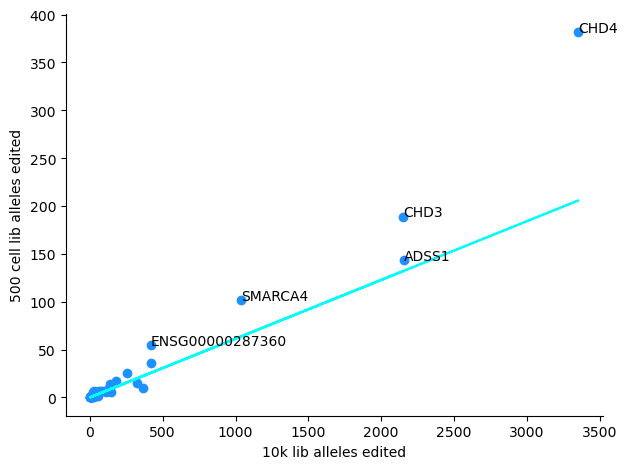

In [458]:
fiveh_edited_alleles = list(fiveh_edit_info.loc[fiveh_edits_paired, 'total_edited_alleles'])+[0]*len(tenk_edits_unique)
tenk_edited_alleles = list(tenk_edit_info.loc[tenk_edits_paired, 'total_edited_alleles'])+\
                    list(tenk_edit_info.loc[tenk_edits_unique_list, 'total_edited_alleles'])

print(scipy.stats.pearsonr(fiveh_edited_alleles, tenk_edited_alleles))

order = np.argsort(-np.array(fiveh_edited_alleles[0:len(fiveh_edits_paired)]))
top_genes = fiveh_edit_info.loc[fiveh_edits_paired, 'intersecting_genes'].values

fig, ax = plt.subplots()
ax.scatter(tenk_edited_alleles, fiveh_edited_alleles, color='dodgerblue')
ax.plot(tenk_edited_alleles, (np.array(tenk_edited_alleles)/tenk_data.shape[0])*data.shape[0],
        color='cyan')

for i in order[0:5]:
    plt.text(tenk_edited_alleles[i], fiveh_edited_alleles[i], top_genes[i].split(',')[-1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('10k lib alleles edited')
plt.ylabel('500 cell lib alleles edited')
plt.show()

# Creating and comparing and edit-site co-occurence matrix...

In [464]:
full_edits = tenk_data.uns['edit_site_info_guide_homology_and_coinc_final']

final_edits = full_edits.index.values[ full_edits['manual_edit_call'].values ]
len(final_edits), final_edits

(43,
 array(['hg38_1:26696719', 'hg38_1:26696862', 'hg38_12:6602172',
        'hg38_12:6606340', 'hg38_19:10986490', 'hg38_19:10984175',
        'hg38_17:7890653', 'hg38_21:37649273', 'hg38_19:6212712',
        'hg38_6:1397192', 'hg38_X:41086519', 'hg38_20:14937204',
        'hg38_18:3115881', 'hg38_4:14359416', 'hg38_13:34520796',
        'hg38_12:68620881', 'hg38_1:11841677', 'hg38_9:37594631',
        'hg38_1:245947392', 'hg38_10:93632366', 'hg38_3:25497711',
        'hg38_3:194003698', 'hg38_3:31532824', 'hg38_4:79849103',
        'hg38_4:88368039', 'hg38_6:57807628', 'hg38_1:108747053',
        'hg38_1:224544957', 'hg38_11:70522075', 'hg38_16:81393308',
        'hg38_19:10293417', 'hg38_14:104729499', 'hg38_17:47188686',
        'hg38_4:59298822', 'hg38_12:110404170', 'hg38_5:148237295',
        'hg38_13:110873574', 'hg38_17:3029640', 'hg38_9:113111494',
        'hg38_11:68841673', 'hg38_13:113608067', 'hg38_14:71885108',
        'hg38_4:7542884'], dtype=object))

In [492]:
final_edits_wGenes = [f"{final_edit} ({genes})" for final_edit, genes in zip(final_edits, full_edits.loc[final_edits,'intersecting_genes'])]

In [493]:
final_edits_wGenes

['hg38_1:26696719 (ARID1A)',
 'hg38_1:26696862 (ARID1A)',
 'hg38_12:6602172 (ENSG00000285238,CHD4)',
 'hg38_12:6606340 (ENSG00000285238,CHD4)',
 'hg38_19:10986490 (SMARCA4)',
 'hg38_19:10984175 (SMARCA4)',
 'hg38_17:7890653 (CHD3)',
 'hg38_21:37649273 (ENSG00000286717,KCNJ6)',
 'hg38_19:6212712 (MLLT1)',
 'hg38_6:1397192 (nan)',
 'hg38_X:41086519 (USP9X)',
 'hg38_20:14937204 (MACROD2)',
 'hg38_18:3115881 (MYOM1)',
 'hg38_4:14359416 (ENSG00000287360)',
 'hg38_13:34520796 (LINC02343,LINC00457)',
 'hg38_12:68620881 (RAP1B)',
 'hg38_1:11841677 (CLCN6)',
 'hg38_9:37594631 (ENSG00000255872)',
 'hg38_1:245947392 (SMYD3)',
 'hg38_10:93632366 (PDE6C)',
 'hg38_3:25497711 (RARB)',
 'hg38_3:194003698 (LINC02026,ENSG00000238043)',
 'hg38_3:31532824 (STT3B)',
 'hg38_4:79849103 (PCAT4)',
 'hg38_4:88368039 (nan)',
 'hg38_6:57807628 (nan)',
 'hg38_1:108747053 (STXBP3)',
 'hg38_1:224544957 (CNIH3)',
 'hg38_11:70522075 (SHANK2)',
 'hg38_16:81393308 (nan)',
 'hg38_19:10293417 (ICAM5)',
 'hg38_14:104729499

In [494]:
dosages = tenk_data.obsm['dosages'].loc[:, final_edits]
dosages

hg38_1:26696719  hg38_1:26696862  hg38_12:6602172  hg38_12:6606340   
03_01_02                0                0                0                0  \
03_01_06                0                0                0                0   
03_01_30                0                0                0                0   
03_01_38                0                0                0                0   
03_01_40                0                0                0                0   
...                   ...              ...              ...              ...   
12_95_65                0                0                1                0   
12_95_66                0                0                1                0   
12_95_84                0                0                2                0   
12_95_93                0                0                1                0   
12_95_96                0                0                0                0   

          hg38_19:10986490  hg38_19:10984175  hg38_17:7890653   
03_01_02                 0                 0                0  \
03_01_06                 0                 1                0   
03_01_30                 0                 1                0   
03_01_38                 0                 1                0   
03_01_40                 0                 1                0   
...                    ...               ...              ...   
12_95_65                 0                 0                0   
12_95_66                 0                 0                0   
12_95_84                 0                 0                1   
12_95_93                 0                 0                0   
12_95_96                 0                 0                0   

          hg38_21:37649273  hg38_19:6212712  hg38_6:1397192  ...   
03_01_02                 0                0               0  ...  \
03_01_06                 0                0               1  ...   
03_01_30                 0                0               1  ...   
03_01_38                 0                0               0  ...   
03_01_40                 0                0               0  ...   
...                    ...              ...             ...  ...   
12_95_65                 0                0               0  ...   
12_95_66                 0                0               0  ...   
12_95_84                 0                0               0  ...   
12_95_93                 0                0               0  ...   
12_95_96                 0                0               0  ...   

          hg38_4:59298822  hg38_12:110404170  hg38_5:148237295   
03_01_02                0                  0                 0  \
03_01_06                0                  0                 0   
03_01_30                0                  0                 0   
03_01_38                0                  0                 0   
03_01_40                0                  0                 0   
...                   ...                ...               ...   
12_95_65                0                  0                 0   
12_95_66                0                  0                 0   
12_95_84                0                  0                 0   
12_95_93                0                  0                 0   
12_95_96                0                  0                 0   

          hg38_13:110873574  hg38_17:3029640  hg38_9:113111494   
03_01_02                  0                0                 0  \
03_01_06                  2                0                 0   
03_01_30                  0                0                 0   
03_01_38                  0                0                 0   
03_01_40                  0                0                 0   
...                     ...              ...               ...   
12_95_65                  0                0                 0   
12_95_66                  0                0                 0   
12_95_84                  0                0                 0  

In [495]:
import scipy.stats

In [496]:
def pearsons(x,y):
    return scipy.stats.pearsonr(x,y)[0]

In [500]:
edit_pearsons = np.zeros((len(final_edits), len(final_edits)))
for i in range(len(final_edits)):
    for j in range(len(final_edits)):

        edit_pearsons[i,j] = scipy.stats.pearsonr(dosages.values[:,i],dosages.values[:,j])[0]

edit_pearsons = pd.DataFrame(edit_pearsons, index=final_edits_wGenes, columns=final_edits_wGenes)

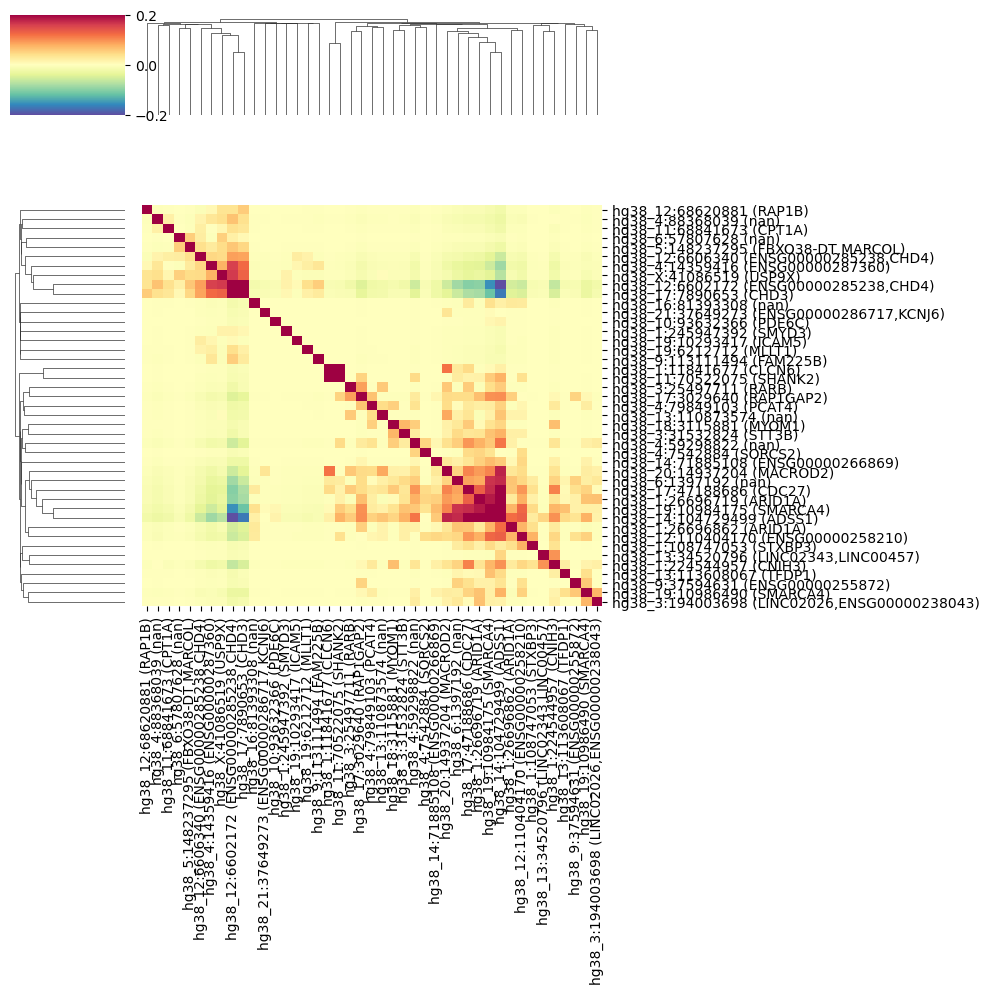

In [502]:
g = sb.clustermap(edit_pearsons, vmax=.2, vmin=-.2, cmap='Spectral_r')
g.ax_heatmap.set_xticks(np.array(list(range(edit_pearsons.shape[0])))+.5, g.data2d.index.values)
g.ax_heatmap.set_yticks(np.array(list(range(edit_pearsons.shape[0])))+.5, g.data2d.columns.values)

vhs.dealWithPlot(True, True, True, out_plots, "10k-lib_dosage-correlation_heatmap.png", 300)

In [503]:
data.obsm.keys()

KeysView(AxisArrays with keys: X_pca, X_umap, dosages, dosages_genes, t7_all, t7_no_bc_umis, t7_umis, t7_all__manual-edits-only, t7_no_bc_umis__manual-edits-only, t7_umis__manual-edits-only, dosages__manual-edits-only, dosages_genes_manual-edits-only, dosages_manual-edits-only, t7_all_manual-edits-only, t7_no_bc_umis_manual-edits-only, t7_umis_manual-edits-only, leiden_enrich_scores, leiden_merged_enrich_scores)

In [505]:
len(real_edits)

30

In [506]:
dosages = data.obsm['dosages'].loc[:,real_edits]
dosages

hg38_12:6602172  hg38_14:104729499  hg38_17:7890653   
01_06_11                0                  0                0  \
01_15_18                0                  0                0   
01_23_85                0                  0                0   
01_26_14                0                  0                0   
01_27_36                0                  0                0   
...                   ...                ...              ...   
12_89_59                1                  0                1   
12_89_70                3                  0                1   
12_93_71                1                  0                1   
12_94_22                3                  0                2   
12_94_41                1                  0                0   

          hg38_4:14359416  hg38_19:10984175  hg38_17:47188686  hg38_6:1397192   
01_06_11                0                 0                 0               0  \
01_15_18                0                 0                 0               0   
01_23_85                0                 0                 0               0   
01_26_14                0                 0                 0               0   
01_27_36                0                 0                 0               0   
...                   ...               ...               ...             ...   
12_89_59                0                 0                 0               0   
12_89_70                0                 0                 0               0   
12_93_71                0                 0                 0               0   
12_94_22                0                 0                 0               0   
12_94_41                0                 0                 0               0   

          hg38_1:224544957  hg38_X:41086519  hg38_12:110404169  ...   
01_06_11                 0                0                  0  ...  \
01_15_18                 0                0                  0  ...   
01_23_85                 0                0                  0  ...   
01_26_14                 0                0                  0  ...   
01_27_36                 0                0                  0  ...   
...                    ...              ...                ...  ...   
12_89_59                 0                0                  0  ...   
12_89_70                 0                0                  0  ...   
12_93_71                 0                0                  0  ...   
12_94_22                 0                0                  0  ...   
12_94_41                 0                0                  0  ...   

          hg38_4:79849103  hg38_3:194003699  hg38_9:37594621  hg38_1:26696864   
01_06_11                0                 0                0                0  \
01_15_18                0                 0                0                0   
01_23_85                0                 0                0                0   
01_26_14                0                 0                0                0   
01_27_36                0                 0                0                0   
...                   ...               ...              ...              ...   
12_89_59                0                 0                0                0   
12_89_70                0                 0                0                0   
12_93_71                0                 0                0                0   
12_94_22                0                 0                0                0   
12_94_41                0                 0                0                0   

          hg38_1:245947392  hg38_18:3115881  hg38_19:6212712   
01_06_11                 0                0                0  \
01_15_18                 0                0                0   
01_23_85                 0                0                0   
01_26_14                 0                0                0   
01_27_36                 0                0                0   
...                    ...              ...   

In [507]:
data.uns.keys()

dict_keys(['edit_site_info', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'annot_overlaps', 'edit_cell_labels_colors', 'sample_colors', 'phase_colors', 'leiden', 'leiden_colors', 'rank_genes_groups', 'leiden_markers', 'leiden_neighbours', 'leiden_neighdists', 'leiden_ps', 'leiden_padjs', 'leiden_mutualpairs', 'leiden_merged_markers', 'leiden_merged_colors', 'dendrogram_leiden_merged'])

In [510]:
fiveh_edit_site_info = data.uns['edit_site_info']
fiveh_edit_site_info.index = fiveh_edit_site_info['name']

final_edits_wGenes = [f"{final_edit} ({genes})" for final_edit, genes in zip(real_edits, fiveh_edit_site_info.loc[real_edits,'intersecting_genes'])]

In [512]:
edit_pearsons = np.zeros((len(real_edits), len(real_edits)))
for i in range(len(real_edits)):
    for j in range(len(real_edits)):

        edit_pearsons[i,j] = scipy.stats.pearsonr(dosages.values[:,i],dosages.values[:,j])[0]

edit_pearsons = pd.DataFrame(edit_pearsons, index=final_edits_wGenes, columns=final_edits_wGenes)

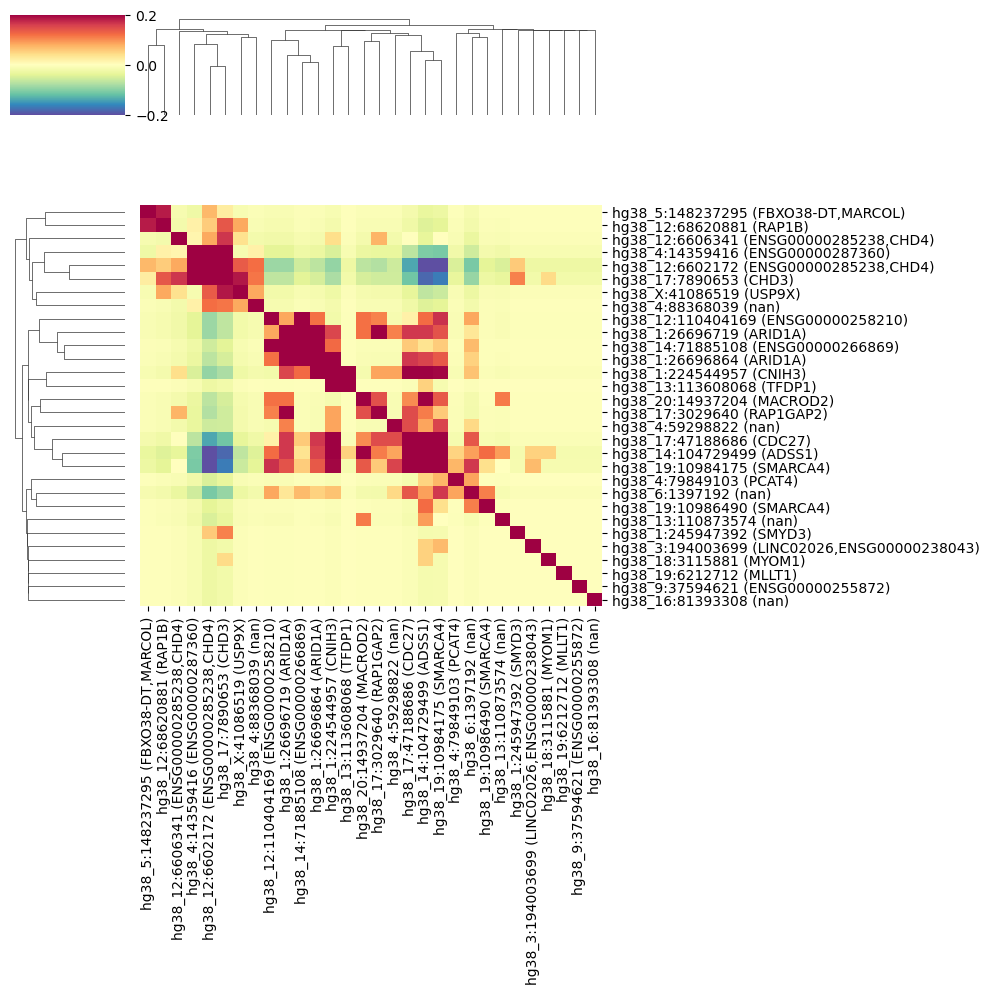

In [514]:
g = sb.clustermap(edit_pearsons, vmax=.2, vmin=-.2, cmap='Spectral_r')
g.ax_heatmap.set_xticks(np.array(list(range(edit_pearsons.shape[0])))+.5, g.data2d.index.values)
g.ax_heatmap.set_yticks(np.array(list(range(edit_pearsons.shape[0])))+.5, g.data2d.columns.values)

vhs.dealWithPlot(True, True, True, out_plots, "500-cell-lib_dosage-correlation_heatmap.png", 300)

In [515]:
out_plots

'/iblm/netapp/data4/bbalderson/edit_capture/plots/cell_qc/superb_500cell_v1/'

# Saving the cell metadata to include with the GEO submission.

In [602]:
data.obs.columns

Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'mito_perc', 't7_umis', 't7_all',
       't7_no_bc_umis', 'sample', 'edit_cell_labels', 'CHD3_edit_dosages',
       'CHD4_edit_dosages', 'ARID1A_edit_dosages', 'SMARCA4_edit_dosages',
       'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_merged',
       'log10_total_counts'],
      dtype='object')

In [603]:
keep_cols = ['sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'mito_perc',
       't7_all', 't7_no_bc_umis', 't7_umis', 'S_score', 'G2M_score', 'phase',
       'leiden', 'leiden_merged', 'log10_total_counts', 'edit_cell_labels']

cell_meta = data.obs.loc[:,keep_cols]
cell_meta

sample  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
01_06_11    no_ki               8682                 9.069122         54521  \
01_15_18    no_ki               7740                 8.954286         39629   
01_23_85    no_ki               7744                 8.954803         43844   
01_26_14    no_ki               7005                 8.854522         31902   
01_27_36    no_ki               7434                 8.913954         36780   
...           ...                ...                      ...           ...   
12_89_59  nurd_ki               8663                 9.066932         56921   
12_89_70  nurd_ki               9525                 9.161780         57340   
12_93_71  nurd_ki               6579                 8.791790         26510   
12_94_22  nurd_ki               8760                 9.078065         50660   
12_94_41  nurd_ki               8010                 8.988571         44954   

          log1p_total_counts  pct_counts_in_top_50_genes   
01_06_11           10.906360                   19.172429  \
01_15_18           10.587342                   15.117717   
01_23_85           10.688416                   14.567558   
01_26_14           10.370455                   16.080497   
01_27_36           10.512737                   14.646547   
...                      ...                         ...   
12_89_59           10.949437                   20.721702   
12_89_70           10.956771                   19.016393   
12_93_71           10.185315                   17.665032   
12_94_22           10.832912                   17.745756   
12_94_41           10.713417                   21.464163   

          pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
01_06_11                    23.902716                    30.311256  \
01_15_18                    20.434530                    27.656514   
01_23_85                    19.377794                    26.227078   
01_26_14                    20.719704                    27.321171   
01_27_36                    19.268624                    25.774878   
...                               ...                          ...   
12_89_59                    25.076861                    31.341684   
12_89_70                    22.940356                    28.651901   
12_93_71                    22.116183                    28.604300   
12_94_22                    22.039084                    27.982629   
12_94_41                    25.690706                    31.643458   

          pct_counts_in_top_500_genes  mito_perc  t7_all  t7_no_bc_umis   
01_06_11                    42.359825   5.581336       3              3  \
01_15_18                    40.954856   2.763128       6              6   
01_23_85                    39.864063   1.300064       7              7   
01_26_14                    40.458278   3.250580      10             10   
01_27_36                    38.719413   3.646003      10             10   
...                               ...        ...     ...            ...   
12_89_59                    43.145763   9.030059      32             22   
12_89_70                    39.931985   7.678758      41             13   
12_93_71                    41.663523   6.589966       8              4   
12_94_22                    39.692065   7.524674      15              6   
12_94_41                    43.408818  11.458380       9              7   

          t7_umis   S_score  G2M_score phase leiden leiden_merged   
01_06_11        0  0.298461   0.532592   G2M     11             0  \
01_15_18        0  0.322385   0.354588   G2M      0             2   
01_23_85        0 -0.069195   1.289349   G2M      6             1   
01_26_14        0  0.094117   0.802973   G2M      3             0   
01_27_36        0  0.652203   0.336837     S      0             2   
...           ...       ...        ...   ...    ...           ...   
12_89_59       10  0.367592   0.635401   G2M      4             1   
12_89_70       28  0.697588   0.392177     S   

In [604]:
data.obsm.keys()

KeysView(AxisArrays with keys: X_pca, X_umap, dosages, dosages_genes, t7_all, t7_no_bc_umis, t7_umis, t7_all__manual-edits-only, t7_no_bc_umis__manual-edits-only, t7_umis__manual-edits-only, dosages__manual-edits-only, dosages_genes_manual-edits-only, dosages_manual-edits-only, t7_all_manual-edits-only, t7_no_bc_umis_manual-edits-only, t7_umis_manual-edits-only, leiden_enrich_scores, leiden_merged_enrich_scores)

In [605]:
cell_meta['UMAP_1'] = data.obsm['X_umap'][:,0]
cell_meta['UMAP_2'] = data.obsm['X_umap'][:,1]

cell_meta

sample  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
01_06_11    no_ki               8682                 9.069122         54521  \
01_15_18    no_ki               7740                 8.954286         39629   
01_23_85    no_ki               7744                 8.954803         43844   
01_26_14    no_ki               7005                 8.854522         31902   
01_27_36    no_ki               7434                 8.913954         36780   
...           ...                ...                      ...           ...   
12_89_59  nurd_ki               8663                 9.066932         56921   
12_89_70  nurd_ki               9525                 9.161780         57340   
12_93_71  nurd_ki               6579                 8.791790         26510   
12_94_22  nurd_ki               8760                 9.078065         50660   
12_94_41  nurd_ki               8010                 8.988571         44954   

          log1p_total_counts  pct_counts_in_top_50_genes   
01_06_11           10.906360                   19.172429  \
01_15_18           10.587342                   15.117717   
01_23_85           10.688416                   14.567558   
01_26_14           10.370455                   16.080497   
01_27_36           10.512737                   14.646547   
...                      ...                         ...   
12_89_59           10.949437                   20.721702   
12_89_70           10.956771                   19.016393   
12_93_71           10.185315                   17.665032   
12_94_22           10.832912                   17.745756   
12_94_41           10.713417                   21.464163   

          pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
01_06_11                    23.902716                    30.311256  \
01_15_18                    20.434530                    27.656514   
01_23_85                    19.377794                    26.227078   
01_26_14                    20.719704                    27.321171   
01_27_36                    19.268624                    25.774878   
...                               ...                          ...   
12_89_59                    25.076861                    31.341684   
12_89_70                    22.940356                    28.651901   
12_93_71                    22.116183                    28.604300   
12_94_22                    22.039084                    27.982629   
12_94_41                    25.690706                    31.643458   

          pct_counts_in_top_500_genes  mito_perc  ...  t7_umis   S_score   
01_06_11                    42.359825   5.581336  ...        0  0.298461  \
01_15_18                    40.954856   2.763128  ...        0  0.322385   
01_23_85                    39.864063   1.300064  ...        0 -0.069195   
01_26_14                    40.458278   3.250580  ...        0  0.094117   
01_27_36                    38.719413   3.646003  ...        0  0.652203   
...                               ...        ...  ...      ...       ...   
12_89_59                    43.145763   9.030059  ...       10  0.367592   
12_89_70                    39.931985   7.678758  ...       28  0.697588   
12_93_71                    41.663523   6.589966  ...        4  0.170937   
12_94_22                    39.692065   7.524674  ...        9 -0.024989   
12_94_41                    43.408818  11.458380  ...        2 -0.153404   

          G2M_score  phase  leiden leiden_merged log10_total_counts   
01_06_11   0.532592    G2M      11             0           4.736564  \
01_15_18   0.354588    G2M       0             2           4.598013   
01_23_85   1.289349    G2M       6             1           4.641910   
01_26_14   0.802973    G2M       3             0           4.503818   
01_27_36   0.336837      S       0             2           4.565612   
...             ...    ...     ...           ...                ...   
12_89_59   0.635401    G2M       4             1           4.755273   
12_89_70   0.392177

In [608]:
!mkdir {out_dir}

In [609]:
cell_meta.to_csv(f'{out_dir}cell_metadata_500_cell.tsv.gz', sep='\t')

In [610]:
!zcat {out_dir}cell_metadata_500_cell.tsv.gz | head

	sample	n_genes_by_counts	log1p_n_genes_by_counts	total_counts	log1p_total_counts	pct_counts_in_top_50_genes	pct_counts_in_top_100_genes	pct_counts_in_top_200_genes	pct_counts_in_top_500_genes	mito_perc	t7_all	t7_no_bc_umis	t7_umis	S_score	G2M_score	phase	leiden	leiden_merged	log10_total_counts	edit_cell_labels	UMAP_1	UMAP_2
01_06_11	no_ki	8682	9.069122370060645	54521	10.906359568923403	19.172428972322592	23.90271638451239	30.311256213202252	42.3598246547202	5.5813356321417436	3	3	0	0.2984607191810831	0.5325916916839002	G2M	11	0	4.73656381287245	no-edit	-3.2593405	1.1823599
01_15_18	no_ki	7740	8.954286157204713	39629	10.58734168618448	15.117716823538318	20.434530268237907	27.6565141689167	40.95485629210931	2.7631280123142146	6	6	0	0.3223846522638373	0.35458783443286035	G2M	0	2	4.598013113465622	no-edit	-4.380771	0.67344975
01_23_85	no_ki	7744	8.954802752850968	43844	10.688415966213457	14.567557704589	19.37779399689809	26.227077821366663	39.86406349785604	1.3000638627862422	7	7	0	-0.069

In [611]:
print(f"{out_dir}cell_metadata_500_cell.tsv.gz")

/iblm/netapp/data4/bbalderson/edit_capture/data/t7_allelic_calling/superb_count_500_cells1/cell_qc_tables/cell_metadata_500_cell.tsv.gz


In [613]:
data.uns['edit_site_info']

name         chr        pos   
name                                                                    
hg38_12:6602172                hg38_12:6602172          12    6602172  \
hg38_14:104729499            hg38_14:104729499          14  104729499   
hg38_17:7890653                hg38_17:7890653          17    7890653   
hg38_MT:14420                    hg38_MT:14420          MT      14420   
hg38_4:14359416                hg38_4:14359416           4   14359416   
hg38_19:10984175              hg38_19:10984175          19   10984175   
hg38_17:47188686              hg38_17:47188686          17   47188686   
hg38_6:1397192                  hg38_6:1397192           6    1397192   
hg38_1:224544957              hg38_1:224544957           1  224544957   
hg38_X:41086519                hg38_X:41086519           X   41086519   
hg38_12:110404169            hg38_12:110404169          12  110404169   
hg38_12:6606341                hg38_12:6606341          12    6606341   
hg38_5:148237295              hg38_5:148237295           5  148237295   
hg38_4:59298822                hg38_4:59298822           4   59298822   
hg38_20:14937204              hg38_20:14937204          20   14937204   
hg38_17:3029640                hg38_17:3029640          17    3029640   
hg38_1:26696719                hg38_1:26696719           1   26696719   
hg38_13:110873574            hg38_13:110873574          13  110873574   
hg38_14:71885108              hg38_14:71885108          14   71885108   
hg38_12:68620881              hg38_12:68620881          12   68620881   
hg38_4:88368039                hg38_4:88368039           4   88368039   
hg38_4:79849103                hg38_4:79849103           4   79849103   
hg38_3:194003699              hg38_3:194003699           3  194003699   
hg38_9:37594621                hg38_9:37594621           9   37594621   
hg38_KI270744.1:108938  hg38_KI270744.1:108938  KI270744.1     108938   
hg38_MT:12003                    hg38_MT:12003          MT      12003   
hg38_MT:13902                    hg38_MT:13902          MT      13902   
hg38_MT:13597                    hg38_MT:13597          MT      13597   
hg38_MT:15253                    hg38_MT:15253          MT      15253   
hg38_MT:5111                      hg38_MT:5111          MT       5111   
hg38_MT:8573                      hg38_MT:8573          MT       8573   
hg38_6:20907346                hg38_6:20907346           6   20907346   
hg38_1:26696864                hg38_1:26696864           1   26696864   
hg38_1:245947392              hg38_1:245947392           1  245947392   
hg38_18:3115881                hg38_18:3115881          18    3115881   
hg38_19:6212712                hg38_19:6212712          19    6212712   
hg38_19:17936412              hg38_19:17936412          19   17936412   
hg38_19:10986490              hg38_19:10986490          19   10986490   
hg38_13:113608068            hg38_13:113608068          13  113608068   
hg38_16:81393308              hg38_16:81393308          16   81393308   

                        start_window  end_window         intersecting_genes   
name                                                                          
hg38_12:6602172              6602032     6602312       ENSG00000285238,CHD4  \
hg38_14:104729499          104729359   104729639                      ADSS1   
hg38_17:7890653              7890513     7890793                       CHD3   
hg38_MT:14420                  14280       14560                     MT-ND6   
hg38_4:14359416             14359276    14359556            ENSG00000287360   
hg38_19:10984175            10984035    10984315                    SMARCA4   
hg38_17:47188686            47188546    47188826                      CDC27   
hg38_6:1397192               1397052     1397332                        nan   
hg38_1:224544957           224544817   224545097                      CNIH3   
hg38_X:41086519             41086379    41086659                      USP9X   
hg38_12:110404169          

In [617]:
site_specific_umi_count = data.obsm['t7_umis'].sum(axis=0).reset_index()
site_specific_umi_count.index = site_specific_umi_count['index']
site_specific_umi_count.columns = ['index', 't7_barcoded_umis']
site_specific_umi_count

index  t7_barcoded_umis
index                                                           
hg38_12:6602172                hg38_12:6602172              1459
hg38_14:104729499            hg38_14:104729499               602
hg38_17:7890653                hg38_17:7890653               522
hg38_MT:14420                    hg38_MT:14420                80
hg38_4:14359416                hg38_4:14359416                69
hg38_19:10984175              hg38_19:10984175               135
hg38_17:47188686              hg38_17:47188686                40
hg38_6:1397192                  hg38_6:1397192                32
hg38_1:224544957              hg38_1:224544957                14
hg38_X:41086519                hg38_X:41086519                16
hg38_12:110404169            hg38_12:110404169                11
hg38_12:6606341                hg38_12:6606341                42
hg38_5:148237295              hg38_5:148237295                 4
hg38_4:59298822                hg38_4:59298822                 8
hg38_20:14937204              hg38_20:14937204                 7
hg38_17:3029640                hg38_17:3029640                12
hg38_1:26696719                hg38_1:26696719                12
hg38_13:110873574            hg38_13:110873574                34
hg38_14:71885108              hg38_14:71885108                 4
hg38_12:68620881              hg38_12:68620881                 7
hg38_4:88368039                hg38_4:88368039                 7
hg38_4:79849103                hg38_4:79849103                 4
hg38_3:194003699              hg38_3:194003699                 1
hg38_9:37594621                hg38_9:37594621                 1
hg38_KI270744.1:108938  hg38_KI270744.1:108938                 3
hg38_MT:12003                    hg38_MT:12003                10
hg38_MT:13902                    hg38_MT:13902                 5
hg38_MT:13597                    hg38_MT:13597                 5
hg38_MT:15253                    hg38_MT:15253                 8
hg38_MT:5111                      hg38_MT:5111                14
hg38_MT:8573                      hg38_MT:8573                 4
hg38_6:20907346                hg38_6:20907346                 2
hg38_1:26696864                hg38_1:26696864                 6
hg38_1:245947392              hg38_1:245947392                 2
hg38_18:3115881                hg38_18:3115881                 1
hg38_19:6212712                hg38_19:6212712                 1
hg38_19:17936412              hg38_19:17936412                 2
hg38_19:10986490              hg38_19:10986490                 2
hg38_13:113608068            hg38_13:113608068                 1
hg38_16:81393308              hg38_16:81393308                 1

In [618]:
t7_umis = data.obsm['t7_umis']

site_specific_mean_umis = []
for i, edit_site in enumerate(t7_umis.columns):

    edit_site_counts = t7_umis.values[:,i]
    nonzero_bool = edit_site_counts > 0

    mean_ = np.mean( edit_site_counts[nonzero_bool] )
    site_specific_mean_umis.append( mean_ )

In [619]:
site_specific_umi_count.loc[t7_umis.columns.values, 't7_barcoded_umis_per_edited_cell'] = site_specific_mean_umis

In [620]:
site_specific_umi_count

index  t7_barcoded_umis   
index                                                              
hg38_12:6602172                hg38_12:6602172              1459  \
hg38_14:104729499            hg38_14:104729499               602   
hg38_17:7890653                hg38_17:7890653               522   
hg38_MT:14420                    hg38_MT:14420                80   
hg38_4:14359416                hg38_4:14359416                69   
hg38_19:10984175              hg38_19:10984175               135   
hg38_17:47188686              hg38_17:47188686                40   
hg38_6:1397192                  hg38_6:1397192                32   
hg38_1:224544957              hg38_1:224544957                14   
hg38_X:41086519                hg38_X:41086519                16   
hg38_12:110404169            hg38_12:110404169                11   
hg38_12:6606341                hg38_12:6606341                42   
hg38_5:148237295              hg38_5:148237295                 4   
hg38_4:59298822                hg38_4:59298822                 8   
hg38_20:14937204              hg38_20:14937204                 7   
hg38_17:3029640                hg38_17:3029640                12   
hg38_1:26696719                hg38_1:26696719                12   
hg38_13:110873574            hg38_13:110873574                34   
hg38_14:71885108              hg38_14:71885108                 4   
hg38_12:68620881              hg38_12:68620881                 7   
hg38_4:88368039                hg38_4:88368039                 7   
hg38_4:79849103                hg38_4:79849103                 4   
hg38_3:194003699              hg38_3:194003699                 1   
hg38_9:37594621                hg38_9:37594621                 1   
hg38_KI270744.1:108938  hg38_KI270744.1:108938                 3   
hg38_MT:12003                    hg38_MT:12003                10   
hg38_MT:13902                    hg38_MT:13902                 5   
hg38_MT:13597                    hg38_MT:13597                 5   
hg38_MT:15253                    hg38_MT:15253                 8   
hg38_MT:5111                      hg38_MT:5111                14   
hg38_MT:8573                      hg38_MT:8573                 4   
hg38_6:20907346                hg38_6:20907346                 2   
hg38_1:26696864                hg38_1:26696864                 6   
hg38_1:245947392              hg38_1:245947392                 2   
hg38_18:3115881                hg38_18:3115881                 1   
hg38_19:6212712                hg38_19:6212712                 1   
hg38_19:17936412              hg38_19:17936412                 2   
hg38_19:10986490              hg38_19:10986490                 2   
hg38_13:113608068            hg38_13:113608068                 1   
hg38_16:81393308              hg38_16:81393308                 1   

                        t7_barcoded_umis_per_edited_cell  
index                                                     
hg38_12:6602172                                 6.288793  
hg38_14:104729499                               5.733333  
hg38_17:7890653                                 3.625000  
hg38_MT:14420                                   1.159420  
hg38_4:14359416                                 1.326923  
hg38_19:10984175                                1.776316  
hg38_17:47188686                                1.250000  
hg38_6:1397192                                  1.454545  
hg38_1:224544957                                1.000000  
hg38_X:41086519                                 1.066667  
hg38_12:110404169                               1.100000  
hg38_12:6606341                                 2.470588  
hg38_5:148237295                                1.000000  
hg38_4:59298822                                 1.142857  
hg38_20:14937204                                1.166667  
hg38_17:3029640                                 1.714286  
hg38_1:26696719                                 1.200000  
hg38_13:110873574                               8.500000  
hg38

In [621]:
edit_site_info = data.uns['edit_site_info']
edit_site_info

name         chr        pos   
name                                                                    
hg38_12:6602172                hg38_12:6602172          12    6602172  \
hg38_14:104729499            hg38_14:104729499          14  104729499   
hg38_17:7890653                hg38_17:7890653          17    7890653   
hg38_MT:14420                    hg38_MT:14420          MT      14420   
hg38_4:14359416                hg38_4:14359416           4   14359416   
hg38_19:10984175              hg38_19:10984175          19   10984175   
hg38_17:47188686              hg38_17:47188686          17   47188686   
hg38_6:1397192                  hg38_6:1397192           6    1397192   
hg38_1:224544957              hg38_1:224544957           1  224544957   
hg38_X:41086519                hg38_X:41086519           X   41086519   
hg38_12:110404169            hg38_12:110404169          12  110404169   
hg38_12:6606341                hg38_12:6606341          12    6606341   
hg38_5:148237295              hg38_5:148237295           5  148237295   
hg38_4:59298822                hg38_4:59298822           4   59298822   
hg38_20:14937204              hg38_20:14937204          20   14937204   
hg38_17:3029640                hg38_17:3029640          17    3029640   
hg38_1:26696719                hg38_1:26696719           1   26696719   
hg38_13:110873574            hg38_13:110873574          13  110873574   
hg38_14:71885108              hg38_14:71885108          14   71885108   
hg38_12:68620881              hg38_12:68620881          12   68620881   
hg38_4:88368039                hg38_4:88368039           4   88368039   
hg38_4:79849103                hg38_4:79849103           4   79849103   
hg38_3:194003699              hg38_3:194003699           3  194003699   
hg38_9:37594621                hg38_9:37594621           9   37594621   
hg38_KI270744.1:108938  hg38_KI270744.1:108938  KI270744.1     108938   
hg38_MT:12003                    hg38_MT:12003          MT      12003   
hg38_MT:13902                    hg38_MT:13902          MT      13902   
hg38_MT:13597                    hg38_MT:13597          MT      13597   
hg38_MT:15253                    hg38_MT:15253          MT      15253   
hg38_MT:5111                      hg38_MT:5111          MT       5111   
hg38_MT:8573                      hg38_MT:8573          MT       8573   
hg38_6:20907346                hg38_6:20907346           6   20907346   
hg38_1:26696864                hg38_1:26696864           1   26696864   
hg38_1:245947392              hg38_1:245947392           1  245947392   
hg38_18:3115881                hg38_18:3115881          18    3115881   
hg38_19:6212712                hg38_19:6212712          19    6212712   
hg38_19:17936412              hg38_19:17936412          19   17936412   
hg38_19:10986490              hg38_19:10986490          19   10986490   
hg38_13:113608068            hg38_13:113608068          13  113608068   
hg38_16:81393308              hg38_16:81393308          16   81393308   

                        start_window  end_window         intersecting_genes   
name                                                                          
hg38_12:6602172              6602032     6602312       ENSG00000285238,CHD4  \
hg38_14:104729499          104729359   104729639                      ADSS1   
hg38_17:7890653              7890513     7890793                       CHD3   
hg38_MT:14420                  14280       14560                     MT-ND6   
hg38_4:14359416             14359276    14359556            ENSG00000287360   
hg38_19:10984175            10984035    10984315                    SMARCA4   
hg38_17:47188686            47188546    47188826                      CDC27   
hg38_6:1397192               1397052     1397332                        nan   
hg38_1:224544957           224544817   224545097                      CNIH3   
hg38_X:41086519             41086379    41086659                      USP9X   
hg38_12:110404169          

In [622]:
site_specific_umi_count = site_specific_umi_count.loc[edit_site_info.index.values]

In [623]:
site_specific_umi_count.index.values == edit_site_info.index.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [624]:
edit_site_info['t7_barcoded_umis'] = site_specific_umi_count['t7_barcoded_umis'].values
edit_site_info['t7_barcoded_umis_per_edited_cell'] = site_specific_umi_count['t7_barcoded_umis_per_edited_cell'].values

In [625]:
edit_site_info.to_csv(f'{out_dir}edit_site_metadata_500_cell.tsv', sep='\t', index=False)

In [627]:
!cat {out_dir}edit_site_metadata_500_cell.tsv

name	chr	pos	start_window	end_window	intersecting_genes	copy-number	n_cells_edited	stranded_edit_dist	manual_edit_call	t7_barcoded_umis	t7_barcoded_umis_per_edited_cell
hg38_12:6602172	12	6602172	6602032	6602312	ENSG00000285238,CHD4	2	232	1.0	True	1459	6.288793103448276
hg38_14:104729499	14	104729499	104729359	104729639	ADSS1	2	105		True	602	5.733333333333333
hg38_17:7890653	17	7890653	7890513	7890793	CHD3	2	144	1.0	True	522	3.625
hg38_MT:14420	MT	14420	14280	14560	MT-ND6	2	69	7.0	False	80	1.1594202898550725
hg38_4:14359416	4	14359416	14359276	14359556	ENSG00000287360	3	52	0.0	True	69	1.3269230769230769
hg38_19:10984175	19	10984175	10984035	10984315	SMARCA4	3	76	0.0	True	135	1.7763157894736843
hg38_17:47188686	17	47188686	47188546	47188826	CDC27	3	32	1.0	True	40	1.25
hg38_6:1397192	6	1397192	1397052	1397332	nan	4	22	8.0	True	32	1.4545454545454546
hg38_1:224544957	1	224544957	224544817	224545097	CNIH3	4	14		True	14	1.0
hg38_X:41086519	X	41086519	41086379	41086659	USP9X	2	15		True	16	1.0